In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets as datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics

**The dimension of X_train are (60000, 28, 28) and dimension of X_test are (10000, 28, 28)** . We also normalized the above values by using Xtrain and Xtest

# PROJECT 2

# QUESTION 3

## Random seed 1

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(1)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)
 
# Building Our Mode
class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100, 10)
        
    # Forward Pass
    def forward(self, x):
        x = x.view(x.shape[0],-1)    # Flatten the images
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc2(x)
        return x
 
model = Network()
if torch.cuda.is_available():
    model = model.cuda()
 
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_valid_li=[]
 
for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(trainloader))
    misclass_train_li.append(mis_accuracy)
    
    
    #len(trainset)
    # trainset, not train_loader
    # probably x in your case

    #print("Accuracy = {}".format(accuracy))
        
        
      
        
   
    # Validation error
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(validloader))

    correct_count, all_count = 0, 0
    for images,labels in validloader:
      for i in range(len(labels)):
        img = images[i].view(1, 784).to(device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
        
        #img = images[i].view(shape=(, 784))
        with torch.no_grad():
          logps = model(img)
          #.cuda

    
        ps = torch.exp(logps)
        probab = list(ps.cpu().numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1
    valid_misclassify=1-correct_count/all_count
    misclass_valid_li.append(valid_misclassify)
    



    print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
    print("\nModel train Accuracy =", mis_accuracy)
    print("\nModel valid Accuracy =", valid_misclassify)

    
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_lr_full=0.1.pth')




Epoch 1 		 Training Loss: 0.3766806447855837 		 Validation Loss: 0.22556042346282126

Model train Accuracy = 0.10550000000000004

Model valid Accuracy = 0.06389999999999996
Epoch 2 		 Training Loss: 0.18342171873604152 		 Validation Loss: 0.1677101031957438

Model train Accuracy = 0.05403999999999998

Model valid Accuracy = 0.04820000000000002
Epoch 3 		 Training Loss: 0.1317590716159685 		 Validation Loss: 0.14023909825212755

Model train Accuracy = 0.03815999999999997

Model valid Accuracy = 0.039100000000000024
Epoch 4 		 Training Loss: 0.10302087740099114 		 Validation Loss: 0.1253283601343489

Model train Accuracy = 0.029240000000000044

Model valid Accuracy = 0.035699999999999954
Epoch 5 		 Training Loss: 0.08460523458364552 		 Validation Loss: 0.11453294104631669

Model train Accuracy = 0.02425999999999995

Model valid Accuracy = 0.032299999999999995
Epoch 6 		 Training Loss: 0.07110829735565061 		 Validation Loss: 0.10745408959588565

Model train Accuracy = 0.020360000000000045

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


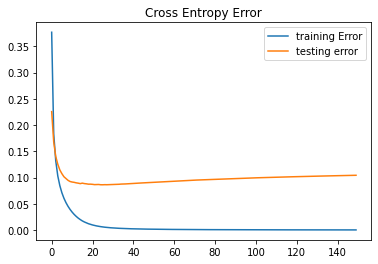

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="training Error")
plt.plot(val_loss_li,label="testing error")
plt.title("Cross Entropy Error")
plt.legend()
#plt.ylim(0,2)

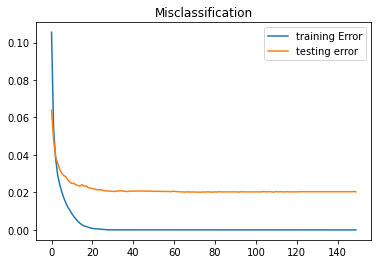

In [ ]:
import matplotlib.pyplot as plt
plt.plot( misclass_train_li,label="training Error")
plt.plot(misclass_valid_li,label="testing error")
plt.title("Misclassification")
plt.legend()

Here validation misclassification = 0.020299999999999985

# Random seed 66

In [ ]:

import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(66)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)
 
# Building Our Mode
class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100, 10)
        
    # Forward Pass
    def forward(self, x):
        x = x.view(x.shape[0],-1)    # Flatten the images
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc2(x)
        return x
 
model_66 = Network()
if torch.cuda.is_available():
    model_66 = model_66.cuda()
 
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_66.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li_2=[]
val_loss_li_2=[]
misclass_train_li_2=[]
misclass_valid_li_2=[]
 
for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model_66(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li_2.append(train_loss / len(trainloader))
    misclass_train_li_2.append(mis_accuracy)
    
   
        
   
    # Validation error
    valid_loss = 0.0
    #model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model_66(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li_2.append(valid_loss / len(validloader))

    correct_count, all_count = 0, 0
    for images,labels in validloader:
      for i in range(len(labels)):
        img = images[i].view(1, 784).to(device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
        
        #img = images[i].view(shape=(, 784))
        with torch.no_grad():
          logps = model_66(img)
          #.cuda

    
        ps = torch.exp(logps)
        probab = list(ps.cpu().numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1
    valid_misclassify=1-correct_count/all_count
    misclass_valid_li_2.append(valid_misclassify)
    



    print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
    print("\nModel train Accuracy =", mis_accuracy)
    print("\nModel valid Accuracy =", valid_misclassify)

   
         
        # Saving State Dict
    torch.save(model_66.state_dict(), '/content/drive/MyDrive/saved_model_lr_full=0.1_seed_66.pth')




  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

Epoch 1 		 Training Loss: 0.3728210918524291 		 Validation Loss: 0.22665476447905594

Model train Accuracy = 0.10392000000000001

Model valid Accuracy = 0.06659999999999999
Epoch 2 		 Training Loss: 0.1789822497900268 		 Validation Loss: 0.1619724395533149

Model train Accuracy = 0.05288000000000004

Model valid Accuracy = 0.04600000000000004
Epoch 3 		 Training Loss: 0.12985406131784522 		 Validation Loss: 0.13386701443455756

Model train Accuracy = 0.03744000000000003

Model valid Accuracy = 0.03849999999999998
Epoch 4 		 Training Loss: 0.10202167972848439 		 Validation Loss: 0.1189476522459342

Model train Accuracy = 0.029100000000000015

Model valid Accuracy = 0.03400000000000003
Epoch 5 		 Training Loss: 0.08371131500912686 		 Validation Loss: 0.10971649882559198

Model train Accuracy = 0.023819999999999952

Model valid Accuracy = 0.032399999999999984
Epoch 6 		 Training Loss: 0.07037850981920848 		 Validation Loss: 0.10

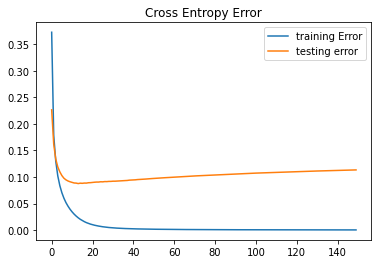

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_loss_li_2,label="training Error")
plt.plot(val_loss_li_2,label="testing error")
plt.title("Cross Entropy Error")
plt.legend()
#plt.ylim(0,2)

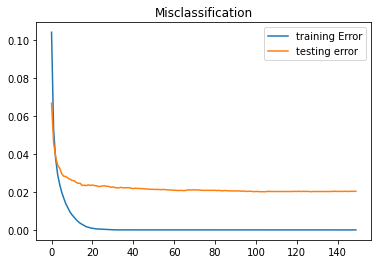

In [ ]:
import matplotlib.pyplot as plt
plt.plot( misclass_train_li_2,label="training Error")
plt.plot(misclass_valid_li_2,label="testing error")
plt.title("Misclassification")
plt.legend()

Here Model valid misclassifcation = 0.020299999999999985

# RANDOME SEED 88

In [ ]:

import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(88)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)
 
# Building Our Mode
class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100, 10)
        
    # Forward Pass
    def forward(self, x):
        x = x.view(x.shape[0],-1)    # Flatten the images
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc2(x)
        return x
 
model_88 = Network()
if torch.cuda.is_available():
    model_88 = model_88.cuda()
 
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_88.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li_3=[]
val_loss_li_3=[]
misclass_train_li_3=[]
misclass_valid_li_3=[]
 
for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model_88(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li_3.append(train_loss / len(trainloader))
    misclass_train_li_3.append(mis_accuracy)
    
    
   
    # Validation error
    valid_loss = 0.0
    #model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model_88(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li_3.append(valid_loss / len(validloader))

    correct_count, all_count = 0, 0
    for images,labels in validloader:
      for i in range(len(labels)):
        img = images[i].view(1, 784).to(device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
        
        #img = images[i].view(shape=(, 784))
        with torch.no_grad():
          logps = model_88(img)
          #.cuda

    
        ps = torch.exp(logps)
        probab = list(ps.cpu().numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1
    valid_misclassify=1-correct_count/all_count
    misclass_valid_li_3.append(valid_misclassify)
    



    print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
    print("\nModel train Accuracy =", mis_accuracy)
    print("\nModel valid Accuracy =", valid_misclassify)

 
         
        # Saving State Dict
    torch.save(model_88.state_dict(), '/content/drive/MyDrive/saved_model_lr_full=0.1_seed_88.pth')




  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

Epoch 1 		 Training Loss: 0.3733925210456206 		 Validation Loss: 0.215922475384828

Model train Accuracy = 0.10506000000000004

Model valid Accuracy = 0.0615
Epoch 2 		 Training Loss: 0.18168792916880117 		 Validation Loss: 0.15439173485786198

Model train Accuracy = 0.05281999999999998

Model valid Accuracy = 0.044300000000000006
Epoch 3 		 Training Loss: 0.13122359796421829 		 Validation Loss: 0.12595151659821313

Model train Accuracy = 0.03825999999999996

Model valid Accuracy = 0.036699999999999955
Epoch 4 		 Training Loss: 0.10327624973512695 		 Validation Loss: 0.11367378777976091

Model train Accuracy = 0.029859999999999998

Model valid Accuracy = 0.03469999999999995
Epoch 5 		 Training Loss: 0.08533310183393635 		 Validation Loss: 0.10612492894712157

Model train Accuracy = 0.024599999999999955

Model valid Accuracy = 0.03080000000000005
Epoch 6 		 Training Loss: 0.0720999903383445 		 Validation Loss: 0.10060806679331

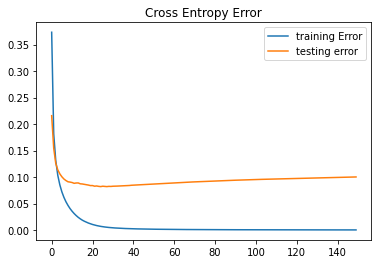

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_loss_li_3,label="training Error")
plt.plot(val_loss_li_3,label="testing error")
plt.title("Cross Entropy Error")
plt.legend()
#plt.ylim(0,2)

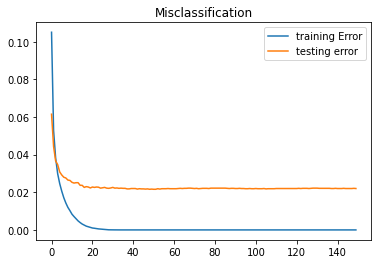

In [ ]:
import matplotlib.pyplot as plt
plt.plot( misclass_train_li_3,label="training Error")
plt.plot(misclass_valid_li_3,label="testing error")
plt.title("Misclassification")
plt.legend()

Here Model valid Accuracy = 0.02200000000000002

## RANDOM SEED 100

In [ ]:

import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(100)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)
 
# Building Our Mode
class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100, 10)
        
    # Forward Pass
    def forward(self, x):
        x = x.view(x.shape[0],-1)    # Flatten the images
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc2(x)
        return x
 
model_100 = Network()
if torch.cuda.is_available():
    model_100 = model_100.cuda()
 
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_100.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li_4=[]
val_loss_li_4=[]
misclass_train_li_4=[]
misclass_valid_li_4=[]
 
for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model_100(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li_4.append(train_loss / len(trainloader))
    misclass_train_li_4.append(mis_accuracy)
    
    
    
   
    # Validation error
    valid_loss = 0.0
    #model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model_100(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li_4.append(valid_loss / len(validloader))

    correct_count, all_count = 0, 0
    for images,labels in validloader:
      for i in range(len(labels)):
        img = images[i].view(1, 784).to(device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
        
        #img = images[i].view(shape=(, 784))
        with torch.no_grad():
          logps = model_100(img)
          #.cuda

    
        ps = torch.exp(logps)
        probab = list(ps.cpu().numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1
    valid_misclassify=1-correct_count/all_count
    misclass_valid_li_4.append(valid_misclassify)
    



    print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
    print("\nModel train Accuracy =", mis_accuracy)
    print("\nModel valid Accuracy =", valid_misclassify)

   
         
        # Saving State Dict
    torch.save(model_100.state_dict(), '/content/drive/MyDrive/saved_model_lr_full=0.1_seed_100.pth')




Epoch 1 		 Training Loss: 0.3730836594781182 		 Validation Loss: 0.23240120685733737

Model train Accuracy = 0.10436000000000001

Model valid Accuracy = 0.06769999999999998
Epoch 2 		 Training Loss: 0.17748573863722733 		 Validation Loss: 0.15754646664491287

Model train Accuracy = 0.050899999999999945

Model valid Accuracy = 0.04479999999999995
Epoch 3 		 Training Loss: 0.12756795044904973 		 Validation Loss: 0.12553068160856018

Model train Accuracy = 0.03632000000000002

Model valid Accuracy = 0.035499999999999976
Epoch 4 		 Training Loss: 0.1002552491581152 		 Validation Loss: 0.11002668824356299

Model train Accuracy = 0.02854000000000001

Model valid Accuracy = 0.03149999999999997
Epoch 5 		 Training Loss: 0.08236357225841048 		 Validation Loss: 0.1009926661988869

Model train Accuracy = 0.023540000000000005

Model valid Accuracy = 0.029299999999999993
Epoch 6 		 Training Loss: 0.06940617193977372 		 Validation Loss: 0.09555614819994178

Model train Accuracy = 0.01963999999999999

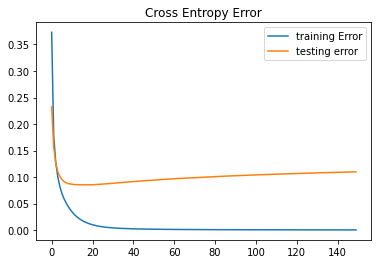

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_loss_li_4,label="training Error")
plt.plot(val_loss_li_4,label="testing error")
plt.title("Cross Entropy Error")
plt.legend()
#plt.ylim(0,2)

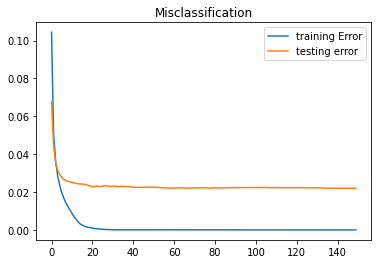

In [ ]:
import matplotlib.pyplot as plt
plt.plot( misclass_train_li_4,label="training Error")
plt.plot(misclass_valid_li_4,label="testing error")
plt.title("Misclassification")
plt.legend()

Here misclassification accuracy is Model valid Accuracy = 0.02200000000000002


## Random seed 200

In [ ]:

import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(200)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)
 
# Building Our Mode
class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100, 10)
        
    # Forward Pass
    def forward(self, x):
        x = x.view(x.shape[0],-1)    # Flatten the images
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc2(x)
        return x
 
model_200 = Network()
if torch.cuda.is_available():
    model_200 = model_200.cuda()
 
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_200.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li_5=[]
val_loss_li_5=[]
misclass_train_li_5=[]
misclass_valid_li_5=[]
 
for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model_200(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li_5.append(train_loss / len(trainloader))
    misclass_train_li_5.append(mis_accuracy)
    
    
    #len(trainset)
    # trainset, not train_loader
    # probably x in your case

    #print("Accuracy = {}".format(accuracy))
        
        
        
    
   
    # Validation error
    valid_loss = 0.0
    #model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model_200(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li_5.append(valid_loss / len(validloader))

    correct_count, all_count = 0, 0
    for images,labels in validloader:
      for i in range(len(labels)):
        img = images[i].view(1, 784).to(device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
        
        #img = images[i].view(shape=(, 784))
        with torch.no_grad():
          logps = model_200(img)
          #.cuda

    
        ps = torch.exp(logps)
        probab = list(ps.cpu().numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1
    valid_misclassify=1-correct_count/all_count
    misclass_valid_li_5.append(valid_misclassify)
    



    print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
    print("\nModel train Accuracy =", mis_accuracy)
    print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model_200.state_dict(), '/content/drive/MyDrive/saved_model_lr_full=0.1_seed_200.pth')




Epoch 1 		 Training Loss: 0.37168115067342805 		 Validation Loss: 0.22687693089603805

Model train Accuracy = 0.10338000000000003

Model valid Accuracy = 0.06520000000000004
Epoch 2 		 Training Loss: 0.17943371024867014 		 Validation Loss: 0.15985425591123656

Model train Accuracy = 0.05230000000000001

Model valid Accuracy = 0.04610000000000003
Epoch 3 		 Training Loss: 0.12885993561854614 		 Validation Loss: 0.12838335142741664

Model train Accuracy = 0.03727999999999998

Model valid Accuracy = 0.0353
Epoch 4 		 Training Loss: 0.1007663327509386 		 Validation Loss: 0.11092654752809876

Model train Accuracy = 0.02939999999999998

Model valid Accuracy = 0.031299999999999994
Epoch 5 		 Training Loss: 0.08227891073415028 		 Validation Loss: 0.10185119736725434

Model train Accuracy = 0.023440000000000016

Model valid Accuracy = 0.028900000000000037
Epoch 6 		 Training Loss: 0.06896560089883137 		 Validation Loss: 0.0967539378386824

Model train Accuracy = 0.019460000000000033

Model vali

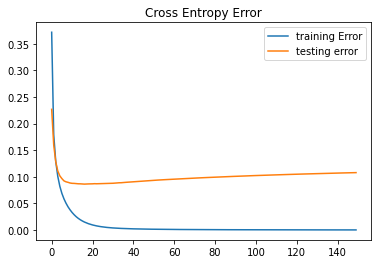

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_loss_li_5,label="training Error")
plt.plot(val_loss_li_5,label="testing error")
plt.title("Cross Entropy Error")
plt.legend()

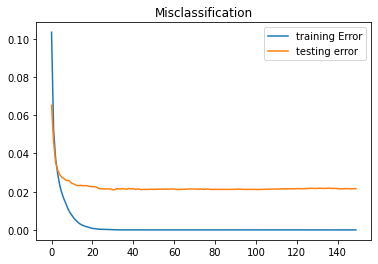

In [ ]:
import matplotlib.pyplot as plt
plt.plot( misclass_train_li_5,label="training Error")
plt.plot(misclass_valid_li_5,label="testing error")
plt.title("Misclassification")
plt.legend()

BEST MODEL OVER HERE IS AT SEED 66 with a misclassification error of 0.020299999999999985. This shows there is 98% accuracy 

# Part c

In [ ]:
import torch
wt_66=torch.load("/content/drive/MyDrive/saved_model_lr_full=0.1_seed_66.pth")

In [ ]:
for name, param in model_new.named_parameters():
    print(name, ':', param.requires_grad)

fc1.weight : True
fc1.bias : True
fc2.weight : True
fc2.bias : True


In [ ]:
model_new.fc1.weight

Parameter containing:
tensor([[ 0.0248,  0.0252,  0.0139,  ..., -0.0004, -0.0167,  0.0243],
        [-0.0002, -0.0274, -0.0318,  ...,  0.0173,  0.0309,  0.0166],
        [ 0.0224, -0.0102,  0.0353,  ..., -0.0290, -0.0126,  0.0172],
        ...,
        [ 0.0112, -0.0013, -0.0332,  ...,  0.0018, -0.0190,  0.0237],
        [-0.0158, -0.0058, -0.0265,  ...,  0.0081, -0.0160,  0.0203],
        [ 0.0107, -0.0278,  0.0323,  ...,  0.0043,  0.0088,  0.0019]],
       requires_grad=True)

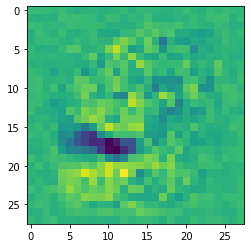

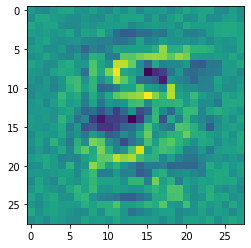

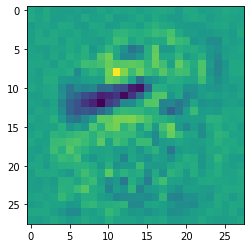

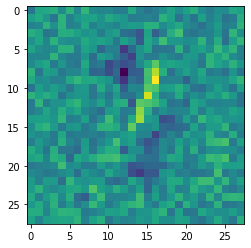

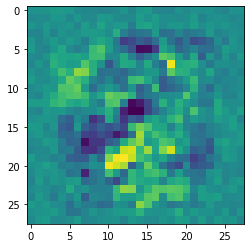

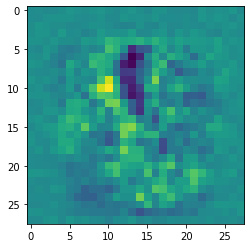

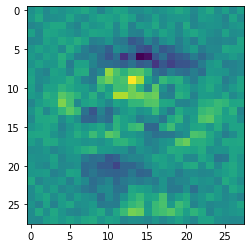

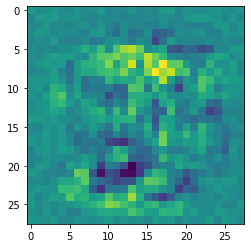

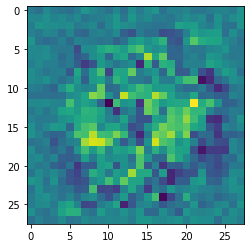

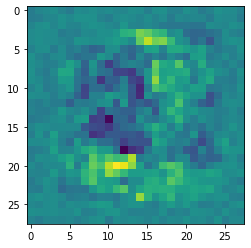

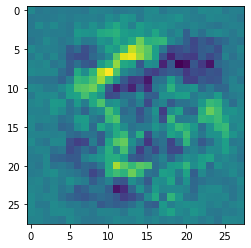

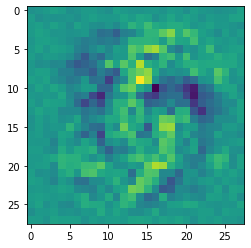

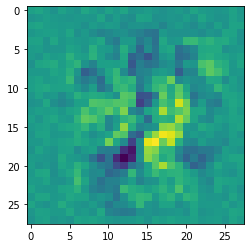

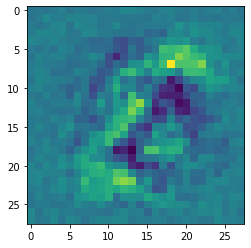

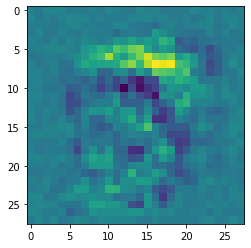

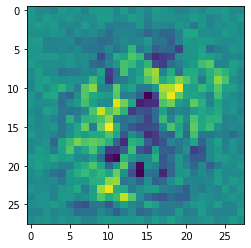

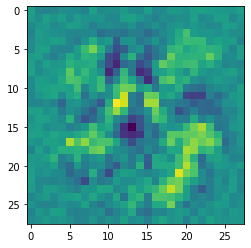

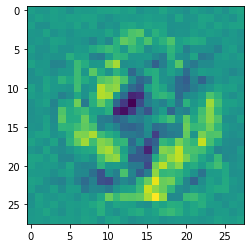

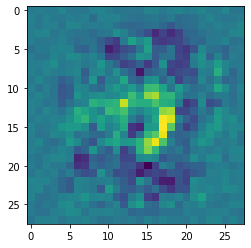

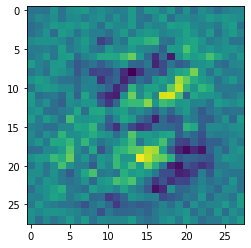

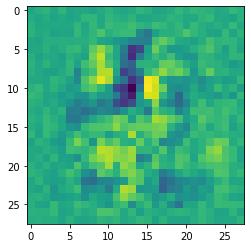

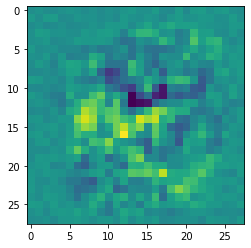

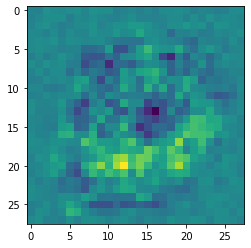

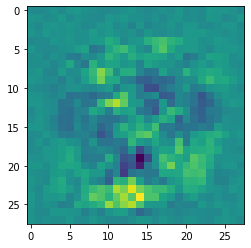

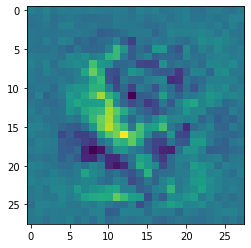

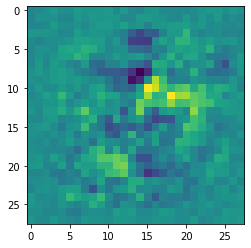

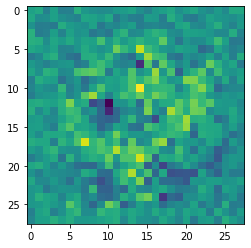

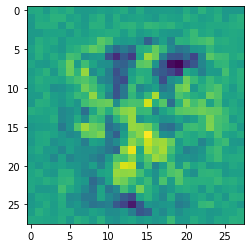

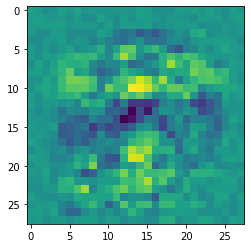

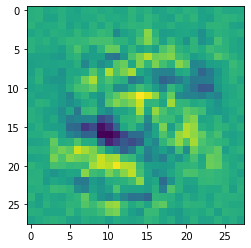

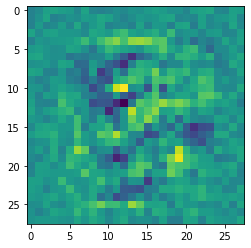

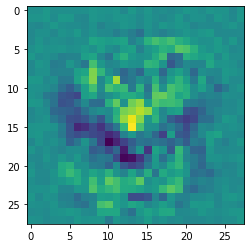

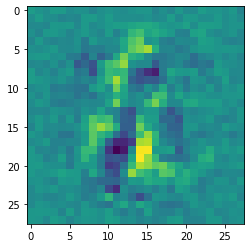

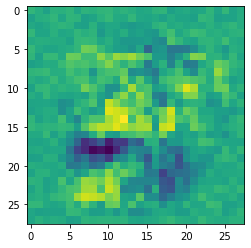

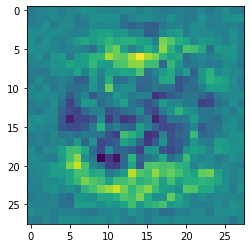

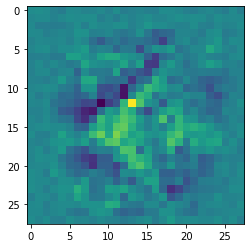

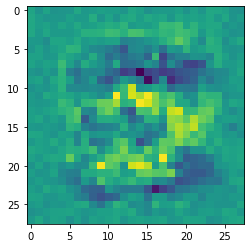

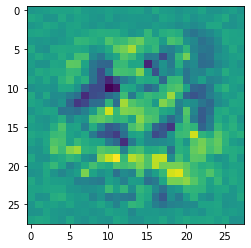

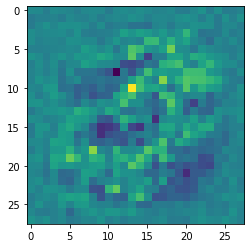

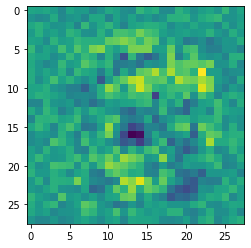

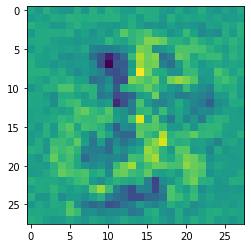

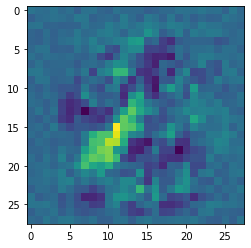

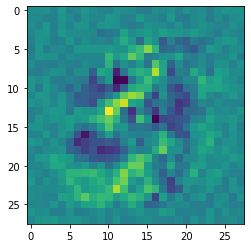

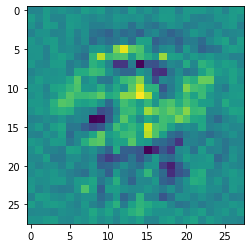

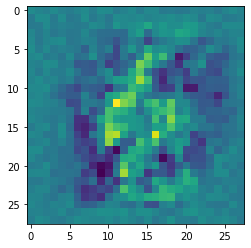

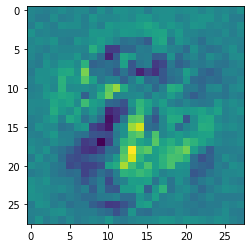

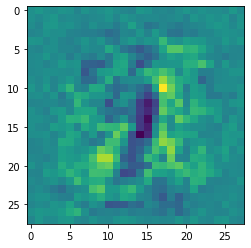

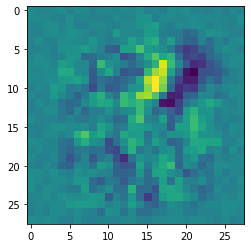

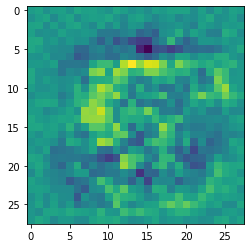

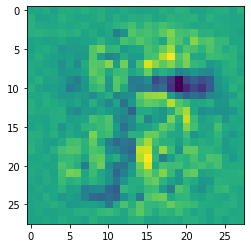

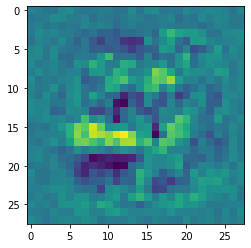

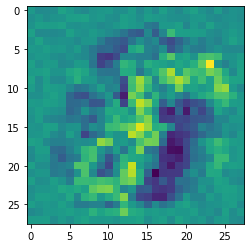

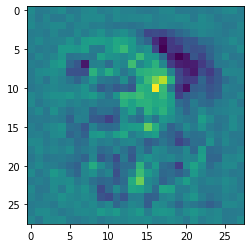

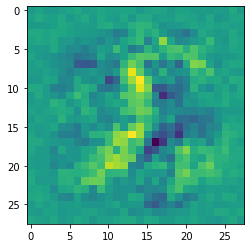

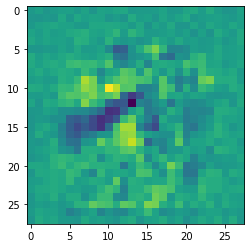

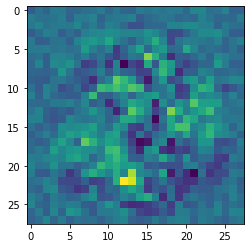

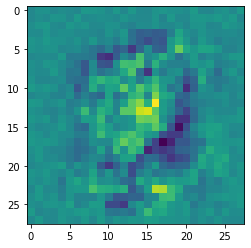

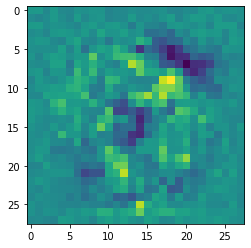

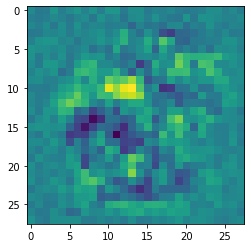

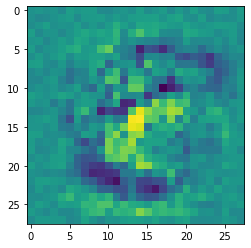

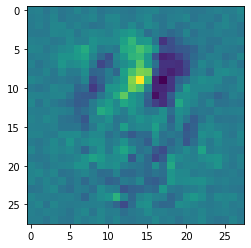

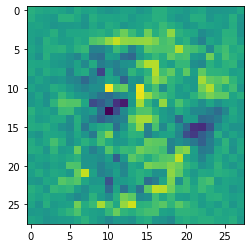

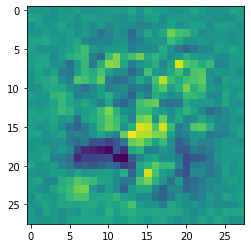

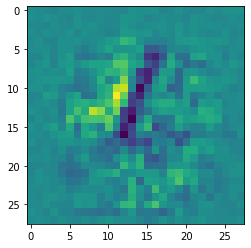

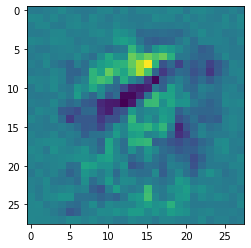

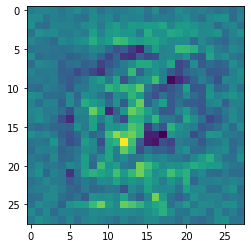

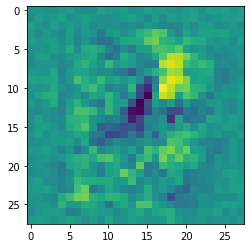

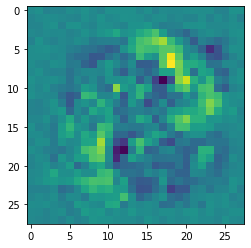

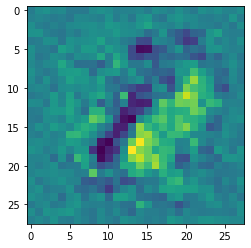

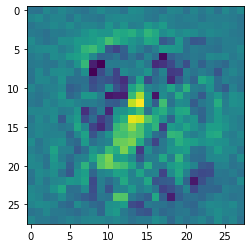

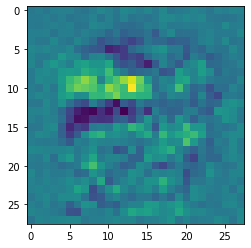

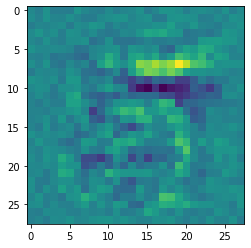

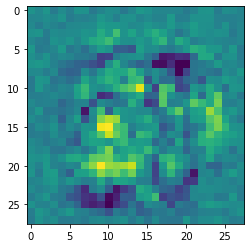

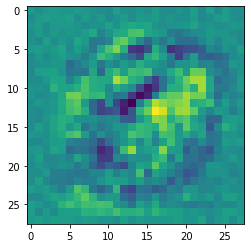

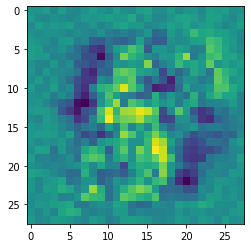

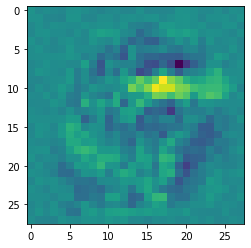

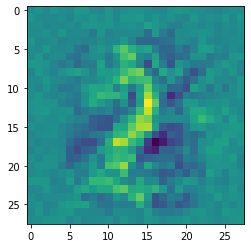

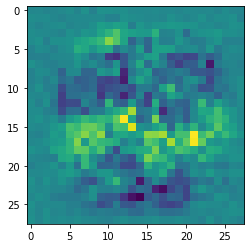

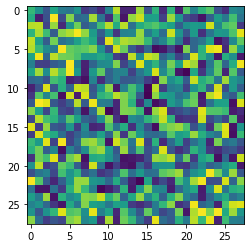

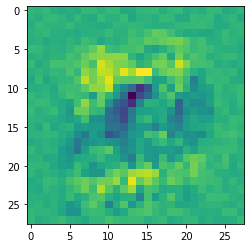

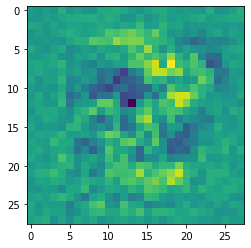

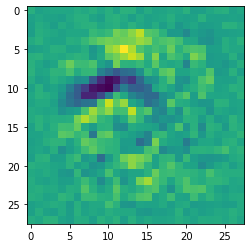

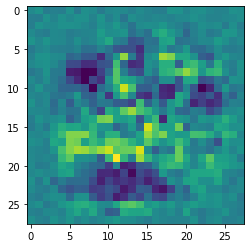

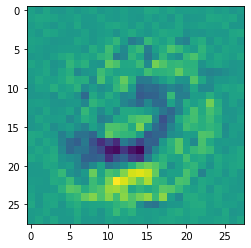

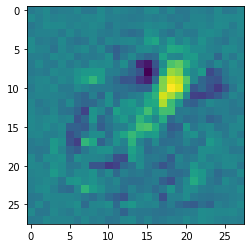

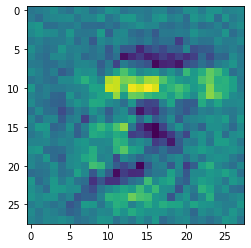

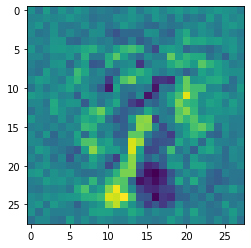

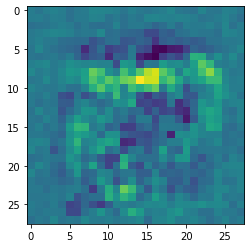

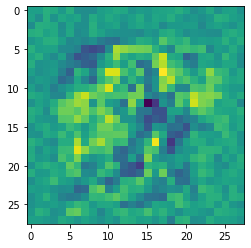

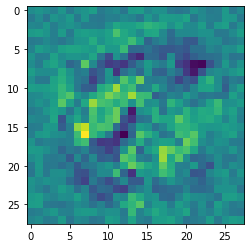

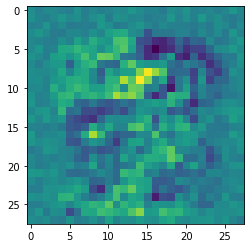

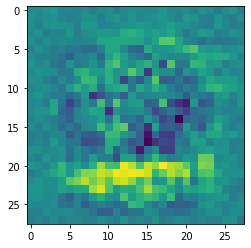

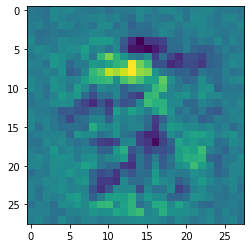

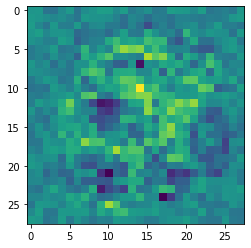

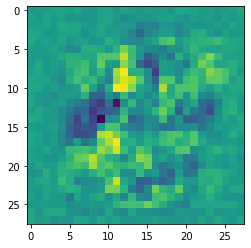

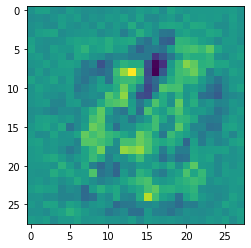

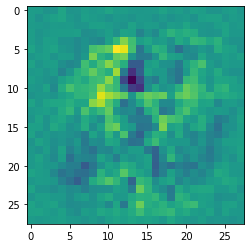

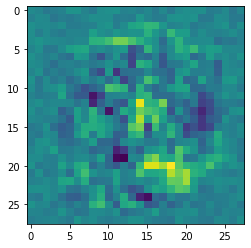

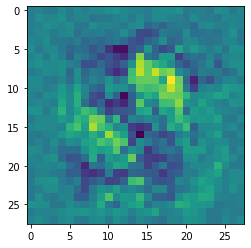

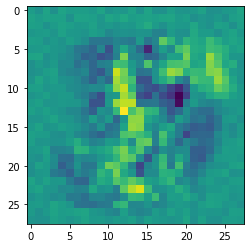

In [ ]:
for i in range(100):
  #print(i)
  plt.imshow(model_new.fc1.weight[i].reshape(28,28).cpu().data.numpy())
  plt.show()

## Part d

```
# This is formatted as code
```



# LR=0.01

learning rate is 0.01 and momentum 0
Epoch 50 		 Training Loss: 0.06341507178043049 		 Validation Loss: 0.10266677622710126

Model train Accuracy = 0.01634000000000002

Model valid Accuracy = 0.02949999999999997
Epoch 100 		 Training Loss: 0.02744242780983701 		 Validation Loss: 0.09188236453914092

Model train Accuracy = 0.00541999999999998

Model valid Accuracy = 0.026900000000000035
Epoch 150 		 Training Loss: 0.014283372968414731 		 Validation Loss: 0.09362942037732748

Model train Accuracy = 0.0013999999999999568

Model valid Accuracy = 0.02639999999999998


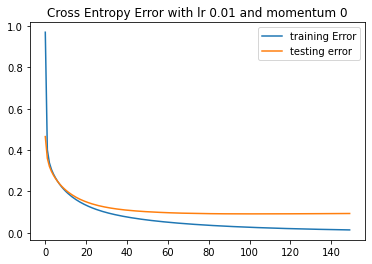

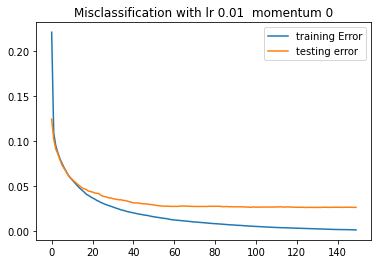

Final_valid_accuracy is 0.02639999999999998
learning rate is 0.01 and momentum 0.5
Epoch 50 		 Training Loss: 0.027929047191828687 		 Validation Loss: 0.08420557419050889

Model train Accuracy = 0.005260000000000042

Model valid Accuracy = 0.02529999999999999
Epoch 100 		 Training Loss: 0.008830873585111039 		 Validation Loss: 0.08806861803159133

Model train Accuracy = 0.00043999999999999595

Model valid Accuracy = 0.023399999999999976
Epoch 150 		 Training Loss: 0.004146667242957585 		 Validation Loss: 0.09427163254315002

Model train Accuracy = 4.0000000000040004e-05

Model valid Accuracy = 0.023599999999999954


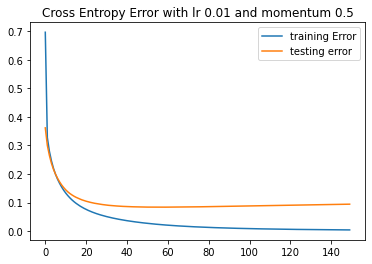

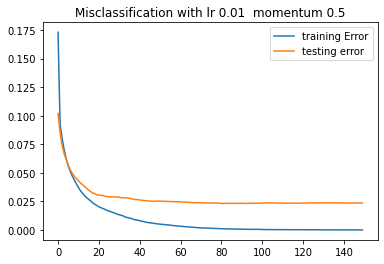

Final_valid_accuracy is 0.023599999999999954
learning rate is 0.01 and momentum 0.9
Epoch 50 		 Training Loss: 0.0016752276567789375 		 Validation Loss: 0.09675930283253856

Model train Accuracy = 0.0

Model valid Accuracy = 0.022800000000000042
Epoch 100 		 Training Loss: 0.0005941872831277213 		 Validation Loss: 0.10594430965045486

Model train Accuracy = 0.0

Model valid Accuracy = 0.022800000000000042
Epoch 150 		 Training Loss: 0.00034411636448379926 		 Validation Loss: 0.11159407823284824

Model train Accuracy = 0.0

Model valid Accuracy = 0.022299999999999986


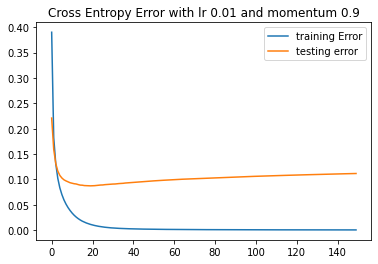

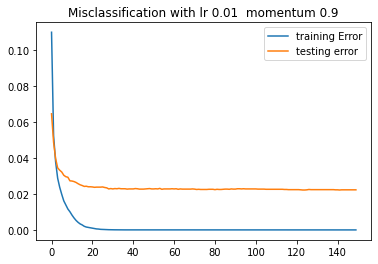

Final_valid_accuracy is 0.022299999999999986


In [ ]:

import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(66)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)
 

for i in [0,0.5,0.9]:
  print("learning rate is 0.01 and momentum {}".format(i))
# Building Our Mode
  class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100, 10)
        
    # Forward Pass
    def forward(self, x):
        x = x.view(x.shape[0],-1)    # Flatten the images
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc2(x)
        return x
 
  model_lr_01 = Network()
  if torch.cuda.is_available():
    model_lr_01 = model_lr_01.cuda()
 
# Declaring Criterion and Optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model_lr_01.parameters(), lr = 0.01,momentum=i)
 
# Training with Validation
  epochs = 150
  min_valid_loss = np.inf 
  train_loss_li_6=[]
  val_loss_li_6=[]
  misclass_train_li_6=[]
  misclass_valid_li_6=[]
 
  for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model_lr_01(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li_6.append(train_loss / len(trainloader))
    misclass_train_li_6.append(mis_accuracy)
    
    
    #len(trainset)
    # trainset, not train_loader
    # probably x in your case

    #print("Accuracy = {}".format(accuracy))
        
        
        
        
   
   
    # Validation error
    valid_loss = 0.0
    #model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model_lr_01(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li_6.append(valid_loss / len(validloader))

    correct_count, all_count = 0, 0
    for images,labels in validloader:
      for j in range(len(labels)):
        img = images[j].view(1, 784).to(device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
        
        #img = images[i].view(shape=(, 784))
        with torch.no_grad():
          logps = model_lr_01(img)
          #.cuda

    
        ps = torch.exp(logps)
        probab = list(ps.cpu().numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[j]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1
    valid_misclassify=1-correct_count/all_count
    misclass_valid_li_6.append(valid_misclassify)
    


    if (e+1) % 50 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model_lr_01.state_dict(), '/content/drive/MyDrive/saved_model_lr_full=0.01_momentum_{}.pth'.format(i))

  
  # Cross validation
  import matplotlib.pyplot as plt
  plt.plot(train_loss_li_6,label="training Error")
  plt.plot(val_loss_li_6,label="testing error")
  plt.title("Cross Entropy Error with lr 0.01 and momentum {}".format(i))
  plt.legend()
  plt.show()

  #Misaccuracy
  import matplotlib.pyplot as plt
  plt.plot( misclass_train_li_6,label="training Error")
  plt.plot(misclass_valid_li_6,label="testing error")
  plt.title("Misclassification with lr 0.01  momentum {}".format(i))
  plt.legend()
  plt.show()
  print("Final_valid_accuracy is",valid_misclassify)

#### When LR=0.01 lowest validation was s 0.022299999999999986 i.e when momentum was 0.9

# LR=0.1

In [ ]:
import torch

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

learning rate is 0.1 and momentum 0
Epoch 50 		 Training Loss: 0.0017097912070407734 		 Validation Loss: 0.08909584885273339

Model train Accuracy = 0.0

Model valid Accuracy = 0.02300000000000002
Epoch 100 		 Training Loss: 0.0005983994015911293 		 Validation Loss: 0.09437660103366725

Model train Accuracy = 0.0

Model valid Accuracy = 0.02100000000000002
Epoch 150 		 Training Loss: 0.0003462366317056811 		 Validation Loss: 0.09840100134322612

Model train Accuracy = 0.0

Model valid Accuracy = 0.02100000000000002


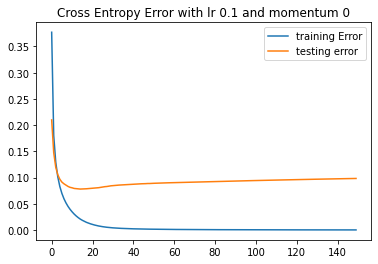

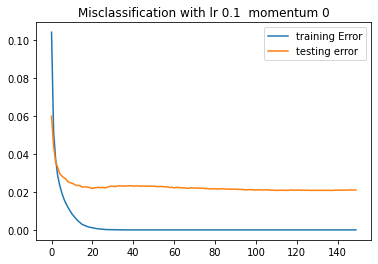

Final_valid_accuracy is 0.02100000000000002
learning rate is 0.1 and momentum 0.5
Epoch 50 		 Training Loss: 0.0005566476994478965 		 Validation Loss: 0.09995540609738797

Model train Accuracy = 0.0

Model valid Accuracy = 0.023399999999999976
Epoch 100 		 Training Loss: 0.0002232094961389165 		 Validation Loss: 0.10818652213066335

Model train Accuracy = 0.0

Model valid Accuracy = 0.02300000000000002
Epoch 150 		 Training Loss: 0.00013607018957934673 		 Validation Loss: 0.11302744622585974

Model train Accuracy = 0.0

Model valid Accuracy = 0.02290000000000003


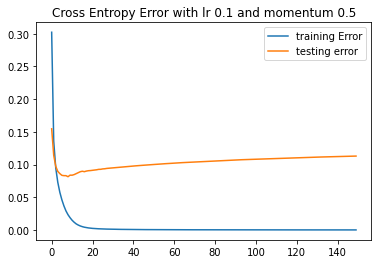

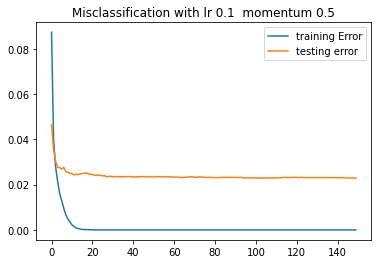

Final_valid_accuracy is 0.02290000000000003
learning rate is 0.1 and momentum 0.9
Epoch 50 		 Training Loss: 0.19375708749297887 		 Validation Loss: 0.9092025066043299

Model train Accuracy = 0.014979999999999993

Model valid Accuracy = 0.12250000000000005
Epoch 100 		 Training Loss: 0.19885106201404726 		 Validation Loss: 2.2488454654615935

Model train Accuracy = 0.009619999999999962

Model valid Accuracy = 0.4861
Epoch 150 		 Training Loss: 0.27000282672672715 		 Validation Loss: 5.124067403533029

Model train Accuracy = 0.009099999999999997

Model valid Accuracy = 0.6496999999999999


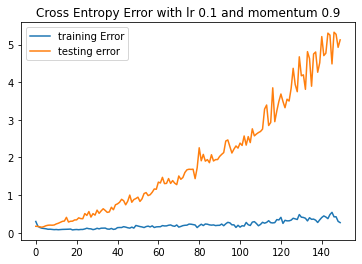

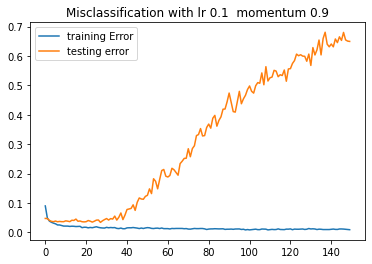

Final_valid_accuracy is 0.6496999999999999


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(66)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)
 

for i in [0,0.5,0.9]:
  print("learning rate is 0.1 and momentum {}".format(i))
# Building Our Mode
  class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100, 10)
        
    # Forward Pass
    def forward(self, x):
        x = x.view(x.shape[0],-1)    # Flatten the images
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc2(x)
        return x
 
  model_lr_01 = Network()
  if torch.cuda.is_available():
    model_lr_01 = model_lr_01.cuda()
 
# Declaring Criterion and Optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model_lr_01.parameters(), lr = 0.1,momentum=i)
 
# Training with Validation
  epochs = 150
  min_valid_loss = np.inf 
  train_loss_li_6=[]
  val_loss_li_6=[]
  misclass_train_li_6=[]
  misclass_valid_li_6=[]
 
  for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model_lr_01(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li_6.append(train_loss / len(trainloader))
    misclass_train_li_6.append(mis_accuracy)
    
    
    #len(trainset)
    # trainset, not train_loader
    # probably x in your case

    #print("Accuracy = {}".format(accuracy))
        
        
        
        
   
   
    # Validation error
    valid_loss = 0.0
    #model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model_lr_01(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li_6.append(valid_loss / len(validloader))

    correct_count, all_count = 0, 0
    for images,labels in validloader:
      for j in range(len(labels)):
        img = images[j].view(1, 784).to(device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
        
        #img = images[i].view(shape=(, 784))
        with torch.no_grad():
          logps = model_lr_01(img)
          #.cuda

    
        ps = torch.exp(logps)
        probab = list(ps.cpu().numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[j]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1
    valid_misclassify=1-correct_count/all_count
    misclass_valid_li_6.append(valid_misclassify)
    


    if (e+1) % 50 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model_lr_01.state_dict(), '/content/drive/MyDrive/saved_model_lr_full=0.1_momentum_{}.pth'.format(i))

  
  # Cross validation
  import matplotlib.pyplot as plt
  plt.plot(train_loss_li_6,label="training Error")
  plt.plot(val_loss_li_6,label="testing error")
  plt.title("Cross Entropy Error with lr 0.1 and momentum {}".format(i))
  plt.legend()
  plt.show()

  #Misaccuracy
  import matplotlib.pyplot as plt
  plt.plot( misclass_train_li_6,label="training Error")
  plt.plot(misclass_valid_li_6,label="testing error")
  plt.title("Misclassification with lr 0.1  momentum {}".format(i))
  plt.legend()
  plt.show()
  print("Final_valid_accuracy is",valid_misclassify)

### With LR of 0.1 and monetum 0 we get the least misclassification error i.e 0.02100000000000002 . We also notice a huge amount of Overfitting in the case where Momentum is 0.9 which isnt there to that extent in the previous 2 cases.

In [ ]:
th

# LR 0.2

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

learning rate is 0.2 and momentum 0
Epoch 50 		 Training Loss: 0.0005821172436768679 		 Validation Loss: 0.09739810525567777

Model train Accuracy = 0.0

Model valid Accuracy = 0.020100000000000007
Epoch 100 		 Training Loss: 0.00023065183774405196 		 Validation Loss: 0.10552248528871622

Model train Accuracy = 0.0

Model valid Accuracy = 0.020499999999999963
Epoch 150 		 Training Loss: 0.00013976644261927824 		 Validation Loss: 0.11068924103044785

Model train Accuracy = 0.0

Model valid Accuracy = 0.02080000000000004


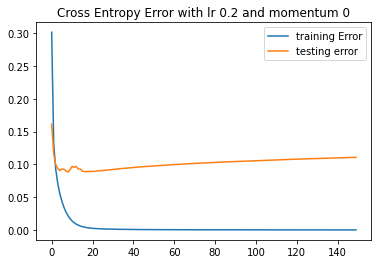

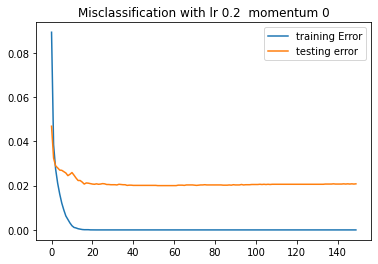

Final_valid_accuracy is 0.02080000000000004
learning rate is 0.2 and momentum 0.5
Epoch 50 		 Training Loss: 0.000161946752071181 		 Validation Loss: 0.11195215729272011

Model train Accuracy = 0.0

Model valid Accuracy = 0.020399999999999974
Epoch 100 		 Training Loss: 7.578012548605691e-05 		 Validation Loss: 0.11839648512389145

Model train Accuracy = 0.0

Model valid Accuracy = 0.020499999999999963
Epoch 150 		 Training Loss: 4.9315120817183526e-05 		 Validation Loss: 0.12238614480807723

Model train Accuracy = 0.0

Model valid Accuracy = 0.02080000000000004


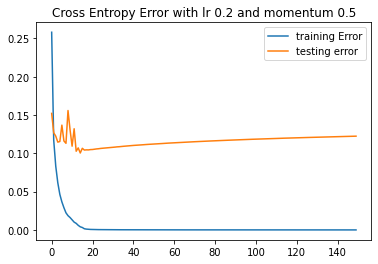

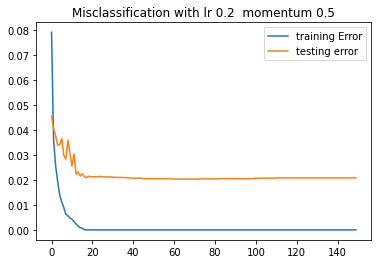

Final_valid_accuracy is 0.02080000000000004
learning rate is 0.2 and momentum 0.9
Epoch 50 		 Training Loss: 0.48441656319971504 		 Validation Loss: 0.813805053314081

Model train Accuracy = 0.16708

Model valid Accuracy = 0.21030000000000004
Epoch 100 		 Training Loss: 0.3504671484800395 		 Validation Loss: 1.1252997632081898

Model train Accuracy = 0.08355999999999997

Model valid Accuracy = 0.22799999999999998
Epoch 150 		 Training Loss: 0.5284352608821137 		 Validation Loss: 1.2633902159647439

Model train Accuracy = 0.18381999999999998

Model valid Accuracy = 0.34830000000000005


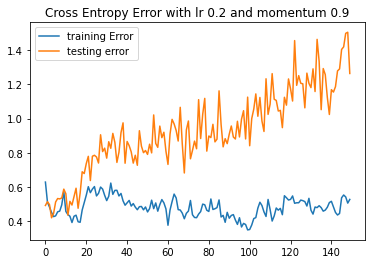

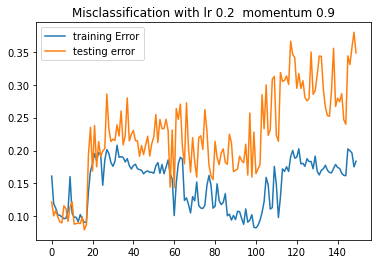

Final_valid_accuracy is 0.34830000000000005


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(66)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)
 

for i in [0,0.5,0.9]:
  print("learning rate is 0.2 and momentum {}".format(i))
# Building Our Mode
  class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100, 10)
        
    # Forward Pass
    def forward(self, x):
        x = x.view(x.shape[0],-1)    # Flatten the images
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc2(x)
        return x
 
  model_lr_01 = Network()
  if torch.cuda.is_available():
    model_lr_01 = model_lr_01.cuda()
 
# Declaring Criterion and Optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model_lr_01.parameters(), lr =0.2,momentum=i)
 
# Training with Validation
  epochs = 150
  min_valid_loss = np.inf 
  train_loss_li_6=[]
  val_loss_li_6=[]
  misclass_train_li_6=[]
  misclass_valid_li_6=[]
 
  for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model_lr_01(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li_6.append(train_loss / len(trainloader))
    misclass_train_li_6.append(mis_accuracy)
    
    
    #len(trainset)
    # trainset, not train_loader
    # probably x in your case

    #print("Accuracy = {}".format(accuracy))
        
        
        
        
   
   
    # Validation error
    valid_loss = 0.0
    #model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model_lr_01(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li_6.append(valid_loss / len(validloader))

    correct_count, all_count = 0, 0
    for images,labels in validloader:
      for j in range(len(labels)):
        img = images[j].view(1, 784).to(device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
        
        #img = images[i].view(shape=(, 784))
        with torch.no_grad():
          logps = model_lr_01(img)
          #.cuda

    
        ps = torch.exp(logps)
        probab = list(ps.cpu().numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[j]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1
    valid_misclassify=1-correct_count/all_count
    misclass_valid_li_6.append(valid_misclassify)
    


    if (e+1) % 50 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model_lr_01.state_dict(), '/content/drive/MyDrive/saved_model_lr_full=0.2_momentum_{}.pth'.format(i))

  
  # Cross validation
  import matplotlib.pyplot as plt
  plt.plot(train_loss_li_6,label="training Error")
  plt.plot(val_loss_li_6,label="testing error")
  plt.title("Cross Entropy Error with lr 0.2 and momentum {}".format(i))
  plt.legend()
  plt.show()

  #Misaccuracy
  import matplotlib.pyplot as plt
  plt.plot( misclass_train_li_6,label="training Error")
  plt.plot(misclass_valid_li_6,label="testing error")
  plt.title("Misclassification with lr 0.2  momentum {}".format(i))
  plt.legend()
  plt.show()
  print("Final_valid_accuracy is",valid_misclassify)

# LR=0.5

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

learning rate is 0.5 and momentum 0
Epoch 50 		 Training Loss: 6.199623052991037e-05 		 Validation Loss: 0.16388793450153016

Model train Accuracy = 0.0

Model valid Accuracy = 0.024499999999999966
Epoch 100 		 Training Loss: 3.1478180553350915e-05 		 Validation Loss: 0.1692195181545169

Model train Accuracy = 0.0

Model valid Accuracy = 0.02410000000000001
Epoch 150 		 Training Loss: 2.1809093532665927e-05 		 Validation Loss: 0.1725947939884011

Model train Accuracy = 0.0

Model valid Accuracy = 0.02410000000000001


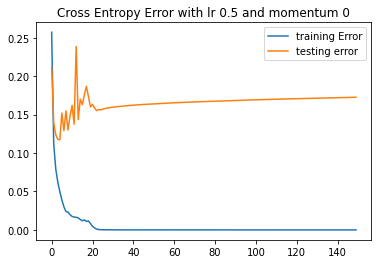

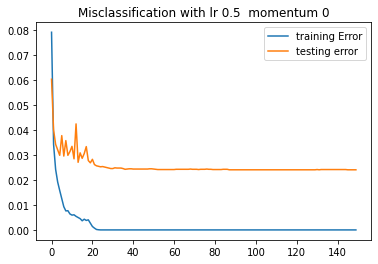

Final_valid_accuracy is 0.02410000000000001
learning rate is 0.5 and momentum 0.5
Epoch 50 		 Training Loss: 0.15895500458773315 		 Validation Loss: 1.0481560335346696

Model train Accuracy = 0.015739999999999976

Model valid Accuracy = 0.1431
Epoch 100 		 Training Loss: 0.26260978794987877 		 Validation Loss: 2.5902259142390682

Model train Accuracy = 0.011140000000000039

Model valid Accuracy = 0.523
Epoch 150 		 Training Loss: 0.27161405819796763 		 Validation Loss: 4.92536942813458

Model train Accuracy = 0.00875999999999999

Model valid Accuracy = 0.6075999999999999


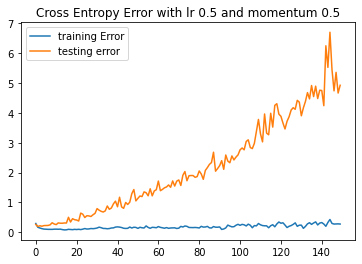

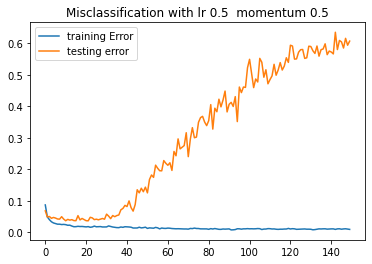

Final_valid_accuracy is 0.6075999999999999
learning rate is 0.5 and momentum 0.9


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(66)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)
 

for i in [0,0.5,0.9]:
  print("learning rate is 0.5 and momentum {}".format(i))
# Building Our Mode
  class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100, 10)
        
    # Forward Pass
    def forward(self, x):
        x = x.view(x.shape[0],-1)    # Flatten the images
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc2(x)
        return x
 
  model_lr_01 = Network()
  if torch.cuda.is_available():
    model_lr_01 = model_lr_01.cuda()
 
# Declaring Criterion and Optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model_lr_01.parameters(), lr =0.5,momentum=i)
 
# Training with Validation
  epochs = 150
  min_valid_loss = np.inf 
  train_loss_li_6=[]
  val_loss_li_6=[]
  misclass_train_li_6=[]
  misclass_valid_li_6=[]
 
  for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model_lr_01(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li_6.append(train_loss / len(trainloader))
    misclass_train_li_6.append(mis_accuracy)
    
    
    #len(trainset)
    # trainset, not train_loader
    # probably x in your case

    #print("Accuracy = {}".format(accuracy))
        
        
        
        
   
   
    # Validation error
    valid_loss = 0.0
    #model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model_lr_01(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li_6.append(valid_loss / len(validloader))

    correct_count, all_count = 0, 0
    for images,labels in validloader:
      for j in range(len(labels)):
        img = images[j].view(1, 784).to(device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
        
        #img = images[i].view(shape=(, 784))
        with torch.no_grad():
          logps = model_lr_01(img)
          #.cuda

    
        ps = torch.exp(logps)
        probab = list(ps.cpu().numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[j]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1
    valid_misclassify=1-correct_count/all_count
    misclass_valid_li_6.append(valid_misclassify)
    


    if (e+1) % 50 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model_lr_01.state_dict(), '/content/drive/MyDrive/saved_model_lr_full=0.5_momentum_{}.pth'.format(i))

  
  # Cross validation
  import matplotlib.pyplot as plt
  plt.plot(train_loss_li_6,label="training Error")
  plt.plot(val_loss_li_6,label="testing error")
  plt.title("Cross Entropy Error with lr 0.5 and momentum {}".format(i))
  plt.legend()
  plt.show()

  #Misaccuracy
  import matplotlib.pyplot as plt
  plt.plot( misclass_train_li_6,label="training Error")
  plt.plot(misclass_valid_li_6,label="testing error")
  plt.title("Misclassification with lr 0.5  momentum {}".format(i))
  plt.legend()
  plt.show()
  print("Final_valid_accuracy is",valid_misclassify)

# LR OF 0.5 AND MOMENTUM 0.9

Epoch 1 		 Training Loss: 2.1013939234970933 		 Validation Loss: 2.3020578367641558

Model train Misclassification = 0.76096

Model valid Misclassification = 0.8867
Epoch 2 		 Training Loss: 2.2431552725881625 		 Validation Loss: 2.259763101419321

Model train Misclassification = 0.8416399999999999

Model valid Misclassification = 0.8505
Epoch 3 		 Training Loss: 2.292859967976751 		 Validation Loss: 2.3031391251963167

Model train Misclassification = 0.87634

Model valid Misclassification = 0.8879
Epoch 4 		 Training Loss: 2.3307739387928335 		 Validation Loss: 2.324999368990572

Model train Misclassification = 0.89148

Model valid Misclassification = 0.8984
Epoch 5 		 Training Loss: 2.335631092160616 		 Validation Loss: 2.3249993804163824

Model train Misclassification = 0.89736

Model valid Misclassification = 0.8984
Epoch 6 		 Training Loss: 2.335631097499484 		 Validation Loss: 2.3249993293810958

Model train Misclassification = 0.89736

Model valid Misclassification = 0.8984
Epoc

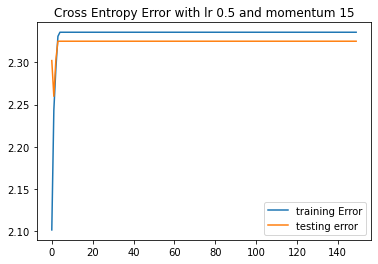

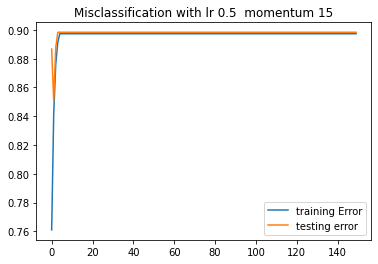

Test Miscalssification is 0.8984


In [21]:

import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(66)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)
 
# Building Our Mode
class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100, 10)
        
    # Forward Pass
    def forward(self, x):
        x = x.view(x.shape[0],-1)    # Flatten the images
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc2(x)
        return x
 
model_200 = Network()
if torch.cuda.is_available():
    model_200 = model_200.cuda()
 
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_200.parameters(), lr = 0.5,momentum=0.9)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li_5=[]
val_loss_li_5=[]
misclass_train_li_5=[]
misclass_valid_li_5=[]
 
for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model_200(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li_5.append(train_loss / len(trainloader))
    misclass_train_li_5.append(mis_accuracy)
    
    
    
        
        
        
    
   
    # Validation error
    valid_loss = 0.0
    #model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model_200(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li_5.append(valid_loss / len(validloader))

    correct_count, all_count = 0, 0
    for images,labels in validloader:
      for i in range(len(labels)):
        img = images[i].view(1, 784).to(device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
        
        #img = images[i].view(shape=(, 784))
        with torch.no_grad():
          logps = model_200(img)
          #.cuda

    
        ps = torch.exp(logps)
        probab = list(ps.cpu().numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1
    valid_misclassify=1-correct_count/all_count
    misclass_valid_li_5.append(valid_misclassify)
    



    print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
    print("\nModel train Misclassification =", mis_accuracy)
    print("\nModel valid Misclassification =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model_200.state_dict(), '/content/drive/MyDrive/saved_model_lr_full=0.5_momentum_0.9.pth')

# Cross validation
import matplotlib.pyplot as plt
plt.plot(train_loss_li_5,label="training Error")
plt.plot(val_loss_li_5,label="testing error")
plt.title("Cross Entropy Error with lr 0.5 and momentum {}".format(i))
plt.legend()
plt.show()

  #Misaccuracy
import matplotlib.pyplot as plt
plt.plot( misclass_train_li_5,label="training Error")
plt.plot(misclass_valid_li_5,label="testing error")
plt.title("Misclassification with lr 0.5  momentum {}".format(i))
plt.legend()
plt.show()
print("Test Miscalssification is",valid_misclassify)



We will hence select the Model with LR=0.2 and Momentum 0, It has a validation Cross entropy error of 0.11068924103044785 and misclassification error of 0.02080000000000004 . This was the model that gave the lowest test misclassification error

# QUESTION 4

# Random seed 1

Epoch 25 		 Training Loss: 0.00026920877908665234 		 Validation Loss: 0.08545348778271675

Model train Accuracy = 0.0

Model valid Accuracy = 0.015199999999999991
Epoch 50 		 Training Loss: 8.467626526690856e-05 		 Validation Loss: 0.0938897398787737

Model train Accuracy = 0.0

Model valid Accuracy = 0.01529999999999998
Epoch 75 		 Training Loss: 4.842646343058115e-05 		 Validation Loss: 0.09847925375594412

Model train Accuracy = 0.0

Model valid Accuracy = 0.015199999999999991
Epoch 100 		 Training Loss: 3.32361509227149e-05 		 Validation Loss: 0.10180664604344493

Model train Accuracy = 0.0

Model valid Accuracy = 0.01539999999999997
Epoch 125 		 Training Loss: 2.503721367997915e-05 		 Validation Loss: 0.10439426748640938

Model train Accuracy = 0.0

Model valid Accuracy = 0.015599999999999947
Epoch 150 		 Training Loss: 1.995312300317693e-05 		 Validation Loss: 0.10651211529693136

Model train Accuracy = 0.0

Model valid Accuracy = 0.015599999999999947


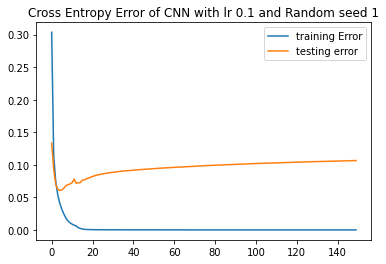

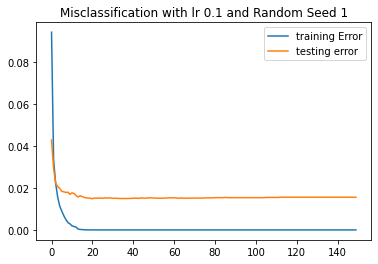

Final_valid_accuracy is 0.015599999999999947


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(1)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)
 
# Building Our Model
class Network(nn.Module):
    # Declaring the Architecture
    #Initialization
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1) #First C
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(8*14*14, 100)
        self.fc2 = nn.Linear(100, 10)
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        x=self.fc1(x)
        x=self.relu(x)
        x=self.fc2(x)
        return x
        
 
model = Network()
if torch.cuda.is_available():
    model = model.cuda()
 
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_valid_li=[]
 
for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(trainloader))
    misclass_train_li.append(mis_accuracy)
    
   
       
   
    # Validation error
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(validloader))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in validloader:
            images, labels = images.cuda(), labels.cuda()
            #print(model(images))
            #test_output, last_layer
            test_output = model(images)
            _,pred_y = torch.max(test_output.data, 1)
            total+=labels.size(0)
            correct += (pred_y == labels).sum().item()
    accuracy = correct / total        

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    valid_misclassify=1- accuracy
    #correct_count/all_count
    misclass_valid_li.append(valid_misclassify)



    


    if (e+1) % 25 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_cnn_bef_full=0.1_rs_1.pth')


# Cross validation Plot
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="training Error")
plt.plot(val_loss_li,label="testing error")
plt.title("Cross Entropy Error of CNN with lr 0.1 and Random seed 1")
plt.legend()
plt.show()

#Misaccuracy Plot
import matplotlib.pyplot as plt
plt.plot( misclass_train_li,label="training Error")
plt.plot(misclass_valid_li,label="testing error")
plt.title("Misclassification with lr 0.1 and Random Seed 1")
plt.legend()
plt.show()
print("Final_valid_accuracy is",valid_misclassify)

## RANDOM SEED 66

Epoch 25 		 Training Loss: 0.00022419128071597555 		 Validation Loss: 0.07357962550558576

Model train Accuracy = 0.0

Model valid Accuracy = 0.014900000000000024
Epoch 50 		 Training Loss: 7.457419358833932e-05 		 Validation Loss: 0.08055747678223005

Model train Accuracy = 0.0

Model valid Accuracy = 0.014900000000000024
Epoch 75 		 Training Loss: 4.378481274046376e-05 		 Validation Loss: 0.08477964883685181

Model train Accuracy = 0.0

Model valid Accuracy = 0.015000000000000013
Epoch 100 		 Training Loss: 3.05971692494965e-05 		 Validation Loss: 0.0877620164991968

Model train Accuracy = 0.0

Model valid Accuracy = 0.015100000000000002
Epoch 125 		 Training Loss: 2.334777124987789e-05 		 Validation Loss: 0.0900515385801596

Model train Accuracy = 0.0

Model valid Accuracy = 0.015000000000000013
Epoch 150 		 Training Loss: 1.8774394787106465e-05 		 Validation Loss: 0.0919277858561472

Model train Accuracy = 0.0

Model valid Accuracy = 0.01529999999999998


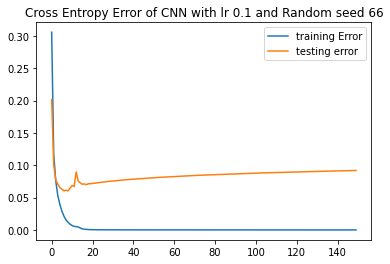

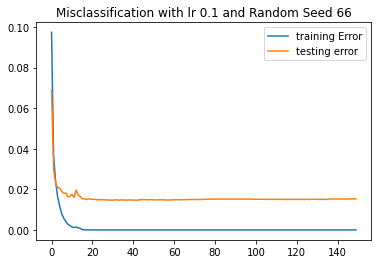

Final_valid_accuracy is 0.01529999999999998


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
import random

random.seed(66)  #change
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)
 
# Building Our Mode
class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(8*14*14, 100)
        self.fc2 = nn.Linear(100, 10)
        
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        x=self.fc1(x)
        x=self.relu(x)
       
        x=self.fc2(x)
        return x

 
model = Network()
if torch.cuda.is_available():
    model = model.cuda()
 
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_valid_li=[]
 
for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(trainloader))
    misclass_train_li.append(mis_accuracy)
    
    
   
        
        
   
        
   
    # Validation error
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(validloader))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in validloader:
            images, labels = images.cuda(), labels.cuda()
            #print(model(images))
            #test_output, last_layer
            test_output = model(images)
            _,pred_y = torch.max(test_output.data, 1)
            total+=labels.size(0)
            correct += (pred_y == labels).sum().item()
    accuracy = correct / total        

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    valid_misclassify=1- accuracy
    #correct_count/all_count
    misclass_valid_li.append(valid_misclassify)



    


    if (e+1) % 25 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_cnn_bef_full=0.1_rs_66.pth')  # change


# Cross validation Plot
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="training Error")
plt.plot(val_loss_li,label="testing error")
plt.title("Cross Entropy Error of CNN with lr 0.1 and Random seed 66")  # change
plt.legend()
plt.show()

#Misaccuracy Plot
import matplotlib.pyplot as plt
plt.plot( misclass_train_li,label="training Error")
plt.plot(misclass_valid_li,label="testing error")
plt.title("Misclassification with lr 0.1 and Random Seed 66")  # change
plt.legend()
plt.show()
print("Final_valid_accuracy is",valid_misclassify)

## RANDOM SEED 88

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

Epoch 25 		 Training Loss: 0.00028709221872492047 		 Validation Loss: 0.07471792672890534

Model train Accuracy = 0.0

Model valid Accuracy = 0.013499999999999956
Epoch 50 		 Training Loss: 8.594402673107703e-05 		 Validation Loss: 0.08153959339051575

Model train Accuracy = 0.0

Model valid Accuracy = 0.0131
Epoch 75 		 Training Loss: 4.893050478474992e-05 		 Validation Loss: 0.08489711281024653

Model train Accuracy = 0.0

Model valid Accuracy = 0.01319999999999999
Epoch 100 		 Training Loss: 3.3621197176703054e-05 		 Validation Loss: 0.08743105632954258

Model train Accuracy = 0.0

Model valid Accuracy = 0.01319999999999999
Epoch 125 		 Training Loss: 2.5344069454752225e-05 		 Validation Loss: 0.0894590587163842

Model train Accuracy = 0.0

Model valid Accuracy = 0.013399999999999967
Epoch 150 		 Training Loss: 2.0207677073579574e-05 		 Validation Loss: 0.09115387806471703

Model train Accuracy = 0.0

Model valid Accuracy 

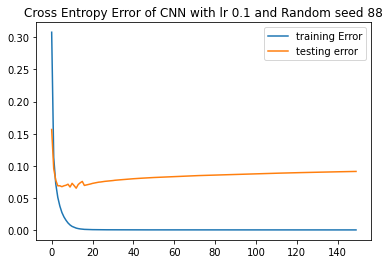

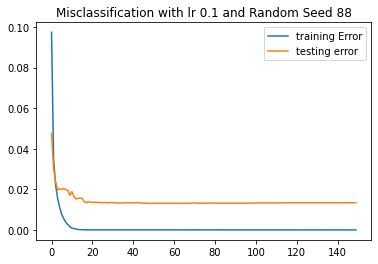

Final_valid_accuracy is 0.013399999999999967


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(88)  #  changed
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)
 
# Building Our Mode
class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(8*14*14, 100)
        self.fc2 = nn.Linear(100, 10)
        
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        x=self.fc1(x)
        x=self.relu(x)
       
        x=self.fc2(x)
        return x


       
        
 
model = Network()
if torch.cuda.is_available():
    model = model.cuda()
 
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_valid_li=[]
 
for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

       

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(trainloader))
    misclass_train_li.append(mis_accuracy)
    
    
    
   
    # Validation error
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(validloader))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in validloader:
            images, labels = images.cuda(), labels.cuda()
            #print(model(images))
            #test_output, last_layer
            test_output = model(images)
            _,pred_y = torch.max(test_output.data, 1)
            total+=labels.size(0)
            correct += (pred_y == labels).sum().item()
    accuracy = correct / total        

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    valid_misclassify=1- accuracy
    #correct_count/all_count
    misclass_valid_li.append(valid_misclassify)



    


    if (e+1) % 25 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_cnn_bef_full=0.1_rs_88.pth')  #changed


# Cross validation Plot
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="training Error")
plt.plot(val_loss_li,label="testing error")
plt.title("Cross Entropy Error of CNN with lr 0.1 and Random seed 88") #changed
plt.legend()
plt.show()

#Misaccuracy Plot
import matplotlib.pyplot as plt
plt.plot( misclass_train_li,label="training Error")
plt.plot(misclass_valid_li,label="testing error")
plt.title("Misclassification with lr 0.1 and Random Seed 88") #changed
plt.legend()
plt.show()
print("Final_valid_accuracy is",valid_misclassify)

Final_valid_accuracy is 0.013399999999999967

## Random Seed 100

Epoch 25 		 Training Loss: 0.00028693146894963757 		 Validation Loss: 0.08408955142630557

Model train Accuracy = 0.0

Model valid Accuracy = 0.014700000000000046
Epoch 50 		 Training Loss: 7.19015660418643e-05 		 Validation Loss: 0.09457139771099984

Model train Accuracy = 0.0

Model valid Accuracy = 0.015199999999999991
Epoch 75 		 Training Loss: 4.1449401479893055e-05 		 Validation Loss: 0.09973890910904444

Model train Accuracy = 0.0

Model valid Accuracy = 0.015199999999999991
Epoch 100 		 Training Loss: 2.8957396811524205e-05 		 Validation Loss: 0.10320315127305447

Model train Accuracy = 0.0

Model valid Accuracy = 0.01539999999999997
Epoch 125 		 Training Loss: 2.215700795930863e-05 		 Validation Loss: 0.10581803531720091

Model train Accuracy = 0.0

Model valid Accuracy = 0.015499999999999958
Epoch 150 		 Training Loss: 1.7887051364824673e-05 		 Validation Loss: 0.10793830492927185

Model train Accuracy = 0.0

Model valid Accuracy = 0.01539999999999997


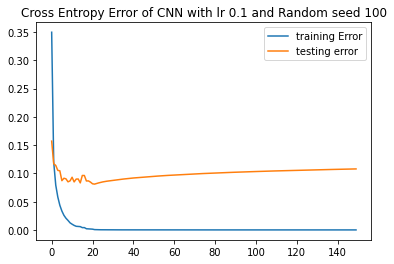

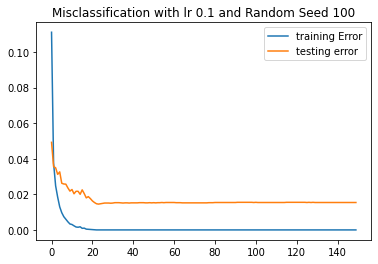

Final_valid_accuracy is 0.01539999999999997


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
import random

random.seed(100)  #change
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)
 
# Building Our Mode
class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(8*14*14, 100)
        self.fc2 = nn.Linear(100, 10)
        
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        x=self.fc1(x)
        x=self.relu(x)
       
        x=self.fc2(x)
        return x

 
model = Network()
if torch.cuda.is_available():
    model = model.cuda()
 
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_valid_li=[]
 
for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(trainloader))
    misclass_train_li.append(mis_accuracy)
    
    
   
        
        
   
        
   
    # Validation error
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(validloader))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in validloader:
            images, labels = images.cuda(), labels.cuda()
            #print(model(images))
            #test_output, last_layer
            test_output = model(images)
            _,pred_y = torch.max(test_output.data, 1)
            total+=labels.size(0)
            correct += (pred_y == labels).sum().item()
    accuracy = correct / total        

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    valid_misclassify=1- accuracy
    #correct_count/all_count
    misclass_valid_li.append(valid_misclassify)



    


    if (e+1) % 25 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_cnn_bef_full=0.1_rs_100.pth')  # change


# Cross validation Plot
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="training Error")
plt.plot(val_loss_li,label="testing error")
plt.title("Cross Entropy Error of CNN with lr 0.1 and Random seed 100")  # change
plt.legend()
plt.show()

#Misaccuracy Plot
import matplotlib.pyplot as plt
plt.plot( misclass_train_li,label="training Error")
plt.plot(misclass_valid_li,label="testing error")
plt.title("Misclassification with lr 0.1 and Random Seed 100")  # change
plt.legend()
plt.show()
print("Final_valid_accuracy is",valid_misclassify)

Final_valid_accuracy is 0.01539999999999997

# RS 200

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

Epoch 25 		 Training Loss: 0.00025893538219099767 		 Validation Loss: 0.07346374184314812

Model train Accuracy = 0.0

Model valid Accuracy = 0.01429999999999998
Epoch 50 		 Training Loss: 8.193665023603195e-05 		 Validation Loss: 0.08195256085995815

Model train Accuracy = 0.0

Model valid Accuracy = 0.01419999999999999
Epoch 75 		 Training Loss: 4.733544153135739e-05 		 Validation Loss: 0.08619115702179234

Model train Accuracy = 0.0

Model valid Accuracy = 0.014399999999999968
Epoch 100 		 Training Loss: 3.27989041433426e-05 		 Validation Loss: 0.08905293614435117

Model train Accuracy = 0.0

Model valid Accuracy = 0.014399999999999968
Epoch 125 		 Training Loss: 2.4912225251966637e-05 		 Validation Loss: 0.0912310263334578

Model train Accuracy = 0.0

Model valid Accuracy = 0.01419999999999999
Epoch 150 		 Training Loss: 1.9974257278572282e-05 		 Validation Loss: 0.0929961737714039

Model train Accuracy = 0.0

Model valid

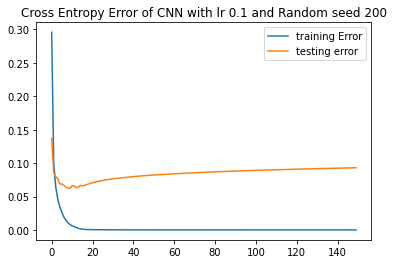

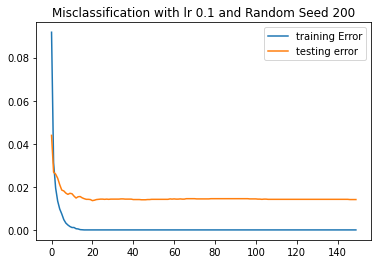

Final_valid_accuracy is 0.014100000000000001


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
import random

random.seed(200)  #change
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)
 
# Building Our Mode
class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(8*14*14, 100)
        self.fc2 = nn.Linear(100, 10)
        
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        x=self.fc1(x)
        x=self.relu(x)
       
        x=self.fc2(x)
        return x

 
model = Network()
if torch.cuda.is_available():
    model = model.cuda()
 
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_valid_li=[]
 
for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(trainloader))
    misclass_train_li.append(mis_accuracy)
    
    
   
        
        
   
        
   
    # Validation error
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(validloader))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in validloader:
            images, labels = images.cuda(), labels.cuda()
            #print(model(images))
            #test_output, last_layer
            test_output = model(images)
            _,pred_y = torch.max(test_output.data, 1)
            total+=labels.size(0)
            correct += (pred_y == labels).sum().item()
    accuracy = correct / total        

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    valid_misclassify=1- accuracy
    #correct_count/all_count
    misclass_valid_li.append(valid_misclassify)




    if (e+1) % 25 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_cnn_bef_full=0.1_rs_200.pth')  # change


# Cross validation Plot
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="training Error")
plt.plot(val_loss_li,label="testing error")
plt.title("Cross Entropy Error of CNN with lr 0.1 and Random seed 200")  # change
plt.legend()
plt.show()

#Misaccuracy Plot
import matplotlib.pyplot as plt
plt.plot( misclass_train_li,label="training Error")
plt.plot(misclass_valid_li,label="testing error")
plt.title("Misclassification with lr 0.1 and Random Seed 200")  # change
plt.legend()
plt.show()
print("Final_valid_accuracy is",valid_misclassify)

Final_valid_accuracy is 0.014100000000000001

At random seed 88 , this model gives the best answer with a test miclassification of test 0.013399999999999967. Hence we get an accuracy of 0.987 which is pretty high

# PART C 

In [8]:
model_new_cnn0 = Network()
model_new_cnn0.load_state_dict(torch.load('/content/drive/MyDrive/saved_model_cnn_full=0.1_rs_88.pth'))




<All keys matched successfully>

In [10]:
print(model_new_cnn0)

Network(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1568, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (drop): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
)


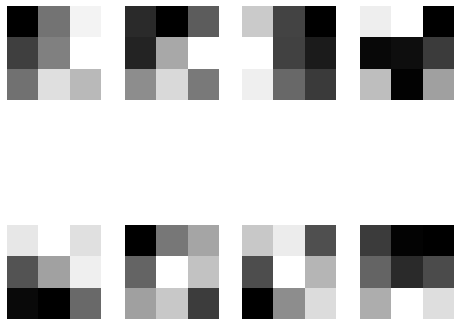

In [9]:
import matplotlib.pyplot as plt

params2 = list(model_new_cnn0.parameters())[0]
plt.figure(figsize=(8, 8))
for i in range(params2.shape[0]):
    plt.subplot(2,4,i + 1) # Since we know it is a 10 x 10 grid
    x = params2[i,:].detach().numpy()
    plt.imshow(x.reshape((3, 3)), cmap = "gray", interpolation = "nearest")
    plt.axis("off")
plt.subplots_adjust(wspace=0.25, hspace=0.01)

# Part D

# Learning rate is 0.01

learning rate is 0.01 and momentum 0
Epoch 25 		 Training Loss: 0.03536227225248987 		 Validation Loss: 0.0795972344650405

Model train Accuracy = 0.009719999999999951

Model valid Accuracy = 0.024700000000000055
Epoch 50 		 Training Loss: 0.010034768434409147 		 Validation Loss: 0.08459191065407948

Model train Accuracy = 0.0013999999999999568

Model valid Accuracy = 0.022800000000000042
Epoch 75 		 Training Loss: 0.0032478283298237767 		 Validation Loss: 0.09182237828121544

Model train Accuracy = 0.00017999999999995797

Model valid Accuracy = 0.02080000000000004
Epoch 100 		 Training Loss: 0.0015106055945172106 		 Validation Loss: 0.09622485810089997

Model train Accuracy = 2.0000000000020002e-05

Model valid Accuracy = 0.02059999999999995
Epoch 125 		 Training Loss: 0.0009222622775127138 		 Validation Loss: 0.10031578648586843

Model train Accuracy = 0.0

Model valid Accuracy = 0.020100000000000007
Epoch 150 		 Training Loss: 0.0006408033820785491 		 Validation Loss: 0.103033759526

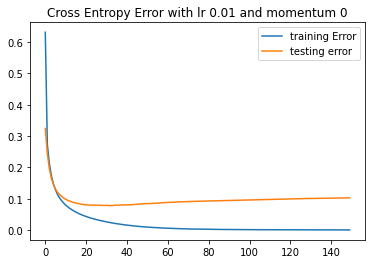

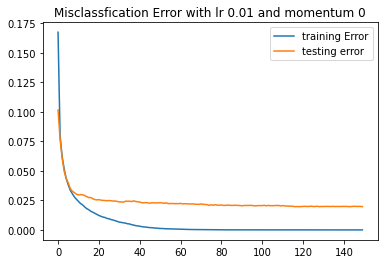

Final_valid_accuracy is 0.01970000000000005
learning rate is 0.01 and momentum 0.5
Epoch 25 		 Training Loss: 0.017399216477866398 		 Validation Loss: 0.09217672335121467

Model train Accuracy = 0.0042200000000000015

Model valid Accuracy = 0.02400000000000002
Epoch 50 		 Training Loss: 0.0023914185407213438 		 Validation Loss: 0.10540565128501596

Model train Accuracy = 0.00012000000000000899

Model valid Accuracy = 0.02300000000000002
Epoch 75 		 Training Loss: 0.0007580254045506944 		 Validation Loss: 0.10844795548435601

Model train Accuracy = 0.0

Model valid Accuracy = 0.02070000000000005
Epoch 100 		 Training Loss: 0.00040586528497532973 		 Validation Loss: 0.11218141691468324

Model train Accuracy = 0.0

Model valid Accuracy = 0.01990000000000003
Epoch 125 		 Training Loss: 0.00026644264195958123 		 Validation Loss: 0.11559030083311443

Model train Accuracy = 0.0

Model valid Accuracy = 0.020100000000000007
Epoch 150 		 Training Loss: 0.0001952669588016922 		 Validation Loss: 0

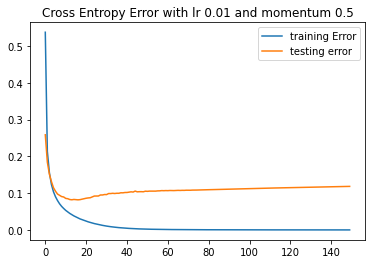

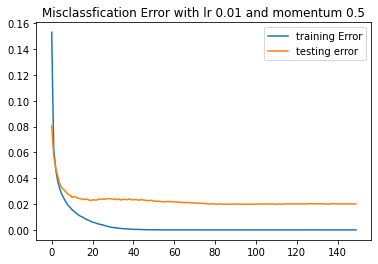

Final_valid_accuracy is 0.020100000000000007
learning rate is 0.01 and momentum 0.9
Epoch 25 		 Training Loss: 0.0003175702244433345 		 Validation Loss: 0.07645571012977044

Model train Accuracy = 0.0

Model valid Accuracy = 0.015599999999999947
Epoch 50 		 Training Loss: 8.001902730833248e-05 		 Validation Loss: 0.08650765881609966

Model train Accuracy = 0.0

Model valid Accuracy = 0.015700000000000047
Epoch 75 		 Training Loss: 4.511484317296488e-05 		 Validation Loss: 0.09197632235834319

Model train Accuracy = 0.0

Model valid Accuracy = 0.015900000000000025
Epoch 100 		 Training Loss: 3.112717601367164e-05 		 Validation Loss: 0.09553151342316908

Model train Accuracy = 0.0

Model valid Accuracy = 0.015900000000000025
Epoch 125 		 Training Loss: 2.3638290787284483e-05 		 Validation Loss: 0.09834721792970075

Model train Accuracy = 0.0

Model valid Accuracy = 0.015800000000000036
Epoch 150 		 Training Loss: 1.895077524790829e-05 		 Validation Loss: 0.10057895236961238

Model train 

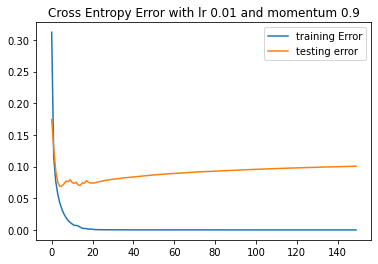

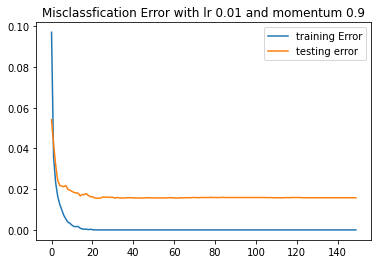

Final_valid_accuracy is 0.015800000000000036


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random


random.seed(88)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)


for i in [0,0.5,0.9]:
  print("learning rate is 0.01 and momentum {}".format(i))
# Building Our Mode
  class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(8*14*14, 100)
        self.fc2 = nn.Linear(100, 10)
       
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        x=self.fc1(x)
        x=self.relu(x)
      
        x=self.fc2(x)
        return x


        #x = x.view(x.shape[0],-1)    # Flatten the images
        #x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = self.fc2(x)
        
 
  model = Network()
  if torch.cuda.is_available():
    model = model.cuda()
 
# Declaring Criterion and Optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = 0.01,momentum=i)
 
# Training with Validation
  epochs = 150
  min_valid_loss = np.inf
  train_loss_li=[]
  val_loss_li=[]
  misclass_train_li=[]
  misclass_valid_li=[]
 
  for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(trainloader))
    misclass_train_li.append(mis_accuracy)
    
    
    #len(trainset)
    # trainset, not train_loader
    # probably x in your case

    #print("Accuracy = {}".format(accuracy))
        
        
        
        
   
   
    # Validation error
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(validloader))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in validloader:
            images, labels = images.cuda(), labels.cuda()
            #print(model(images))
            #test_output, last_layer
            test_output = model(images)
            _,pred_y = torch.max(test_output.data, 1)
            total+=labels.size(0)
            correct += (pred_y == labels).sum().item()
    accuracy = correct / total        

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    valid_misclassify=1- accuracy
    #correct_count/all_count
    misclass_valid_li.append(valid_misclassify)


      
    


    if (e+1) % 25 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    #torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_cnn_full=0.01_.pth')
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_bef_cnn_full=0.01_momentum_{}.pth'.format(i))


# Cross validation Plot
  import matplotlib.pyplot as plt
  plt.plot(train_loss_li,label="training Error")
  plt.plot(val_loss_li,label="testing error")
  plt.title("Cross Entropy Error with lr 0.01 and momentum {}".format(i))
  plt.legend()
  plt.show()

  #Misaccuracy Plot
  import matplotlib.pyplot as plt
  plt.plot( misclass_train_li,label="training Error")
  plt.plot(misclass_valid_li,label="testing error")
  plt.title("Misclassfication Error with lr 0.01 and momentum {}".format(i))
  
  plt.legend()
  plt.show()
  print("Final_valid_accuracy is",valid_misclassify)


  


# Learning rate 0.1

learning rate is 0.1 and momentum 0
Epoch 25 		 Training Loss: 0.0002632634888438189 		 Validation Loss: 0.08826705007776002

Model train Accuracy = 0.0

Model valid Accuracy = 0.016199999999999992
Epoch 50 		 Training Loss: 7.809052744110538e-05 		 Validation Loss: 0.09729823826096201

Model train Accuracy = 0.0

Model valid Accuracy = 0.01629999999999998
Epoch 75 		 Training Loss: 4.488648097596799e-05 		 Validation Loss: 0.10231504741259174

Model train Accuracy = 0.0

Model valid Accuracy = 0.01629999999999998
Epoch 100 		 Training Loss: 3.112766501983073e-05 		 Validation Loss: 0.10586592657143917

Model train Accuracy = 0.0

Model valid Accuracy = 0.01639999999999997
Epoch 125 		 Training Loss: 2.3669150731463986e-05 		 Validation Loss: 0.10856016685513556

Model train Accuracy = 0.0

Model valid Accuracy = 0.01639999999999997
Epoch 150 		 Training Loss: 1.9009344880976435e-05 		 Validation Loss: 0.11073513432879317

Model train Accuracy = 0.0

Model valid Accuracy = 0.0164999999

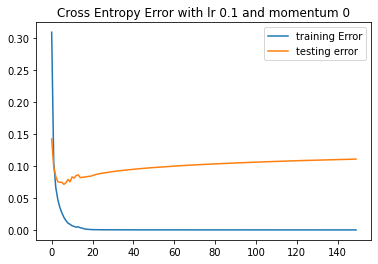

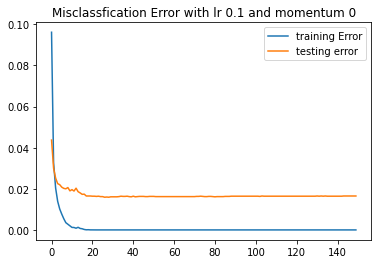

Final_valid_accuracy is 0.01649999999999996
learning rate is 0.1 and momentum 0.5
Epoch 25 		 Training Loss: 6.798175960590817e-05 		 Validation Loss: 0.09980111374703007

Model train Accuracy = 0.0

Model valid Accuracy = 0.015499999999999958
Epoch 50 		 Training Loss: 2.6398882399897078e-05 		 Validation Loss: 0.10817672406567433

Model train Accuracy = 0.0

Model valid Accuracy = 0.015499999999999958
Epoch 75 		 Training Loss: 1.6426452399534414e-05 		 Validation Loss: 0.11260999618502532

Model train Accuracy = 0.0

Model valid Accuracy = 0.01539999999999997
Epoch 100 		 Training Loss: 1.1898641923897296e-05 		 Validation Loss: 0.11582447736921662

Model train Accuracy = 0.0

Model valid Accuracy = 0.015499999999999958
Epoch 125 		 Training Loss: 9.307854278949727e-06 		 Validation Loss: 0.11829647223635956

Model train Accuracy = 0.0

Model valid Accuracy = 0.015599999999999947
Epoch 150 		 Training Loss: 7.626290088760189e-06 		 Validation Loss: 0.12035131436407052

Model train A

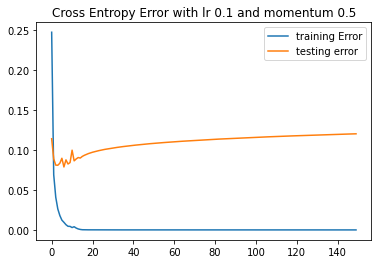

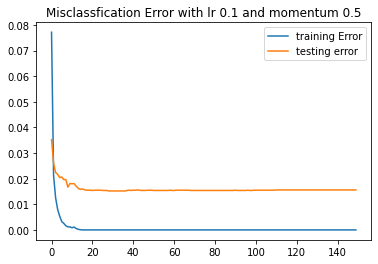

Final_valid_accuracy is 0.015599999999999947
learning rate is 0.1 and momentum 0.9
Epoch 25 		 Training Loss: 2.3087022388431406 		 Validation Loss: 2.3072426997053737

Model train Accuracy = 0.89686

Model valid Accuracy = 0.8986
Epoch 50 		 Training Loss: 2.3087022409786875 		 Validation Loss: 2.3072426014434035

Model train Accuracy = 0.89686

Model valid Accuracy = 0.8986
Epoch 75 		 Training Loss: 2.308702239148219 		 Validation Loss: 2.3072426997053737

Model train Accuracy = 0.89686

Model valid Accuracy = 0.8986
Epoch 100 		 Training Loss: 2.308702234419507 		 Validation Loss: 2.307242810916596

Model train Accuracy = 0.89686

Model valid Accuracy = 0.8986
Epoch 125 		 Training Loss: 2.3087022420464614 		 Validation Loss: 2.3072426014434035

Model train Accuracy = 0.89686

Model valid Accuracy = 0.8986
Epoch 150 		 Training Loss: 2.3087022386906013 		 Validation Loss: 2.307242810916596

Model train Accuracy = 0.89686

Model valid Accuracy = 0.8986


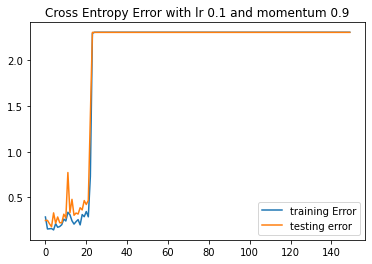

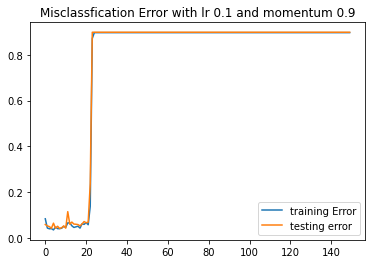

Final_valid_accuracy is 0.8986


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(88)  #changed
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)


for i in [0,0.5,0.9]:
  print("learning rate is 0.1 and momentum {}".format(i))
# Building Our Mode
  class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(8*14*14, 100)
        self.fc2 = nn.Linear(100, 10)
        
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        x=self.fc1(x)
        x=self.relu(x)
        x=self.fc2(x)#remove
        return x


        #x = x.view(x.shape[0],-1)    # Flatten the images
        #x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = self.fc2(x)
        
 
  model = Network()
  if torch.cuda.is_available():
    model = model.cuda()
 
# Declaring Criterion and Optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = 0.1,momentum=i)
 
# Training with Validation
  epochs = 150
  min_valid_loss = np.inf
  train_loss_li=[]
  val_loss_li=[]
  misclass_train_li=[]
  misclass_valid_li=[]
 
  for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(trainloader))
    misclass_train_li.append(mis_accuracy)
    
    
    #len(trainset)
    # trainset, not train_loader
    # probably x in your case

    #print("Accuracy = {}".format(accuracy))
        
        
        
        
   
   
    # Validation error
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(validloader))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in validloader:
            images, labels = images.cuda(), labels.cuda()
            #print(model(images))
            #test_output, last_layer
            test_output = model(images)
            _,pred_y = torch.max(test_output.data, 1)
            total+=labels.size(0)
            correct += (pred_y == labels).sum().item()
    accuracy = correct / total        

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    valid_misclassify=1- accuracy
    #correct_count/all_count
    misclass_valid_li.append(valid_misclassify)


    


    if (e+1) % 25 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    #torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_cnn_full=0.01_.pth')
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_bef_cnn_full=0.1_momentum_{}.pth'.format(i)) #changed


# Cross validation Plot
  import matplotlib.pyplot as plt
  plt.plot(train_loss_li,label="training Error")
  plt.plot(val_loss_li,label="testing error")
  plt.title("Cross Entropy Error with lr 0.1 and momentum {}".format(i))
  plt.legend()
  plt.show()

  #Misaccuracy Plot
  import matplotlib.pyplot as plt
  plt.plot( misclass_train_li,label="training Error")
  plt.plot(misclass_valid_li,label="testing error")
  plt.title("Misclassfication Error with lr 0.1 and momentum {}".format(i))
  
  plt.legend()
  plt.show()
  print("Final_valid_accuracy is",valid_misclassify)


  


# LEARNING RATE 0.2

learning rate is 0.2 and momentum 0
Epoch 25 		 Training Loss: 7.427638055469255e-05 		 Validation Loss: 0.08906805349300755

Model train Accuracy = 0.0

Model valid Accuracy = 0.013499999999999956
Epoch 50 		 Training Loss: 2.915583585097351e-05 		 Validation Loss: 0.09612497500741282

Model train Accuracy = 0.0

Model valid Accuracy = 0.013399999999999967
Epoch 75 		 Training Loss: 1.806876826883989e-05 		 Validation Loss: 0.10011248603548435

Model train Accuracy = 0.0

Model valid Accuracy = 0.013299999999999979
Epoch 100 		 Training Loss: 1.298630657666638e-05 		 Validation Loss: 0.10295299781522174

Model train Accuracy = 0.0

Model valid Accuracy = 0.013299999999999979
Epoch 125 		 Training Loss: 1.0099306470762284e-05 		 Validation Loss: 0.10516510127067717

Model train Accuracy = 0.0

Model valid Accuracy = 0.013399999999999967
Epoch 150 		 Training Loss: 8.234959201972216e-06 		 Validation Loss: 0.10695706154335075

Model train Accuracy = 0.0

Model valid Accuracy = 0.0133999

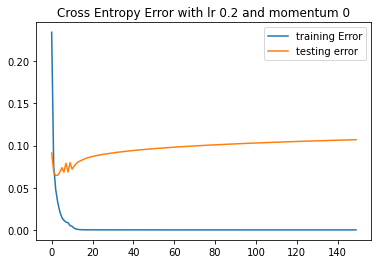

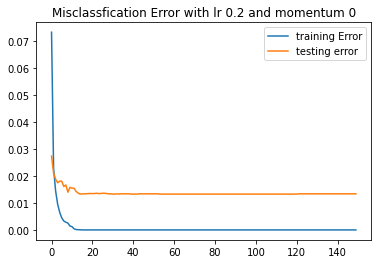

Final_valid_accuracy is 0.013399999999999967
learning rate is 0.2 and momentum 0.5
Epoch 25 		 Training Loss: 0.00858333597820596 		 Validation Loss: 0.12406327846479945

Model train Accuracy = 0.0022999999999999687

Model valid Accuracy = 0.017199999999999993
Epoch 50 		 Training Loss: 0.03377275962034165 		 Validation Loss: 0.34174337071497113

Model train Accuracy = 0.0050200000000000244

Model valid Accuracy = 0.01980000000000004
Epoch 75 		 Training Loss: 0.5703073298046538 		 Validation Loss: 1.4445862744808906

Model train Accuracy = 0.02729999999999999

Model valid Accuracy = 0.040000000000000036
Epoch 100 		 Training Loss: 0.5123000952110665 		 Validation Loss: 2.3362524180075734

Model train Accuracy = 0.05576000000000003

Model valid Accuracy = 0.05510000000000004
Epoch 125 		 Training Loss: 2.3039336816210514 		 Validation Loss: 2.30694989198313

Model train Accuracy = 0.89264

Model valid Accuracy = 0.8951
Epoch 150 		 Training Loss: 2.3039336816210514 		 Validation Loss: 

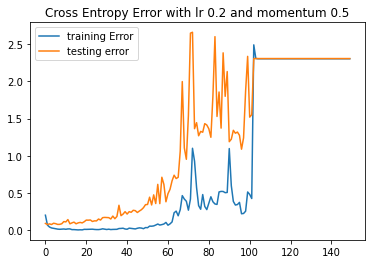

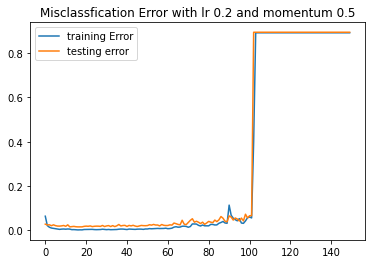

Final_valid_accuracy is 0.8951
learning rate is 0.2 and momentum 0.9
Epoch 25 		 Training Loss: 2.3148364856009747 		 Validation Loss: 2.3130726623839846

Model train Accuracy = 0.89808

Model valid Accuracy = 0.8951
Epoch 50 		 Training Loss: 2.3148364909398427 		 Validation Loss: 2.313072681427002

Model train Accuracy = 0.89808

Model valid Accuracy = 0.8951
Epoch 75 		 Training Loss: 2.3148364878890613 		 Validation Loss: 2.313072681427002

Model train Accuracy = 0.89808

Model valid Accuracy = 0.8951
Epoch 100 		 Training Loss: 2.3148364898720692 		 Validation Loss: 2.3130726623839846

Model train Accuracy = 0.89808

Model valid Accuracy = 0.8951
Epoch 125 		 Training Loss: 2.314836490482225 		 Validation Loss: 2.313072681427002

Model train Accuracy = 0.89808

Model valid Accuracy = 0.8951
Epoch 150 		 Training Loss: 2.3148364913974597 		 Validation Loss: 2.3130726623839846

Model train Accuracy = 0.89808

Model valid Accuracy = 0.8951


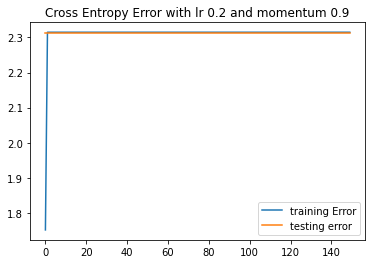

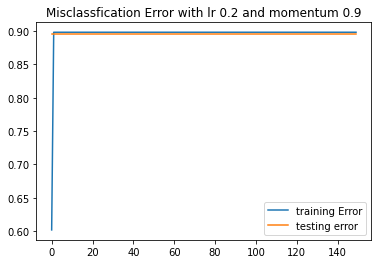

Final_valid_accuracy is 0.8951


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(88)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)


for i in [0,0.5,0.9]:
  print("learning rate is 0.2 and momentum {}".format(i))
# Building Our Mode
  class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(8*14*14, 100)
        self.fc2 = nn.Linear(100, 10)
        
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        x=self.fc1(x)
        x=self.relu(x)
        
        x=self.fc2(x)
        return x


        #x = x.view(x.shape[0],-1)    # Flatten the images
        #x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = self.fc2(x)
        
 
  model = Network()
  if torch.cuda.is_available():
    model = model.cuda()
 
# Declaring Criterion and Optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = 0.2,momentum=i)
 
# Training with Validation
  epochs = 150
  min_valid_loss = np.inf
  train_loss_li=[]
  val_loss_li=[]
  misclass_train_li=[]
  misclass_valid_li=[]
 
  for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(trainloader))
    misclass_train_li.append(mis_accuracy)
    
    
    #len(trainset)
    # trainset, not train_loader
    # probably x in your case

    #print("Accuracy = {}".format(accuracy))
        
        
        
        
   
   
    # Validation error
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(validloader))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in validloader:
            images, labels = images.cuda(), labels.cuda()
            #print(model(images))
            #test_output, last_layer
            test_output = model(images)
            _,pred_y = torch.max(test_output.data, 1)
            total+=labels.size(0)
            correct += (pred_y == labels).sum().item()
    accuracy = correct / total        

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    valid_misclassify=1- accuracy
    #correct_count/all_count
    misclass_valid_li.append(valid_misclassify)


    
    


    if (e+1) % 25 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
  
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_bef_cnn_full=0.2_momentum_{}.pth'.format(i))


# Cross validation Plot
  import matplotlib.pyplot as plt
  plt.plot(train_loss_li,label="training Error")
  plt.plot(val_loss_li,label="testing error")
  plt.title("Cross Entropy Error with lr 0.2 and momentum {}".format(i))
  plt.legend()
  plt.show()

  #Misaccuracy Plot
  import matplotlib.pyplot as plt
  plt.plot( misclass_train_li,label="training Error")
  plt.plot(misclass_valid_li,label="testing error")
  plt.title("Misclassfication Error with lr 0.2 and momentum {}".format(i))
  
  plt.legend()
  plt.show()
  print("Final_valid_accuracy is",valid_misclassify)


  


## LR 0.5

learning rate is 0.5 and momentum 0
Epoch 25 		 Training Loss: 0.1000368283579812 		 Validation Loss: 0.313844170196428

Model train Accuracy = 0.01429999999999998

Model valid Accuracy = 0.02849999999999997
Epoch 50 		 Training Loss: 0.24240960235517617 		 Validation Loss: 0.8992921932134064

Model train Accuracy = 0.02092000000000005

Model valid Accuracy = 0.03249999999999997
Epoch 75 		 Training Loss: 0.28487612997708484 		 Validation Loss: 1.215759299328143

Model train Accuracy = 0.04374

Model valid Accuracy = 0.052000000000000046
Epoch 100 		 Training Loss: 2.3048236701096467 		 Validation Loss: 2.305066560403988

Model train Accuracy = 0.8941

Model valid Accuracy = 0.9005
Epoch 125 		 Training Loss: 2.304823670414725 		 Validation Loss: 2.305066560403988

Model train Accuracy = 0.8941

Model valid Accuracy = 0.9005
Epoch 150 		 Training Loss: 2.304823670414725 		 Validation Loss: 2.305066560403988

Model train Accuracy = 0.8941

Model valid Accuracy = 0.9005


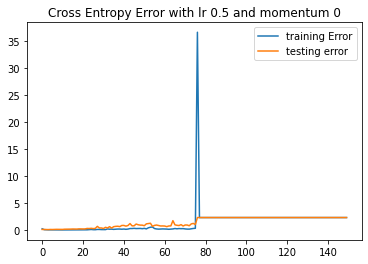

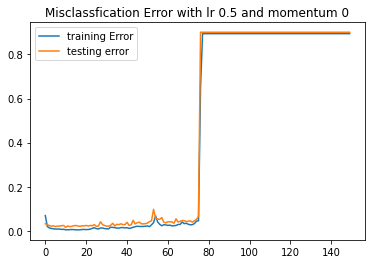

Final_valid_accuracy is 0.9005
learning rate is 0.5 and momentum 0.5
Epoch 25 		 Training Loss: 2.308405391695556 		 Validation Loss: 2.309103156050173

Model train Accuracy = 0.89284

Model valid Accuracy = 0.9005
Epoch 50 		 Training Loss: 2.308405393678564 		 Validation Loss: 2.309103205562019

Model train Accuracy = 0.89284

Model valid Accuracy = 0.9005
Epoch 75 		 Training Loss: 2.308405393678564 		 Validation Loss: 2.309103205562019

Model train Accuracy = 0.89284

Model valid Accuracy = 0.9005
Epoch 100 		 Training Loss: 2.308405392305712 		 Validation Loss: 2.309103156050173

Model train Accuracy = 0.89284

Model valid Accuracy = 0.9005
Epoch 125 		 Training Loss: 2.308405391390478 		 Validation Loss: 2.309103156050173

Model train Accuracy = 0.89284

Model valid Accuracy = 0.9005
Epoch 150 		 Training Loss: 2.3084053915430167 		 Validation Loss: 2.309103156050173

Model train Accuracy = 0.89284

Model valid Accuracy = 0.9005


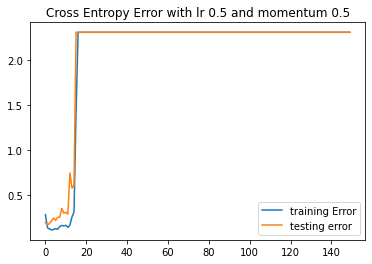

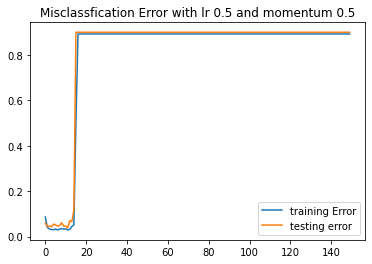

Final_valid_accuracy is 0.9005
learning rate is 0.5 and momentum 0.9
Epoch 25 		 Training Loss: 2.338134339735894 		 Validation Loss: 2.354736971017271

Model train Accuracy = 0.89884

Model valid Accuracy = 0.9005
Epoch 50 		 Training Loss: 2.338134341566363 		 Validation Loss: 2.354736983966523

Model train Accuracy = 0.89884

Model valid Accuracy = 0.9005
Epoch 75 		 Training Loss: 2.3381343382105033 		 Validation Loss: 2.3547369687321087

Model train Accuracy = 0.89884

Model valid Accuracy = 0.9005
Epoch 100 		 Training Loss: 2.3381343452273007 		 Validation Loss: 2.354736973302433

Model train Accuracy = 0.89884

Model valid Accuracy = 0.9005
Epoch 125 		 Training Loss: 2.338134338515581 		 Validation Loss: 2.354736955021136

Model train Accuracy = 0.89884

Model valid Accuracy = 0.9005
Epoch 150 		 Training Loss: 2.3381343412612847 		 Validation Loss: 2.3547369542594154

Model train Accuracy = 0.89884

Model valid Accuracy = 0.9005


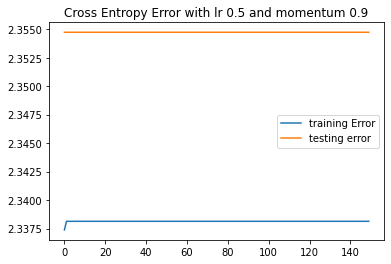

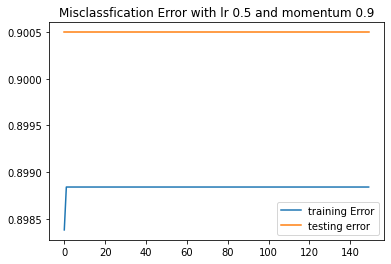

Final_valid_accuracy is 0.9005


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(88)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)


for i in [0,0.5,0.9]:
  print("learning rate is 0.5 and momentum {}".format(i))
# Building Our Mode
  class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(8*14*14, 100)
        self.fc2 = nn.Linear(100, 10)
        
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        x=self.fc1(x)
        x=self.relu(x)
        
        x=self.fc2(x)
        return x


        #x = x.view(x.shape[0],-1)    # Flatten the images
        #x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = self.fc2(x)
        
 
  model = Network()
  if torch.cuda.is_available():
    model = model.cuda()
 
# Declaring Criterion and Optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = 0.5,momentum=i)
 
# Training with Validation
  epochs = 150
  min_valid_loss = np.inf
  train_loss_li=[]
  val_loss_li=[]
  misclass_train_li=[]
  misclass_valid_li=[]
 
  for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(trainloader))
    misclass_train_li.append(mis_accuracy)
    
    
    #len(trainset)
    # trainset, not train_loader
    # probably x in your case

    #print("Accuracy = {}".format(accuracy))
        
        
        
        
   
   
    # Validation error
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(validloader))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in validloader:
            images, labels = images.cuda(), labels.cuda()
            #print(model(images))
            #test_output, last_layer
            test_output = model(images)
            _,pred_y = torch.max(test_output.data, 1)
            total+=labels.size(0)
            correct += (pred_y == labels).sum().item()
    accuracy = correct / total        

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    valid_misclassify=1- accuracy
    #correct_count/all_count
    misclass_valid_li.append(valid_misclassify)


      # correct_count, all_count = 0, 0
      # for images,labels in validloader:
      #   images, labels = images.cuda(), labels.cuda()
      #   for i in range(len(labels)):
      #       img=
            #img = images[i].view(1, 784).to(device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
        
   
    


    if (e+1) % 25 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    #torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_cnn_full=0.01_.pth')
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_bef_cnn_full=0.5_momentum_{}.pth'.format(i))


# Cross validation Plot
  import matplotlib.pyplot as plt
  plt.plot(train_loss_li,label="training Error")
  plt.plot(val_loss_li,label="testing error")
  plt.title("Cross Entropy Error with lr 0.5 and momentum {}".format(i))
  plt.legend()
  plt.show()

  #Misaccuracy Plot
  import matplotlib.pyplot as plt
  plt.plot( misclass_train_li,label="training Error")
  plt.plot(misclass_valid_li,label="testing error")
  plt.title("Misclassfication Error with lr 0.5 and momentum {}".format(i))
  
  plt.legend()
  plt.show()
  print("Final_valid_accuracy is",valid_misclassify)


  


BEST SELECTED MODEL IS LR=0.01 and Momentum 0. It has a misclassification error of 0.01970000000000005 i.e 98.1% accuracy

# QUESTION 5

## Random Seed 1

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(1)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])

# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)
 
# Building Our Mode
class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(8*14*14, 100)
        self.fc2 = nn.Linear(100, 10)
        self.drop= nn.Dropout()
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        x=self.fc1(x)
        x=self.relu(x)
        x=self.drop(x)
        x=self.fc2(x)
        return x


        
 
model = Network()
if torch.cuda.is_available():
    model = model.cuda()
 
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_valid_li=[]
 
for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(trainloader))
    misclass_train_li.append(mis_accuracy)
    
        
   
    # Validation error
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(validloader))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in validloader:
            images, labels = images.cuda(), labels.cuda()
            #print(model(images))
            #test_output, last_layer
            test_output = model(images)
            _,pred_y = torch.max(test_output.data, 1)
            total+=labels.size(0)
            correct += (pred_y == labels).sum().item()
    accuracy = correct / total        

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    valid_misclassify=1- accuracy
    #correct_count/all_count
    misclass_valid_li.append(valid_misclassify)
    


    if (e+1) % 25 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_cnn_full=0.1.pth')




Epoch 25 		 Training Loss: 0.0002745798121778421 		 Validation Loss: 0.08269065312710189

Model train Accuracy = 0.0

Model valid Accuracy = 0.01539999999999997
Epoch 50 		 Training Loss: 8.648178730589768e-05 		 Validation Loss: 0.09075808509238593

Model train Accuracy = 0.0

Model valid Accuracy = 0.015000000000000013
Epoch 75 		 Training Loss: 4.935571970215156e-05 		 Validation Loss: 0.09540986886876406

Model train Accuracy = 0.0

Model valid Accuracy = 0.015100000000000002
Epoch 100 		 Training Loss: 3.396674365394454e-05 		 Validation Loss: 0.09856964475190542

Model train Accuracy = 0.0

Model valid Accuracy = 0.015100000000000002
Epoch 125 		 Training Loss: 2.56853609790464e-05 		 Validation Loss: 0.10097966218364382

Model train Accuracy = 0.0

Model valid Accuracy = 0.015199999999999991
Epoch 150 		 Training Loss: 2.0542979534472713e-05 		 Validation Loss: 0.10290628759776155

Model train Accuracy = 0.0

Model valid Accuracy = 0.015199999999999991


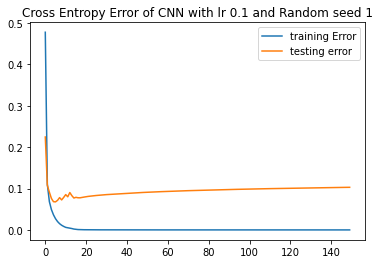

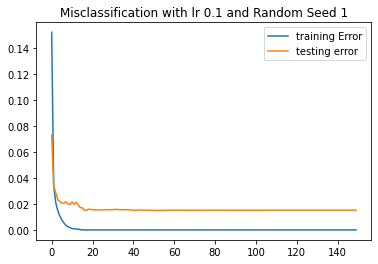

Final_valid_accuracy is 0.015199999999999991


In [ ]:
 # Cross validation
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="training Error")
plt.plot(val_loss_li,label="testing error")
plt.title("Cross Entropy Error of CNN with lr 0.1 and Random seed 1")
plt.legend()
plt.show()

#Misaccuracy
import matplotlib.pyplot as plt
plt.plot( misclass_train_li,label="training Error")
plt.plot(misclass_valid_li,label="testing error")
plt.title("Misclassification with lr 0.1 and Random Seed 1")
plt.legend()
plt.show()
print("Final_valid_accuracy is",valid_misclassify)

# random seed 66

Epoch 25 		 Training Loss: 0.0003130350785606817 		 Validation Loss: 0.07481008970046137

Model train Accuracy = 0.0

Model valid Accuracy = 0.014599999999999946
Epoch 50 		 Training Loss: 9.601907405980639e-05 		 Validation Loss: 0.08314129669313743

Model train Accuracy = 0.0

Model valid Accuracy = 0.014900000000000024
Epoch 75 		 Training Loss: 5.4232084367599677e-05 		 Validation Loss: 0.08742177718174918

Model train Accuracy = 0.0

Model valid Accuracy = 0.014499999999999957
Epoch 100 		 Training Loss: 3.6967889350978014e-05 		 Validation Loss: 0.09040459807785671

Model train Accuracy = 0.0

Model valid Accuracy = 0.01429999999999998
Epoch 125 		 Training Loss: 2.7754855264247894e-05 		 Validation Loss: 0.09274025829419588

Model train Accuracy = 0.0

Model valid Accuracy = 0.014399999999999968
Epoch 150 		 Training Loss: 2.2091797644587522e-05 		 Validation Loss: 0.09462894924454672

Model train Accuracy = 0.0

Model valid Accuracy = 0.014399999999999968


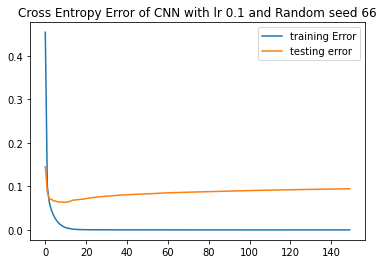

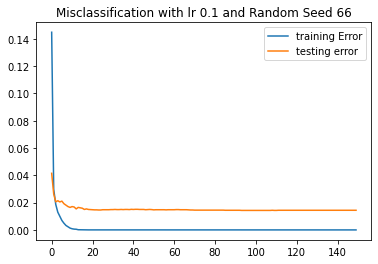

Final_valid_accuracy is 0.014399999999999968


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(66)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)
 
# Building Our Mode
class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(8*14*14, 100)
        self.fc2 = nn.Linear(100, 10)
        self.drop= nn.Dropout()
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        x=self.fc1(x)
        x=self.relu(x)
        x=self.drop(x)
        x=self.fc2(x)
        return x


        #x = x.view(x.shape[0],-1)    # Flatten the images
        #x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = self.fc2(x)
        
 
model = Network()
if torch.cuda.is_available():
    model = model.cuda()
 
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_valid_li=[]
 
for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(trainloader))
    misclass_train_li.append(mis_accuracy)
    
           
        
   
    # Validation error
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(validloader))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in validloader:
            images, labels = images.cuda(), labels.cuda()
            #print(model(images))
            #test_output, last_layer
            test_output = model(images)
            _,pred_y = torch.max(test_output.data, 1)
            total+=labels.size(0)
            correct += (pred_y == labels).sum().item()
    accuracy = correct / total        

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    valid_misclassify=1- accuracy
    #correct_count/all_count
    misclass_valid_li.append(valid_misclassify)


      


    if (e+1) % 25 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_cnn_full=0.1_rs_66.pth')

# Cross validation Plot
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="training Error")
plt.plot(val_loss_li,label="testing error")
plt.title("Cross Entropy Error of CNN with lr 0.1 and Random seed 66")
plt.legend()
plt.show()

#Misaccuracy Plot
import matplotlib.pyplot as plt
plt.plot( misclass_train_li,label="training Error")
plt.plot(misclass_valid_li,label="testing error")
plt.title("Misclassification with lr 0.1 and Random Seed 66")
plt.legend()
plt.show()
print("Final_valid_accuracy is",valid_misclassify)


# RADOM SEED 88

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

Epoch 25 		 Training Loss: 0.0003059987115729206 		 Validation Loss: 0.06643186760874788

Model train Accuracy = 0.0

Model valid Accuracy = 0.012800000000000034
Epoch 50 		 Training Loss: 9.647573510104242e-05 		 Validation Loss: 0.07235406556172377

Model train Accuracy = 0.0

Model valid Accuracy = 0.012800000000000034
Epoch 75 		 Training Loss: 5.5126799450202666e-05 		 Validation Loss: 0.07606260895819884

Model train Accuracy = 0.0

Model valid Accuracy = 0.01319999999999999
Epoch 100 		 Training Loss: 3.780728423231206e-05 		 Validation Loss: 0.07870777472608485

Model train Accuracy = 0.0

Model valid Accuracy = 0.0131
Epoch 125 		 Training Loss: 2.8418219962759763e-05 		 Validation Loss: 0.08075306523155538

Model train Accuracy = 0.0

Model valid Accuracy = 0.0131
Epoch 150 		 Training Loss: 2.2611858915447573e-05 		 Validation Loss: 0.08241212558082046

Model train Accuracy = 0.0

Model valid Accuracy = 0.013199999

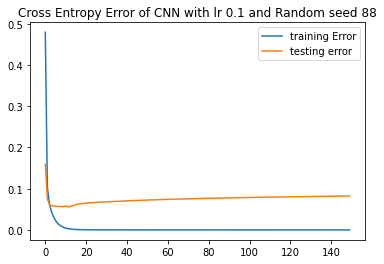

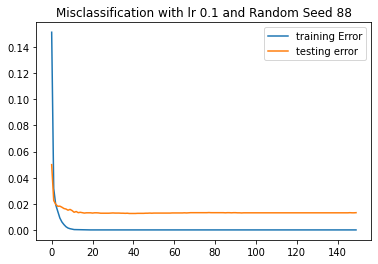

Final_valid_accuracy is 0.01319999999999999


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(88)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)
 
# Building Our Mode
class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(8*14*14, 100)
        self.fc2 = nn.Linear(100, 10)
        self.drop= nn.Dropout()
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        x=self.fc1(x)
        x=self.relu(x)
        x=self.drop(x)
        x=self.fc2(x)
        return x


        #x = x.view(x.shape[0],-1)    # Flatten the images
        #x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = self.fc2(x)
        
 
model = Network()
if torch.cuda.is_available():
    model = model.cuda()
 
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_valid_li=[]
 
for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(trainloader))
    misclass_train_li.append(mis_accuracy)
    
    
    
   
    # Validation error
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(validloader))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in validloader:
            images, labels = images.cuda(), labels.cuda()
            #print(model(images))
            #test_output, last_layer
            test_output = model(images)
            _,pred_y = torch.max(test_output.data, 1)
            total+=labels.size(0)
            correct += (pred_y == labels).sum().item()
    accuracy = correct / total        

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    valid_misclassify=1- accuracy
    #correct_count/all_count
    misclass_valid_li.append(valid_misclassify)


    


    if (e+1) % 25 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_cnn_full=0.1_rs_88.pth')

# Cross validation Plot
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="training Error")
plt.plot(val_loss_li,label="testing error")
plt.title("Cross Entropy Error of CNN with lr 0.1 and Random seed 88")
plt.legend()
plt.show()

#Misaccuracy Plot
import matplotlib.pyplot as plt
plt.plot( misclass_train_li,label="training Error")
plt.plot(misclass_valid_li,label="testing error")
plt.title("Misclassification with lr 0.1 and Random Seed 88")
plt.legend()
plt.show()
print("Final_valid_accuracy is",valid_misclassify)


# RANDOM SEED 100

Epoch 25 		 Training Loss: 0.0002989484607813664 		 Validation Loss: 0.06743019638354875

Model train Accuracy = 0.0

Model valid Accuracy = 0.013700000000000045
Epoch 50 		 Training Loss: 9.319670407609612e-05 		 Validation Loss: 0.07418337216408924

Model train Accuracy = 0.0

Model valid Accuracy = 0.013800000000000034
Epoch 75 		 Training Loss: 5.3130739353809155e-05 		 Validation Loss: 0.0774913674268175

Model train Accuracy = 0.0

Model valid Accuracy = 0.013599999999999945
Epoch 100 		 Training Loss: 3.638366740823755e-05 		 Validation Loss: 0.07988167490181183

Model train Accuracy = 0.0

Model valid Accuracy = 0.01319999999999999
Epoch 125 		 Training Loss: 2.738253184213486e-05 		 Validation Loss: 0.08174087210681717

Model train Accuracy = 0.0

Model valid Accuracy = 0.01319999999999999
Epoch 150 		 Training Loss: 2.1808897050293505e-05 		 Validation Loss: 0.08327529260419275

Model train Accuracy = 0.0

Model valid Accuracy = 0.0131


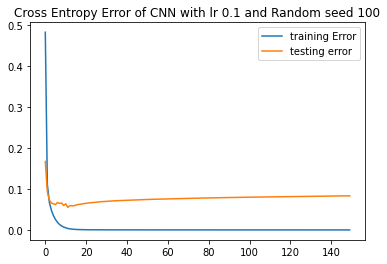

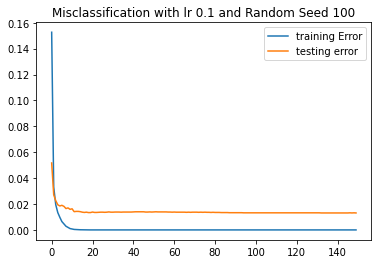

Final_valid_accuracy is 0.0131


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(100)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)
 
# Building Our Mode
class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(8*14*14, 100)
        self.fc2 = nn.Linear(100, 10)
        self.drop= nn.Dropout()
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        x=self.fc1(x)
        x=self.relu(x)
        x=self.drop(x)
        x=self.fc2(x)
        return x


   
        
 
model = Network()
if torch.cuda.is_available():
    model = model.cuda()
 
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_valid_li=[]
 
for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(trainloader))
    misclass_train_li.append(mis_accuracy)
    
    
    
        
        
        
    
   
    # Validation error
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(validloader))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in validloader:
            images, labels = images.cuda(), labels.cuda()
            #print(model(images))
            #test_output, last_layer
            test_output = model(images)
            _,pred_y = torch.max(test_output.data, 1)
            total+=labels.size(0)
            correct += (pred_y == labels).sum().item()
    accuracy = correct / total        

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    valid_misclassify=1- accuracy
    #correct_count/all_count
    misclass_valid_li.append(valid_misclassify)


     
    


    if (e+1) % 25 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_cnn_full=0.1_rs_100.pth')

# Cross validation Plot
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="training Error")
plt.plot(val_loss_li,label="testing error")
plt.title("Cross Entropy Error of CNN with lr 0.1 and Random seed 100")
plt.legend()
plt.show()

#Misaccuracy Plot
import matplotlib.pyplot as plt
plt.plot( misclass_train_li,label="training Error")
plt.plot(misclass_valid_li,label="testing error")
plt.title("Misclassification with lr 0.1 and Random Seed 100")
plt.legend()
plt.show()
print("Final_valid_accuracy is",valid_misclassify)


# RANDOM SEED 200

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(200)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)


for i in [0,0.5,0.9]:
  print("learning rate is 0.01 and momentum {}".format(i))
# Building Our Mode
class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(8*14*14, 100)
        self.fc2 = nn.Linear(100, 10)
        self.drop= nn.Dropout()
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        x=self.fc1(x)
        x=self.relu(x)
        x=self.drop(x)
        x=self.fc2(x)
        return x


        #x = x.view(x.shape[0],-1)    # Flatten the images
        #x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = self.fc2(x)
        
 
model = Network()
if torch.cuda.is_available():
    model = model.cuda()
 
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_valid_li=[]
 
for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(trainloader))
    misclass_train_li.append(mis_accuracy)
    
    
    
   
    # Validation error
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(validloader))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in validloader:
            images, labels = images.cuda(), labels.cuda()
            #print(model(images))
            #test_output, last_layer
            test_output = model(images)
            _,pred_y = torch.max(test_output.data, 1)
            total+=labels.size(0)
            correct += (pred_y == labels).sum().item()
    accuracy = correct / total        

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    valid_misclassify=1- accuracy
    #correct_count/all_count
    misclass_valid_li.append(valid_misclassify)


   


    if (e+1) % 25 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_cnn_full=0.1_rs_200.pth')

# Cross validation Plot
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="training Error")
plt.plot(val_loss_li,label="testing error")
plt.title("Cross Entropy Error of CNN with lr 0.1 and Random seed 200")
plt.legend()
plt.show()

#Misaccuracy Plot
import matplotlib.pyplot as plt
plt.plot( misclass_train_li,label="training Error")
plt.plot(misclass_valid_li,label="testing error")
plt.title("Misclassification with lr 0.1 and Random Seed 200")
plt.legend()
plt.show()
print("Final_valid_accuracy is",valid_misclassify)


Epoch 25 		 Training Loss: 0.00029488470881785253 		 Validation Loss: 0.07778247477928378

Model train Accuracy = 0.0

Model valid Accuracy = 0.013700000000000045
Epoch 50 		 Training Loss: 9.53002230288667e-05 		 Validation Loss: 0.08511032788623164

Model train Accuracy = 0.0

Model valid Accuracy = 0.013700000000000045
Epoch 75 		 Training Loss: 5.435378032206553e-05 		 Validation Loss: 0.08927677713249939

Model train Accuracy = 0.0

Model valid Accuracy = 0.013900000000000023
Epoch 100 		 Training Loss: 3.719660163538929e-05 		 Validation Loss: 0.09224200028445581

Model train Accuracy = 0.0

Model valid Accuracy = 0.014000000000000012
Epoch 125 		 Training Loss: 2.798753625975291e-05 		 Validation Loss: 0.09444579014581422

Model train Accuracy = 0.0

Model valid Accuracy = 0.013900000000000023


RANDOM SEED 100 has the lowest misaccuracy weights

# PART C

In [4]:
# Loading
model_new_cnn1 = Network()
#saved_model_cnn_bef_full=0.1_rs_88
#'/content/drive/MyDrive/saved_model_actual_part1_rs=100'
#model_new_cnn2.load_state_dict(torch.load('/content/drive/MyDrive/saved_model_cnn_full=0.1_rs_88.pth'))
model_new_cnn1.load_state_dict(torch.load('/content/drive/MyDrive/saved_model_cnn_full=0.1_rs_100.pth'))


#'/content/drive/MyDrive/saved_model_cnn_full=0.1_rs_100.pth')


<All keys matched successfully>

In [7]:
print(model_new_cnn1)

Network(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1568, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (drop): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
)


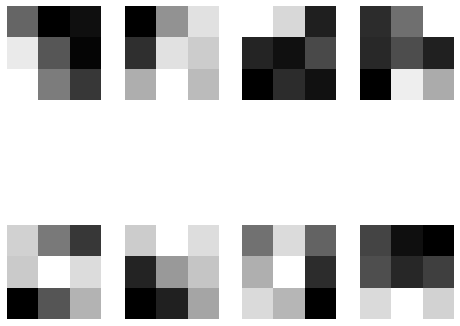

In [6]:
import matplotlib.pyplot as plt

params = list(model_new_cnn1.parameters())[0]
plt.figure(figsize=(8, 8))
for i in range(params.shape[0]):
    plt.subplot(2,4,i + 1) # Since we know it is a 10 x 10 grid
    x = params[i,:].detach().numpy()
    plt.imshow(x.reshape((3, 3)), cmap = "gray", interpolation = "nearest")
    plt.axis("off")
plt.subplots_adjust(wspace=0.25, hspace=0.01)

# PART D

## Learning Rat is 0.01

learning rate is 0.5 and momentum 0
Epoch 25 		 Training Loss: 0.03581738046934871 		 Validation Loss: 0.08012595987516476

Model train Accuracy = 0.010360000000000036

Model valid Accuracy = 0.023599999999999954
Epoch 50 		 Training Loss: 0.010164070089154249 		 Validation Loss: 0.08492436624460468

Model train Accuracy = 0.0015199999999999658

Model valid Accuracy = 0.02070000000000005
Epoch 75 		 Training Loss: 0.0033242337554935915 		 Validation Loss: 0.09686372885557147

Model train Accuracy = 0.000140000000000029

Model valid Accuracy = 0.02070000000000005
Epoch 100 		 Training Loss: 0.0015189755389263572 		 Validation Loss: 0.10246214829193648

Model train Accuracy = 2.0000000000020002e-05

Model valid Accuracy = 0.01970000000000005
Epoch 125 		 Training Loss: 0.000917241567772327 		 Validation Loss: 0.10623927846579075

Model train Accuracy = 0.0

Model valid Accuracy = 0.019299999999999984
Epoch 150 		 Training Loss: 0.0006326434913470427 		 Validation Loss: 0.1096323002617663

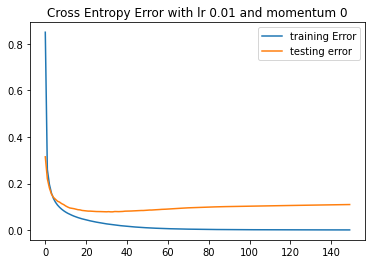

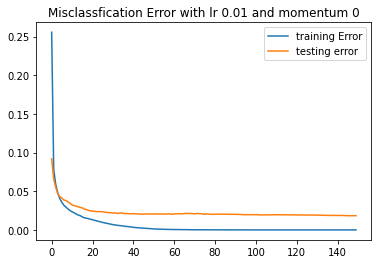

Final_valid_accuracy is 0.018399999999999972
learning rate is 0.5 and momentum 0.5
Epoch 25 		 Training Loss: 0.014737779748716474 		 Validation Loss: 0.07793522537176381

Model train Accuracy = 0.0032400000000000206

Model valid Accuracy = 0.02070000000000005
Epoch 50 		 Training Loss: 0.0017821760152342196 		 Validation Loss: 0.09384942138003985

Model train Accuracy = 4.0000000000040004e-05

Model valid Accuracy = 0.01870000000000005
Epoch 75 		 Training Loss: 0.0006382465742678872 		 Validation Loss: 0.10462315714062224

Model train Accuracy = 0.0

Model valid Accuracy = 0.01849999999999996
Epoch 100 		 Training Loss: 0.00035652468975137417 		 Validation Loss: 0.11017446837209695

Model train Accuracy = 0.0

Model valid Accuracy = 0.018299999999999983
Epoch 125 		 Training Loss: 0.00024068172306575364 		 Validation Loss: 0.11359225689679937

Model train Accuracy = 0.0

Model valid Accuracy = 0.01849999999999996
Epoch 150 		 Training Loss: 0.00017893673698882867 		 Validation Loss: 

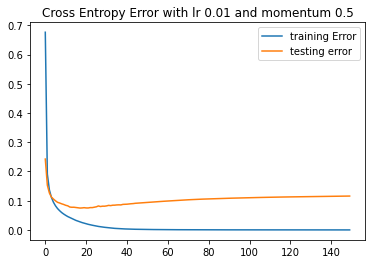

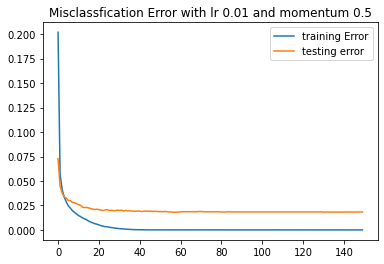

Final_valid_accuracy is 0.018299999999999983
learning rate is 0.5 and momentum 0.9
Epoch 25 		 Training Loss: 0.0003135439248069033 		 Validation Loss: 0.06552864981558726

Model train Accuracy = 0.0

Model valid Accuracy = 0.013700000000000045
Epoch 50 		 Training Loss: 9.358052735138665e-05 		 Validation Loss: 0.07253886287201203

Model train Accuracy = 0.0

Model valid Accuracy = 0.013499999999999956
Epoch 75 		 Training Loss: 5.36842468469989e-05 		 Validation Loss: 0.07619801397488975

Model train Accuracy = 0.0

Model valid Accuracy = 0.013299999999999979
Epoch 100 		 Training Loss: 3.706734543640742e-05 		 Validation Loss: 0.0787527359994194

Model train Accuracy = 0.0

Model valid Accuracy = 0.013299999999999979
Epoch 125 		 Training Loss: 2.7974882791701783e-05 		 Validation Loss: 0.08072743256518393

Model train Accuracy = 0.0

Model valid Accuracy = 0.013399999999999967
Epoch 150 		 Training Loss: 2.2314315912551537e-05 		 Validation Loss: 0.08239334809357783

Model train Ac

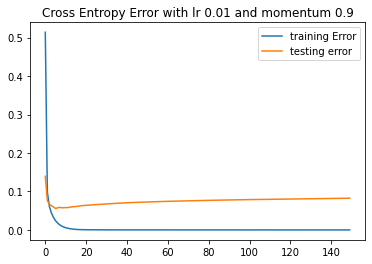

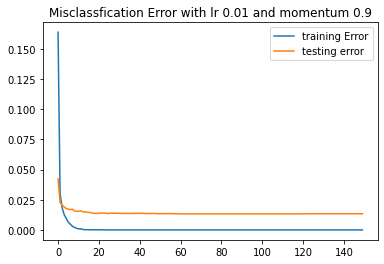

Final_valid_accuracy is 0.013399999999999967


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(100)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)


for i in [0,0.5,0.9]:
  print("learning rate is 0.5 and momentum {}".format(i))
# Building Our Mode
  class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(8*14*14, 100)
        self.fc2 = nn.Linear(100, 10)
        self.drop= nn.Dropout()
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        x=self.fc1(x)
        x=self.relu(x)
        x=self.drop(x)
        x=self.fc2(x)
        return x


        #x = x.view(x.shape[0],-1)    # Flatten the images
        #x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = self.fc2(x)
        
 
  model = Network()
  if torch.cuda.is_available():
    model = model.cuda()
 
# Declaring Criterion and Optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = 0.01,momentum=i)
 
# Training with Validation
  epochs = 150
  min_valid_loss = np.inf
  train_loss_li=[]
  val_loss_li=[]
  misclass_train_li=[]
  misclass_valid_li=[]
 
  for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

       

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(trainloader))
    misclass_train_li.append(mis_accuracy)
    
    
   
        
   
   
    # Validation error
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(validloader))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in validloader:
            images, labels = images.cuda(), labels.cuda()
            #print(model(images))
            #test_output, last_layer
            test_output = model(images)
            _,pred_y = torch.max(test_output.data, 1)
            total+=labels.size(0)
            correct += (pred_y == labels).sum().item()
    accuracy = correct / total        

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    valid_misclassify=1- accuracy
    #correct_count/all_count
    misclass_valid_li.append(valid_misclassify)


      


    if (e+1) % 25 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    #torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_cnn_full=0.01_.pth')
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_cnn_full=0.01_momentum_{}.pth'.format(i))


# Cross validation Plot
  import matplotlib.pyplot as plt
  plt.plot(train_loss_li,label="training Error")
  plt.plot(val_loss_li,label="testing error")
  plt.title("Cross Entropy Error with lr 0.01 and momentum {}".format(i))
  plt.legend()
  plt.show()

  #Misaccuracy Plot
  import matplotlib.pyplot as plt
  plt.plot( misclass_train_li,label="training Error")
  plt.plot(misclass_valid_li,label="testing error")
  plt.title("Misclassfication Error with lr 0.01 and momentum {}".format(i))
  
  plt.legend()
  plt.show()
  print("Final_valid_accuracy is",valid_misclassify)


  


# LR=0.1

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

learning rate is 0.1 and momentum 0
Epoch 25 		 Training Loss: 0.0003184234573523027 		 Validation Loss: 0.09920717584923315

Model train Accuracy = 0.0

Model valid Accuracy = 0.01749999999999996
Epoch 50 		 Training Loss: 7.990242923554154e-05 		 Validation Loss: 0.1125367263971141

Model train Accuracy = 0.0

Model valid Accuracy = 0.017100000000000004
Epoch 75 		 Training Loss: 4.571680555654915e-05 		 Validation Loss: 0.11863706720418861

Model train Accuracy = 0.0

Model valid Accuracy = 0.016800000000000037
Epoch 100 		 Training Loss: 3.165453004995416e-05 		 Validation Loss: 0.12266691070521701

Model train Accuracy = 0.0

Model valid Accuracy = 0.016900000000000026
Epoch 125 		 Training Loss: 2.4028930658825572e-05 		 Validation Loss: 0.1258039081554738

Model train Accuracy = 0.0

Model valid Accuracy = 0.017199999999999993
Epoch 150 		 Training Loss: 1.928693232968974e-05 		 Validation Loss: 0.12833525710386395

Mo

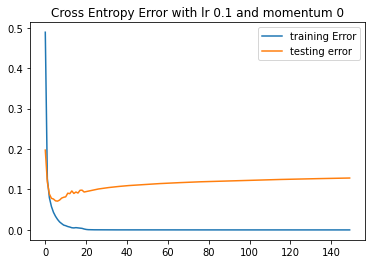

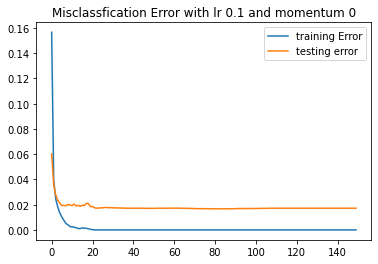

Final_valid_accuracy is 0.017199999999999993
learning rate is 0.1 and momentum 0.5
Epoch 25 		 Training Loss: 8.945874117999812e-05 		 Validation Loss: 0.09609482112850933

Model train Accuracy = 0.0

Model valid Accuracy = 0.015499999999999958
Epoch 50 		 Training Loss: 3.343094420695187e-05 		 Validation Loss: 0.10397111702125536

Model train Accuracy = 0.0

Model valid Accuracy = 0.015100000000000002
Epoch 75 		 Training Loss: 2.0352726707322754e-05 		 Validation Loss: 0.10844353344221101

Model train Accuracy = 0.0

Model valid Accuracy = 0.01529999999999998
Epoch 100 		 Training Loss: 1.447806592103028e-05 		 Validation Loss: 0.111665713151532

Model train Accuracy = 0.0

Model valid Accuracy = 0.01529999999999998
Epoch 125 		 Training Loss: 1.1160615389712211e-05 		 Validation Loss: 0.11421599345637706

Model train Accuracy = 0.0

Model valid Accuracy = 0.01529999999999998
Epoch 150 		 Training Loss: 9.039003450559894e-06 		 Validation Loss: 0.1162804716747233

Model train Accura

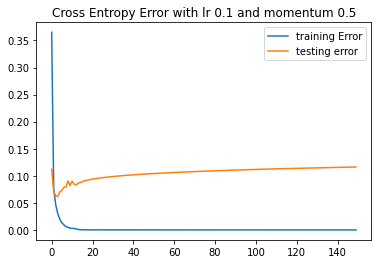

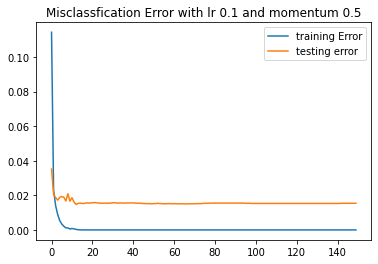

Final_valid_accuracy is 0.01539999999999997
learning rate is 0.1 and momentum 0.9
Epoch 25 		 Training Loss: 1.264458525387668 		 Validation Loss: 2.308962955261572

Model train Accuracy = 0.37946

Model valid Accuracy = 0.8993
Epoch 50 		 Training Loss: 2.308542895301824 		 Validation Loss: 2.308962955261572

Model train Accuracy = 0.89538

Model valid Accuracy = 0.8993
Epoch 75 		 Training Loss: 2.3085428910307297 		 Validation Loss: 2.308962955261572

Model train Accuracy = 0.89538

Model valid Accuracy = 0.8993
Epoch 100 		 Training Loss: 2.3085428943865893 		 Validation Loss: 2.3089629636404996

Model train Accuracy = 0.89538

Model valid Accuracy = 0.8993
Epoch 125 		 Training Loss: 2.308542891488347 		 Validation Loss: 2.308962955261572

Model train Accuracy = 0.89538

Model valid Accuracy = 0.8993
Epoch 150 		 Training Loss: 2.308542891488347 		 Validation Loss: 2.308962955261572

Model train Accuracy = 0.89538

Model valid Accuracy = 0.8993


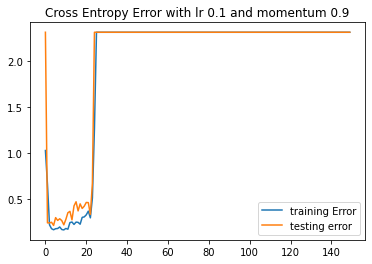

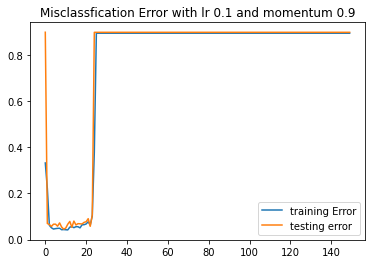

Final_valid_accuracy is 0.8993


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(100)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)


for i in [0,0.5,0.9]:
  print("learning rate is 0.1 and momentum {}".format(i))
# Building Our Mode
  class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(8*14*14, 100)
        self.fc2 = nn.Linear(100, 10)
        self.drop= nn.Dropout()
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        x=self.fc1(x)
        x=self.relu(x)
        x=self.drop(x)
        x=self.fc2(x)
        return x


        #x = x.view(x.shape[0],-1)    # Flatten the images
        #x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = self.fc2(x)
        
 
  model = Network()
  if torch.cuda.is_available():
    model = model.cuda()
 
# Declaring Criterion and Optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = 0.1,momentum=i)
 
# Training with Validation
  epochs = 150
  min_valid_loss = np.inf
  train_loss_li=[]
  val_loss_li=[]
  misclass_train_li=[]
  misclass_valid_li=[]
 
  for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(trainloader))
    misclass_train_li.append(mis_accuracy)
    
    
    #len(trainset)
    # trainset, not train_loader
    # probably x in your case

    #print("Accuracy = {}".format(accuracy))
        
        
        
        
   
   
    # Validation error
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(validloader))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in validloader:
            images, labels = images.cuda(), labels.cuda()
            #print(model(images))
            #test_output, last_layer
            test_output = model(images)
            _,pred_y = torch.max(test_output.data, 1)
            total+=labels.size(0)
            correct += (pred_y == labels).sum().item()
    accuracy = correct / total        

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    valid_misclassify=1- accuracy
    #correct_count/all_count
    misclass_valid_li.append(valid_misclassify)


    


    if (e+1) % 25 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    #torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_cnn_full=0.01_.pth')
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_cnn_full=0.1_momentum_{}.pth'.format(i))


# Cross validation Plot
  import matplotlib.pyplot as plt
  plt.plot(train_loss_li,label="training Error")
  plt.plot(val_loss_li,label="testing error")
  plt.title("Cross Entropy Error with lr 0.1 and momentum {}".format(i))
  plt.legend()
  plt.show()

  #Misaccuracy Plot
  import matplotlib.pyplot as plt
  plt.plot( misclass_train_li,label="training Error")
  plt.plot(misclass_valid_li,label="testing error")
  plt.title("Misclassfication Error with lr 0.1 and momentum {}".format(i))
  
  plt.legend()
  plt.show()
  print("Final_valid_accuracy is",valid_misclassify)


  


## LR=0.2

learning rate is 0.2 and momentum 0
Epoch 1 		 Training Loss: 0.40379152162047016 		 Validation Loss: 0.11952127028143587

Model train Accuracy = 0.12848000000000004

Model valid Accuracy = 0.03720000000000001
Epoch 2 		 Training Loss: 0.08230297464363591 		 Validation Loss: 0.08584078804801067

Model train Accuracy = 0.02534000000000003

Model valid Accuracy = 0.027699999999999947
Epoch 3 		 Training Loss: 0.04794346298939761 		 Validation Loss: 0.08629091830921178

Model train Accuracy = 0.014059999999999961

Model valid Accuracy = 0.02639999999999998
Epoch 4 		 Training Loss: 0.030612538834240987 		 Validation Loss: 0.07696179043214854

Model train Accuracy = 0.009099999999999997

Model valid Accuracy = 0.0232
Epoch 5 		 Training Loss: 0.01875524691626597 		 Validation Loss: 0.07858369520158195

Model train Accuracy = 0.005079999999999973

Model valid Accuracy = 0.021700000000000053
Epoch 6 		 Training Loss: 0.012647201122984248 		 Validation Loss: 0.07772388603623145

Model train A

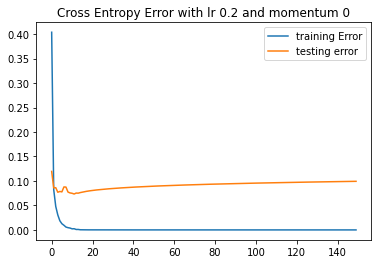

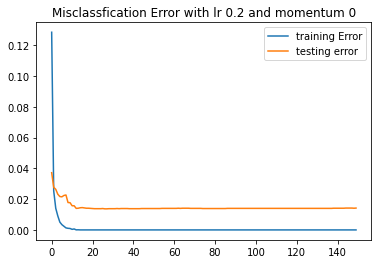

Final_valid_accuracy is 0.01419999999999999
learning rate is 0.2 and momentum 0.5
Epoch 1 		 Training Loss: 0.3714130400642467 		 Validation Loss: 0.11113033061564422

Model train Accuracy = 0.11514000000000002

Model valid Accuracy = 0.03290000000000004
Epoch 2 		 Training Loss: 0.07331188640185601 		 Validation Loss: 0.07317975374495093

Model train Accuracy = 0.02295999999999998

Model valid Accuracy = 0.02429999999999999
Epoch 3 		 Training Loss: 0.040744790407607666 		 Validation Loss: 0.07283900266929051

Model train Accuracy = 0.012460000000000027

Model valid Accuracy = 0.022700000000000053
Epoch 4 		 Training Loss: 0.02458402862823035 		 Validation Loss: 0.07624194538509012

Model train Accuracy = 0.007719999999999949

Model valid Accuracy = 0.02300000000000002
Epoch 5 		 Training Loss: 0.01612737827874923 		 Validation Loss: 0.08409728352683432

Model train Accuracy = 0.00544

Model valid Accuracy = 0.021100000000000008
Epoch 6 		 Training Loss: 0.0140855492628292 		 Validati

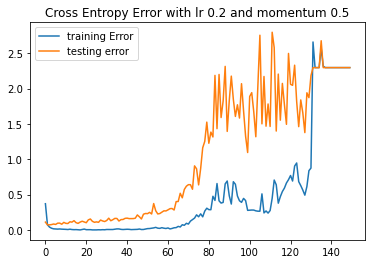

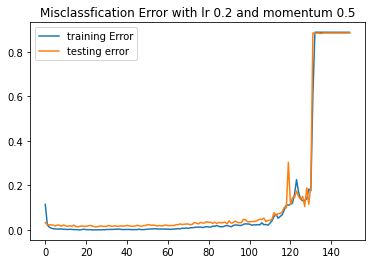

Final_valid_accuracy is 0.8852
learning rate is 0.2 and momentum 0.9
Epoch 1 		 Training Loss: 2.1453049359074483 		 Validation Loss: 2.3172620241634383

Model train Accuracy = 0.79708

Model valid Accuracy = 0.8886000000000001
Epoch 2 		 Training Loss: 2.3149089971873065 		 Validation Loss: 2.3172620241634383

Model train Accuracy = 0.89768

Model valid Accuracy = 0.8886000000000001
Epoch 3 		 Training Loss: 2.314909000085549 		 Validation Loss: 2.3172620256868797

Model train Accuracy = 0.89768

Model valid Accuracy = 0.8886000000000001
Epoch 4 		 Training Loss: 2.3149090011533224 		 Validation Loss: 2.3172620180696724

Model train Accuracy = 0.89768

Model valid Accuracy = 0.8886000000000001
Epoch 5 		 Training Loss: 2.314909001763479 		 Validation Loss: 2.3172620256868797

Model train Accuracy = 0.89768

Model valid Accuracy = 0.8886000000000001
Epoch 6 		 Training Loss: 2.314909002526174 		 Validation Loss: 2.3172620256868797

Model train Accuracy = 0.89768

Model valid Accuracy =

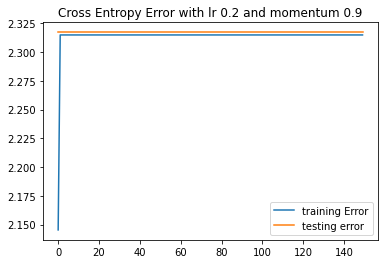

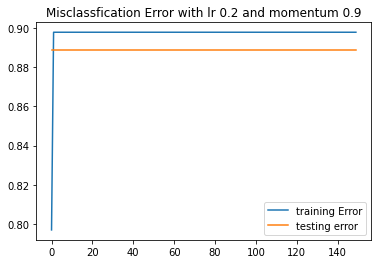

Final_valid_accuracy is 0.8886000000000001


In [3]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(100)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)


for i in [0,0.5,0.9]:
  print("learning rate is 0.2 and momentum {}".format(i))
# Building Our Mode
  class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(8*14*14, 100)
        self.fc2 = nn.Linear(100, 10)
        self.drop= nn.Dropout()
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        x=self.fc1(x)
        x=self.relu(x)
        x=self.drop(x)
        x=self.fc2(x)
        return x


        #x = x.view(x.shape[0],-1)    # Flatten the images
        #x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = self.fc2(x)
        
 
  model = Network()
  if torch.cuda.is_available():
    model = model.cuda()
 
# Declaring Criterion and Optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = 0.2,momentum=i)
 
# Training with Validation
  epochs = 150
  min_valid_loss = np.inf
  train_loss_li=[]
  val_loss_li=[]
  misclass_train_li=[]
  misclass_valid_li=[]
 
  for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(trainloader))
    misclass_train_li.append(mis_accuracy)
    
    
    #len(trainset)
    # trainset, not train_loader
    # probably x in your case

    #print("Accuracy = {}".format(accuracy))
        
        
        
        
   
   
    # Validation error
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(validloader))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in validloader:
            images, labels = images.cuda(), labels.cuda()
            #print(model(images))
            #test_output, last_layer
            test_output = model(images)
            _,pred_y = torch.max(test_output.data, 1)
            total+=labels.size(0)
            correct += (pred_y == labels).sum().item()
    accuracy = correct / total        

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    valid_misclassify=1- accuracy
    #correct_count/all_count
    misclass_valid_li.append(valid_misclassify)


      


    if (e+1) % 1 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    #torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_cnn_full=0.01_.pth')
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_cnn_full=0.2_momentum_{}.pth'.format(i))


# Cross validation Plot
  import matplotlib.pyplot as plt
  plt.plot(train_loss_li,label="training Error")
  plt.plot(val_loss_li,label="testing error")
  plt.title("Cross Entropy Error with lr 0.2 and momentum {}".format(i))
  plt.legend()
  plt.show()

  #Misaccuracy Plot
  import matplotlib.pyplot as plt
  plt.plot( misclass_train_li,label="training Error")
  plt.plot(misclass_valid_li,label="testing error")
  plt.title("Misclassfication Error with lr 0.2 and momentum {}".format(i))
  
  plt.legend()
  plt.show()
  print("Final_valid_accuracy is",valid_misclassify)


  


## LR 0.5

learning rate is 0.5 and momentum 0
Epoch 25 		 Training Loss: 0.012005687681366945 		 Validation Loss: 0.12551322048434932

Model train Accuracy = 0.0033999999999999586

Model valid Accuracy = 0.017199999999999993
Epoch 50 		 Training Loss: 0.09459369049552982 		 Validation Loss: 0.31075287943192764

Model train Accuracy = 0.010279999999999956

Model valid Accuracy = 0.022399999999999975
Epoch 75 		 Training Loss: 0.20894936281944818 		 Validation Loss: 0.7225275854617785

Model train Accuracy = 0.015179999999999971

Model valid Accuracy = 0.025599999999999956
Epoch 100 		 Training Loss: 2.3044231369643353 		 Validation Loss: 2.303657174491273

Model train Accuracy = 0.89266

Model valid Accuracy = 0.8901
Epoch 125 		 Training Loss: 2.304423138032109 		 Validation Loss: 2.303657174491273

Model train Accuracy = 0.89266

Model valid Accuracy = 0.8901
Epoch 150 		 Training Loss: 2.304423138184648 		 Validation Loss: 2.303657174491273

Model train Accuracy = 0.89266

Model valid Accuracy

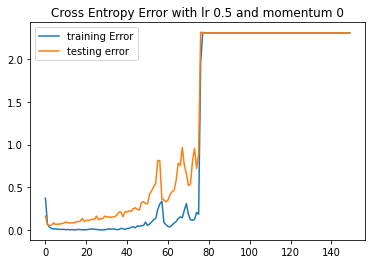

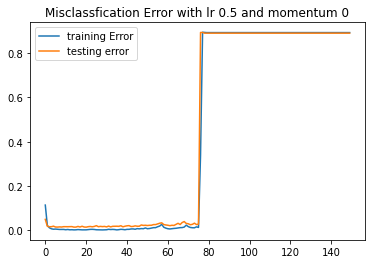

Final_valid_accuracy is 0.8901
learning rate is 0.5 and momentum 0.5
Epoch 25 		 Training Loss: 2.3079637221167353 		 Validation Loss: 2.3060715457501884

Model train Accuracy = 0.89416

Model valid Accuracy = 0.8956999999999999
Epoch 50 		 Training Loss: 2.3079637225743523 		 Validation Loss: 2.3060715457501884

Model train Accuracy = 0.89416

Model valid Accuracy = 0.8956999999999999
Epoch 75 		 Training Loss: 2.3079637248624385 		 Validation Loss: 2.3060715457501884

Model train Accuracy = 0.89416

Model valid Accuracy = 0.8956999999999999
Epoch 100 		 Training Loss: 2.3079637248624385 		 Validation Loss: 2.3060715457501884

Model train Accuracy = 0.89416

Model valid Accuracy = 0.8956999999999999
Epoch 125 		 Training Loss: 2.3079637248624385 		 Validation Loss: 2.3060715457501884

Model train Accuracy = 0.89416

Model valid Accuracy = 0.8956999999999999
Epoch 150 		 Training Loss: 2.3079637245573603 		 Validation Loss: 2.3060715457501884

Model train Accuracy = 0.89416

Model vali

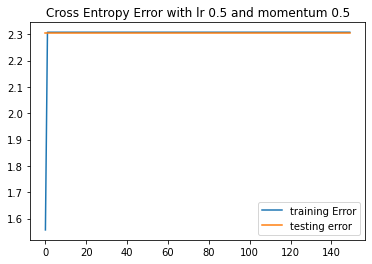

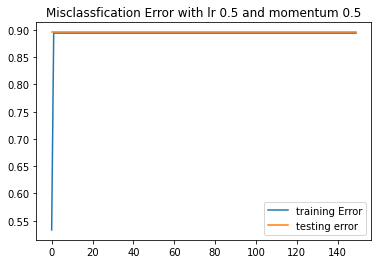

Final_valid_accuracy is 0.8956999999999999
learning rate is 0.5 and momentum 0.9
Epoch 25 		 Training Loss: 2.338136138019086 		 Validation Loss: 2.36065011131116

Model train Accuracy = 0.89732

Model valid Accuracy = 0.8956999999999999


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random

random.seed(100)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
train = datasets.MNIST('', train = True, transform = transforms, download = True)
train, valid = random_split(train,[50000,10000])
 
# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(valid, batch_size=32)


for i in [0,0.5,0.9]:
  print("learning rate is 0.5 and momentum {}".format(i))
# Building Our Mode
  class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(8*14*14, 100)
        self.fc2 = nn.Linear(100, 10)
        self.drop= nn.Dropout()
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        x=self.fc1(x)
        x=self.relu(x)
        x=self.drop(x)
        x=self.fc2(x)
        return x


    
  model = Network()
  if torch.cuda.is_available():
    model = model.cuda()
 
# Declaring Criterion and Optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = 0.5,momentum=i)
 
# Training with Validation
  epochs = 150
  min_valid_loss = np.inf
  train_loss_li=[]
  val_loss_li=[]
  misclass_train_li=[]
  misclass_valid_li=[]
 
  for e in range(epochs):
    train_loss = 0.0
    total4=0
    correct=0
    accuracy=0
    for data, labels in trainloader:
        # Transfer Data to GPU if available
        total=0
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(trainloader))
    misclass_train_li.append(mis_accuracy)
    
    

        
        
        
        
   
   
    # Validation error
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validloader:
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(validloader))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in validloader:
            images, labels = images.cuda(), labels.cuda()
            #print(model(images))
            #test_output, last_layer
            test_output = model(images)
            _,pred_y = torch.max(test_output.data, 1)
            total+=labels.size(0)
            correct += (pred_y == labels).sum().item()
    accuracy = correct / total        

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    valid_misclassify=1- accuracy
    #correct_count/all_count
    misclass_valid_li.append(valid_misclassify)


   


    if (e+1) % 25 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(trainloader)} \t\t Validation Loss: {valid_loss / len(validloader)}')
      print("\nModel train Accuracy =", mis_accuracy)
      print("\nModel valid Accuracy =", valid_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    #torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_cnn_full=0.01_.pth')
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_cnn_full=0.5_momentum_{}.pth'.format(i))


# Cross validation Plot
  import matplotlib.pyplot as plt
  plt.plot(train_loss_li,label="training Error")
  plt.plot(val_loss_li,label="testing error")
  plt.title("Cross Entropy Error with lr 0.5 and momentum {}".format(i))
  plt.legend()
  plt.show()

  #Misaccuracy Plot
  import matplotlib.pyplot as plt
  plt.plot( misclass_train_li,label="training Error")
  plt.plot(misclass_valid_li,label="testing error")
  plt.title("Misclassfication Error with lr 0.5 and momentum {}".format(i))
  
  plt.legend()
  plt.show()
  print("Final_valid_accuracy is",valid_misclassify)


  


HERE WE ARE PICKING LR=0.01 and Momentum 0.9 with the lowest Validation Loss: 0.08239334809357783 and Model Misaccuracy = 0.013399999999999967. That is 98.7% ACCURACY 

# QUESTION 6

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.txt to test.txt
Saving train.txt to train.txt
Saving val.txt to val.txt


In [11]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random
import pandas as pd

random.seed(1)
 
#Declare transform to convert raw data to tensor
transforms = transforms.Compose([
                                 transforms.ToTensor()
])
 
# Loading Data and splitting it into train and validation data
#train = datasets.MNIST('', train = True, transform = transforms, download = True)
#train, valid = random_split(train,[50000,10000])
train=pd.read_csv("train.txt",header=None)
test=pd.read_csv("test.txt",header=None)
val=pd.read_csv("val.txt",header=None)


# Create Dataloader of the above tensor with batch size = 32
trainloader = DataLoader(train, batch_size=32)
validloader = DataLoader(val, batch_size=32)
testloader= DataLoader(test, batch_size=32)

In [12]:
train.head()

0     1     2     3     4     5     6     7     8     9     ...  1559  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   1560  1561  1562  1563  1564  1565  1566  1567  1568  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     5  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     5  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     4  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    16  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    12  

[5 rows x 1569 columns]

## Part a

In [13]:
X_train_7=train.iloc[:,:-1]
y_train_7=train.iloc[:,-1]

In [ ]:
#file = pd.read_csv('train.txt', header = None)

In [14]:
# X_train_6=train.train.numpy()
# X_train_6

X_train_7= X_train_7.to_numpy()
y_train_7=y_train_7.to_numpy()
#y_train_7

In [ ]:
#plt.imshow(X_train_7[0])
X_train_7.shape

(20000, 1568)

In [15]:
y_train_7

array([5, 5, 4, ..., 5, 9, 7])

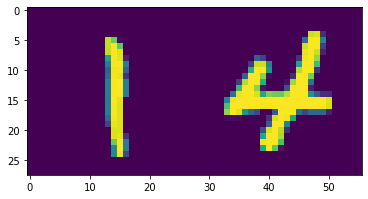

In [16]:
plt.imshow(X_train_7[0].reshape(28,56))

In [ ]:
y_train_7[0]

5

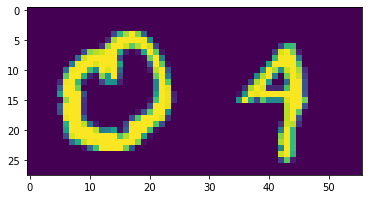

In [17]:
plt.imshow(X_train_7[2].reshape(28,56))

In [18]:
y_train_7[2]


4

# INTERPRETATION

The sum of the images (1 4) corrospond to the sum of the target function. Sum of images (0,4) corrospond to the sum of the target function ie 4

# QUESTION 7

## Creating Trainloader,testloader and validloader

In [ ]:
# creating image folders
import matplotlib.pyplot as plt
import os
def create_image_folder(dataframe, method):
  # method -> train, val , test

  train_df = pd.read_csv(dataframe, header = None)
  label = train_df[1568]
  train_df = train_df.iloc[:,:-1]
  train_numpy = train_df.to_numpy()
  # 20000, 1568
  directory = method + '_folder/'
  for i, images in enumerate(train_numpy):
    image = train_numpy[i].reshape(28, 56)
    
    if not os.path.isdir(directory + str(label[i])):
      os.mkdir(directory + str(label[i]))

    path = directory + str(label[i]) + '/' + str(i) + '.png'
    
    
    plt.imsave(path, image)
  


In [ ]:
!mkdir train_folder
!mkdir test_folder 
!mkdir val_folder

In [ ]:
# !rm -r train_folder/*

In [ ]:
create_image_folder('train.txt', 'train')
create_image_folder('val.txt', 'val')
create_image_folder('test.txt', 'test')

In [ ]:
#START FROM HERE
# Dataloader
from torch.utils.data import DataLoader
# train_dataloader_image = DataLoader('train_folder',batch_size=32,shuffle=False)

In [ ]:
# Display image and label.
# Define transformations for training and test sets-

from torchvision import transforms

train_data = datasets.ImageFolder('./train_folder', transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                     transforms.ToTensor()]))


In [ ]:
train_dataloader_image = DataLoader(train_data, batch_size = 32,shuffle=True)


Feature batch shape: torch.Size([32, 1, 28, 56])
Labels batch shape: torch.Size([32])


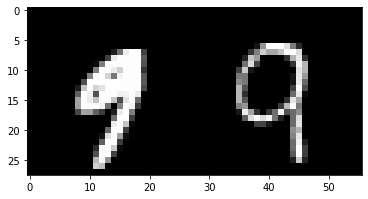

Label: 10


In [ ]:
train_features, train_labels = next(iter(train_dataloader_image))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
# print(img.shape)
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [ ]:
# Display image and label.
# Define transformations for training and test sets-

from torchvision import transforms

test_data = datasets.ImageFolder('./test_folder', transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                     transforms.ToTensor()]))


In [ ]:
test_dataloader_image = DataLoader(test_data, batch_size = 32,shuffle=True)


# Valid 

In [ ]:
# Display image and label.
# Define transformations for training and test sets-

from torchvision import transforms

val_data = datasets.ImageFolder('./val_folder', transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                     transforms.ToTensor()]))


In [ ]:
val_dataloader_image = DataLoader(val_data, batch_size = 32,shuffle=True)


# PART B

# MODEL 1- INTODUCING DROPOUT,MAXPOOL,1 CONV, 2 LINEAR LAYER

# RAANDOM SEED 1

Epoch 10 		 Training Loss: 0.153871405403316 		 Validation Loss: 0.6778817831710645

Model train MisAccuracy = 0.04864999999999997

Model Test MisAccuracy = 0.15400000000000003
Epoch 20 		 Training Loss: 0.0021362114893272517 		 Validation Loss: 0.8912583245023801

Model train MisAccuracy = 0.0

Model Test MisAccuracy = 0.13980000000000004
Epoch 30 		 Training Loss: 0.0009569671534234657 		 Validation Loss: 0.9766283003720129

Model train MisAccuracy = 0.0

Model Test MisAccuracy = 0.13680000000000003
Epoch 40 		 Training Loss: 0.000618952062423341 		 Validation Loss: 1.0237732625026612

Model train MisAccuracy = 0.0

Model Test MisAccuracy = 0.1382
Epoch 50 		 Training Loss: 0.00045415834683808497 		 Validation Loss: 1.0583821134582447

Model train MisAccuracy = 0.0

Model Test MisAccuracy = 0.139
Epoch 60 		 Training Loss: 0.00035760406612535007 		 Validation Loss: 1.0921829139471209

Model train MisAccuracy = 0.0

Model Test MisAccuracy = 0.13780000000000003
Epoch 70 		 Training Los

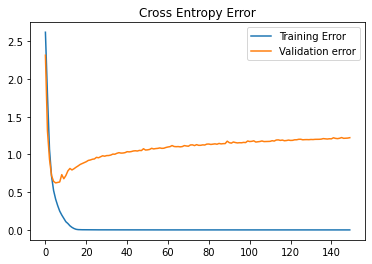

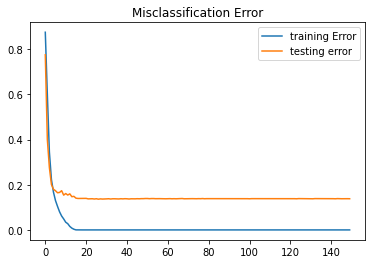

Final_valid_accuracy is 0.138


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random
random.seed(1)

# Building Our Model
class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(3136, 100)
        self.fc2 = nn.Linear(100, 19)
        self.drop= nn.Dropout()
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        # print("Flat",x.shape)
        x=self.fc1(x)
        # print("FC1",x)
        x=self.relu(x)
        x=self.drop(x)
        x=self.fc2(x)
        return x


        
 
model = Network()
# if torch.cuda.is_available():
    # model = model.cuda()
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_test_li=[]  #changed
 
for e in range(epochs):

    train_loss = 0.0
    # print(e,"epoch",model.Conv2D.weights)
    total4=0
    correct=0
    accuracy=0
    for data, labels in train_dataloader_image:
        # Transfer Data to GPU if available
        total=0
        # if torch.cuda.is_available():
        #    data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(train_dataloader_image))
    misclass_train_li.append(mis_accuracy)
       

   
    # Validation error
    #CROSS ENTROPY
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in val_dataloader_image:
        # Transfer Data to GPU if available
        #if torch.cuda.is_available():
            # data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(val_dataloader_image))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader_image:
            #print(labels)
            #images, labels = images.cuda(), labels.cuda()
            test_output = model(images)
            #plt.imshow(images)
            
            _,pred_y = torch.max(test_output.data, 1)
            #print("pred_y",pred_y)
            total+=labels.size(0) #shape[0]       #labels.size(0)
            correct += (pred_y ==labels).sum().item()
            #print(pred_y,labels)
    accuracy = (correct/total )      
    

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    test_misclassify=1- accuracy
    #correct_count/all_count
    misclass_test_li.append(test_misclassify)




    if (e+1) % 10 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(train_dataloader_image)} \t\t Validation Loss: {valid_loss / len(val_dataloader_image)}')
      print("\nModel train MisAccuracy =", mis_accuracy)
      print("\nModel Test MisAccuracy =", test_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_actual_part1_rs=1')

# Cross validation Plot
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="Training Error")
plt.plot(val_loss_li,label="Validation error")
plt.title("Cross Entropy Error")
plt.legend()
plt.show()

#Misaccuracy Plot
import matplotlib.pyplot as plt
plt.plot( misclass_train_li,label="training Error")
plt.plot(misclass_test_li,label="testing error")
plt.title("Misclassification Error")
plt.legend()
plt.show()
print("Final_valid_accuracy is",test_misclassify)


## RANDOM SEED 66

Epoch 1 		 Training Loss: 2.668856698989868 		 Validation Loss: 2.364655932043768

Model train MisAccuracy = 0.88515

Model Test MisAccuracy = 0.7956
Epoch 2 		 Training Loss: 1.9474448261260986 		 Validation Loss: 1.5143254403096096

Model train MisAccuracy = 0.6613

Model Test MisAccuracy = 0.496
Epoch 3 		 Training Loss: 1.224888216495514 		 Validation Loss: 1.056885688168228

Model train MisAccuracy = 0.40325

Model Test MisAccuracy = 0.3226
Epoch 4 		 Training Loss: 0.8374977417945861 		 Validation Loss: 0.811289074124804

Model train MisAccuracy = 0.2712

Model Test MisAccuracy = 0.23419999999999996
Epoch 5 		 Training Loss: 0.6217327007770538 		 Validation Loss: 0.708465401723886

Model train MisAccuracy = 0.1997

Model Test MisAccuracy = 0.20499999999999996
Epoch 6 		 Training Loss: 0.47840748772621156 		 Validation Loss: 0.6431916006811106

Model train MisAccuracy = 0.15190000000000003

Model Test MisAccuracy = 0.18279999999999996
Epoch 7 		 Training Loss: 0.3754612287521362 	

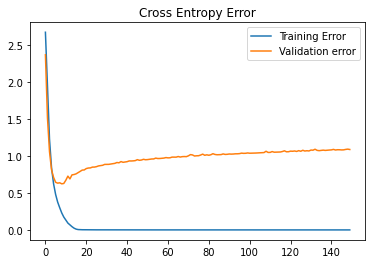

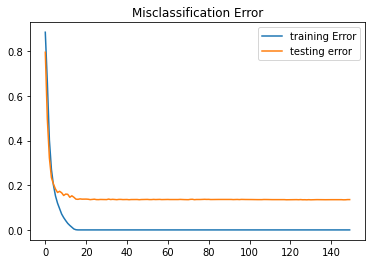

Final_valid_accuracy is 0.13580000000000003


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random
random.seed(66)

# Building Our Model
class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(3136, 100)
        self.fc2 = nn.Linear(100, 19)
        self.drop= nn.Dropout()
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        # print("Flat",x.shape)
        x=self.fc1(x)
        # print("FC1",x)
        x=self.relu(x)
        x=self.drop(x)
        x=self.fc2(x)
        return x


        
 
model = Network()
# if torch.cuda.is_available():
    # model = model.cuda()
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_test_li=[]  #changed
 
for e in range(epochs):

    train_loss = 0.0
    # print(e,"epoch",model.Conv2D.weights)
    total4=0
    correct=0
    accuracy=0
    for data, labels in train_dataloader_image:
        # Transfer Data to GPU if available
        total=0
        # if torch.cuda.is_available():
        #    data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(train_dataloader_image))
    misclass_train_li.append(mis_accuracy)
       

   
    # Validation error
    #CROSS ENTROPY
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in val_dataloader_image:
        # Transfer Data to GPU if available
        #if torch.cuda.is_available():
            # data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(val_dataloader_image))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader_image:
            #print(labels)
            #images, labels = images.cuda(), labels.cuda()
            test_output = model(images)
            #plt.imshow(images)
            
            _,pred_y = torch.max(test_output.data, 1)
            #print("pred_y",pred_y)
            total+=labels.size(0) #shape[0]       #labels.size(0)
            correct += (pred_y ==labels).sum().item()
            #print(pred_y,labels)
    accuracy = (correct/total )      
    

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    test_misclassify=1- accuracy
    #correct_count/all_count
    misclass_test_li.append(test_misclassify)




    if (e+1) % 1 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(train_dataloader_image)} \t\t Validation Loss: {valid_loss / len(val_dataloader_image)}')
      print("\nModel train MisAccuracy =", mis_accuracy)
      print("\nModel Test MisAccuracy =", test_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_actual_part1_rs=66')

# Cross validation Plot
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="Training Error")
plt.plot(val_loss_li,label="Validation error")
plt.title("Cross Entropy Error")
plt.legend()
plt.show()

#Misaccuracy Plot
import matplotlib.pyplot as plt
plt.plot( misclass_train_li,label="training Error")
plt.plot(misclass_test_li,label="testing error")
plt.title("Misclassification Error")
plt.legend()
plt.show()
print("Final_valid_accuracy is",test_misclassify)


# Random seed 88

Epoch 1 		 Training Loss: 2.6293796531677245 		 Validation Loss: 2.3024732033917856

Model train MisAccuracy = 0.88265

Model Test MisAccuracy = 0.7656000000000001
Epoch 2 		 Training Loss: 1.8162306102752686 		 Validation Loss: 1.3771083184108612

Model train MisAccuracy = 0.6141

Model Test MisAccuracy = 0.4504
Epoch 3 		 Training Loss: 1.0471620351791382 		 Validation Loss: 0.9022455097763402

Model train MisAccuracy = 0.34135000000000004

Model Test MisAccuracy = 0.275
Epoch 4 		 Training Loss: 0.6787591963052749 		 Validation Loss: 0.7701361025594602

Model train MisAccuracy = 0.21594999999999998

Model Test MisAccuracy = 0.22919999999999996
Epoch 5 		 Training Loss: 0.5000191663503647 		 Validation Loss: 0.6301381375379623

Model train MisAccuracy = 0.1593

Model Test MisAccuracy = 0.17500000000000004
Epoch 6 		 Training Loss: 0.3875321780085564 		 Validation Loss: 0.5907752428464829

Model train MisAccuracy = 0.127

Model Test MisAccuracy = 0.16200000000000003
Epoch 7 		 Trainin

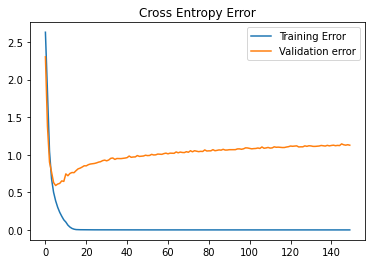

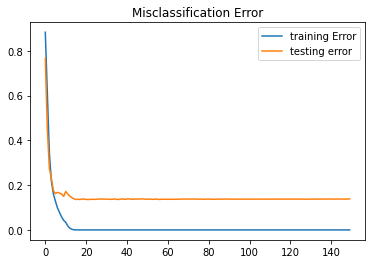

Final_valid_accuracy is 0.13839999999999997


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random
random.seed(88)

# Building Our Model
class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(3136, 100)
        self.fc2 = nn.Linear(100, 19)
        self.drop= nn.Dropout()
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        # print("Flat",x.shape)
        x=self.fc1(x)
        # print("FC1",x)
        x=self.relu(x)
        x=self.drop(x)
        x=self.fc2(x)
        return x


        
 
model = Network()
# if torch.cuda.is_available():
    # model = model.cuda()
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_test_li=[]  #changed
 
for e in range(epochs):

    train_loss = 0.0
    # print(e,"epoch",model.Conv2D.weights)
    total4=0
    correct=0
    accuracy=0
    for data, labels in train_dataloader_image:
        # Transfer Data to GPU if available
        total=0
        # if torch.cuda.is_available():
        #    data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(train_dataloader_image))
    misclass_train_li.append(mis_accuracy)
       

   
    # Validation error
    #CROSS ENTROPY
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in val_dataloader_image:
        # Transfer Data to GPU if available
        #if torch.cuda.is_available():
            # data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(val_dataloader_image))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader_image:
            #print(labels)
            #images, labels = images.cuda(), labels.cuda()
            test_output = model(images)
            #plt.imshow(images)
            
            _,pred_y = torch.max(test_output.data, 1)
            #print("pred_y",pred_y)
            total+=labels.size(0) #shape[0]       #labels.size(0)
            correct += (pred_y ==labels).sum().item()
            #print(pred_y,labels)
    accuracy = (correct/total )      
    

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    test_misclassify=1- accuracy
    #correct_count/all_count
    misclass_test_li.append(test_misclassify)




    if (e+1) % 1 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(train_dataloader_image)} \t\t Validation Loss: {valid_loss / len(val_dataloader_image)}')
      print("\nModel train MisAccuracy =", mis_accuracy)
      print("\nModel Test MisAccuracy =", test_misclassify)

   
    
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_actual_part1_rs=88')

# Cross validation Plot
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="Training Error")
plt.plot(val_loss_li,label="Validation error")
plt.title("Cross Entropy Error")
plt.legend()
plt.show()

#Misaccuracy Plot
import matplotlib.pyplot as plt
plt.plot( misclass_train_li,label="training Error")
plt.plot(misclass_test_li,label="testing error")
plt.title("Misclassification Error")
plt.legend()
plt.show()
print("Final_valid_accuracy is",test_misclassify)


# RANDOM SEED 100

Epoch 1 		 Training Loss: 2.6108303462982176 		 Validation Loss: 2.288423261065392

Model train MisAccuracy = 0.86775

Model Test MisAccuracy = 0.7908
Epoch 2 		 Training Loss: 1.8317321516036986 		 Validation Loss: 1.5254951616761032

Model train MisAccuracy = 0.6165499999999999

Model Test MisAccuracy = 0.5008
Epoch 3 		 Training Loss: 1.3164749422073365 		 Validation Loss: 1.2837026468507804

Model train MisAccuracy = 0.4366

Model Test MisAccuracy = 0.41300000000000003
Epoch 4 		 Training Loss: 0.997605923461914 		 Validation Loss: 0.9603578364773161

Model train MisAccuracy = 0.3218

Model Test MisAccuracy = 0.28300000000000003
Epoch 5 		 Training Loss: 0.756914679145813 		 Validation Loss: 0.8491166444720736

Model train MisAccuracy = 0.23919999999999997

Model Test MisAccuracy = 0.24560000000000004
Epoch 6 		 Training Loss: 0.5827702230930328 		 Validation Loss: 0.7803707636275868

Model train MisAccuracy = 0.18515000000000004

Model Test MisAccuracy = 0.23119999999999996
Epoch 

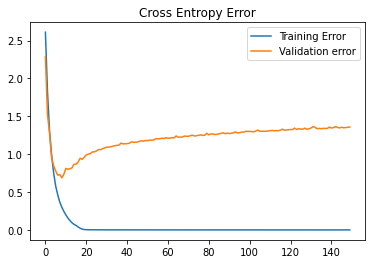

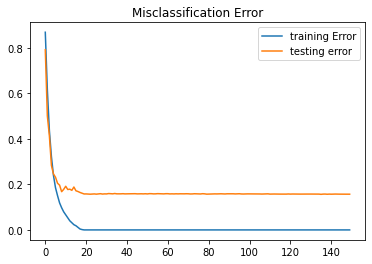

Final_test_accuracy is 0.15680000000000005


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random
random.seed(100)

# Building Our Model
class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(3136, 100)
        self.fc2 = nn.Linear(100, 19)
        self.drop= nn.Dropout()
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        # print("Flat",x.shape)
        x=self.fc1(x)
        # print("FC1",x)
        x=self.relu(x)
        x=self.drop(x)
        x=self.fc2(x)
        return x


        
 
model = Network()
# if torch.cuda.is_available():
    # model = model.cuda()
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_test_li=[]  #changed
 
for e in range(epochs):

    train_loss = 0.0
    # print(e,"epoch",model.Conv2D.weights)
    total4=0
    correct=0
    accuracy=0
    for data, labels in train_dataloader_image:
        # Transfer Data to GPU if available
        total=0
        # if torch.cuda.is_available():
        #    data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(train_dataloader_image))
    misclass_train_li.append(mis_accuracy)
       

   
    # Validation error
    #CROSS ENTROPY
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in val_dataloader_image:
        # Transfer Data to GPU if available
        #if torch.cuda.is_available():
            # data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(val_dataloader_image))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader_image:
            #print(labels)
            #images, labels = images.cuda(), labels.cuda()
            test_output = model(images)
            #plt.imshow(images)
            
            _,pred_y = torch.max(test_output.data, 1)
            #print("pred_y",pred_y)
            total+=labels.size(0) #shape[0]       #labels.size(0)
            correct += (pred_y ==labels).sum().item()
            #print(pred_y,labels)
    accuracy = (correct/total )      
    

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    test_misclassify=1- accuracy
    #correct_count/all_count
    misclass_test_li.append(test_misclassify)




    if (e+1) % 1 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(train_dataloader_image)} \t\t Validation Loss: {valid_loss / len(val_dataloader_image)}')
      print("\nModel train MisAccuracy =", mis_accuracy)
      print("\nModel Test MisAccuracy =", test_misclassify)

   
    
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_actual_part1_rs=100')

# Cross validation Plot
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="Training Error")
plt.plot(val_loss_li,label="Validation error")
plt.title("Cross Entropy Error")
plt.legend()
plt.show()

#Misaccuracy Plot
import matplotlib.pyplot as plt
plt.plot( misclass_train_li,label="training Error")
plt.plot(misclass_test_li,label="testing error")
plt.title("Misclassification Error")
plt.legend()
plt.show()
print("Final_test_accuracy is",test_misclassify)


#RANDOM SEED 200

Epoch 1 		 Training Loss: 2.7032692012786863 		 Validation Loss: 2.4394552221723425

Model train MisAccuracy = 0.8912

Model Test MisAccuracy = 0.8208
Epoch 2 		 Training Loss: 2.0325271839141847 		 Validation Loss: 1.6589978500536293

Model train MisAccuracy = 0.6931

Model Test MisAccuracy = 0.5594
Epoch 3 		 Training Loss: 1.368930712223053 		 Validation Loss: 1.152026528385794

Model train MisAccuracy = 0.45199999999999996

Model Test MisAccuracy = 0.36339999999999995
Epoch 4 		 Training Loss: 0.9613065444469452 		 Validation Loss: 0.9567810602628501

Model train MisAccuracy = 0.30835

Model Test MisAccuracy = 0.2832
Epoch 5 		 Training Loss: 0.7091996232032776 		 Validation Loss: 0.7974928186577597

Model train MisAccuracy = 0.22445000000000004

Model Test MisAccuracy = 0.24660000000000004
Epoch 6 		 Training Loss: 0.5586706102132797 		 Validation Loss: 0.6795105393145494

Model train MisAccuracy = 0.17669999999999997

Model Test MisAccuracy = 0.1936
Epoch 7 		 Training Loss: 0.44

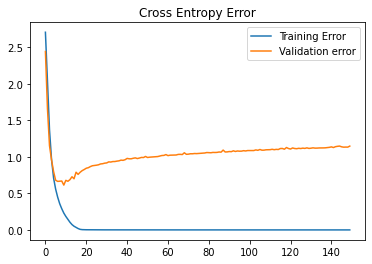

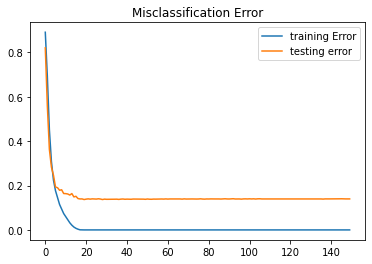

Final_test_accuracy is 0.13980000000000004


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random
random.seed(200)

# Building Our Model
class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(3136, 100)
        self.fc2 = nn.Linear(100, 19)
        self.drop= nn.Dropout()
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        # print("Flat",x.shape)
        x=self.fc1(x)
        # print("FC1",x)
        x=self.relu(x)
        x=self.drop(x)
        x=self.fc2(x)
        return x


        
 
model = Network()
# if torch.cuda.is_available():
    # model = model.cuda()
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_test_li=[]  #changed
 
for e in range(epochs):

    train_loss = 0.0
    # print(e,"epoch",model.Conv2D.weights)
    total4=0
    correct=0
    accuracy=0
    for data, labels in train_dataloader_image:
        # Transfer Data to GPU if available
        total=0
        # if torch.cuda.is_available():
        #    data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(train_dataloader_image))
    misclass_train_li.append(mis_accuracy)
       

   
    # Validation error
    #CROSS ENTROPY
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in val_dataloader_image:
        # Transfer Data to GPU if available
        #if torch.cuda.is_available():
            # data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(val_dataloader_image))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader_image:
            #print(labels)
            #images, labels = images.cuda(), labels.cuda()
            test_output = model(images)
            #plt.imshow(images)
            
            _,pred_y = torch.max(test_output.data, 1)
            #print("pred_y",pred_y)
            total+=labels.size(0) #shape[0]       #labels.size(0)
            correct += (pred_y ==labels).sum().item()
            #print(pred_y,labels)
    accuracy = (correct/total )      
    

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    test_misclassify=1- accuracy
    #correct_count/all_count
    misclass_test_li.append(test_misclassify)




    if (e+1) % 1 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(train_dataloader_image)} \t\t Validation Loss: {valid_loss / len(val_dataloader_image)}')
      print("\nModel train MisAccuracy =", mis_accuracy)
      print("\nModel Test MisAccuracy =", test_misclassify)

   
    
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_actual_part1_rs=200')

# Cross validation Plot
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="Training Error")
plt.plot(val_loss_li,label="Validation error")
plt.title("Cross Entropy Error")
plt.legend()
plt.show()

#Misaccuracy Plot
import matplotlib.pyplot as plt
plt.plot( misclass_train_li,label="training Error")
plt.plot(misclass_test_li,label="testing error")
plt.title("Misclassification Error")
plt.legend()
plt.show()
print("Final_test_accuracy is",test_misclassify)


# PART C

In [27]:
model_new_cnn2 = Network()
#saved_model_cnn_bef_full=0.1_rs_88
#'/content/drive/MyDrive/saved_model_actual_part1_rs=100'
#model_new_cnn2.load_state_dict(torch.load('/content/drive/MyDrive/saved_model_cnn_full=0.1_rs_88.pth'))
model_new_cnn2.load_state_dict(torch.load('/content/drive/MyDrive/saved_model_actual_part1_rs=66'))




<All keys matched successfully>

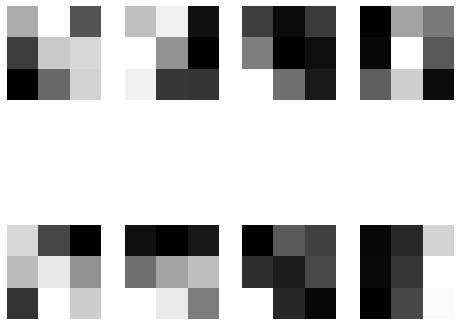

In [28]:
import matplotlib.pyplot as plt

params = list(model_new_cnn2.parameters())[0]
plt.figure(figsize=(8, 8))
for i in range(params.shape[0]):
    plt.subplot(2,4,i + 1) # Since we know it is a 10 x 10 grid
    x = params[i,:].detach().numpy()
    plt.imshow(x.reshape((3, 3)), cmap = "gray", interpolation = "nearest")
    plt.axis("off")
plt.subplots_adjust(wspace=0.25, hspace=0.01)

# Part d

# LR 0.01

learning rate is 0.01 and momentum 0
Epoch 1 		 Training Loss: 2.8254607124328612 		 Validation Loss: 2.7865614526590723

Model train MisAccuracy = 0.90795

Model Test MisAccuracy = 0.8928
Epoch 2 		 Training Loss: 2.734147982788086 		 Validation Loss: 2.6704682240820237

Model train MisAccuracy = 0.89115

Model Test MisAccuracy = 0.8608
Epoch 3 		 Training Loss: 2.5412363143920897 		 Validation Loss: 2.461619439398407

Model train MisAccuracy = 0.8511

Model Test MisAccuracy = 0.8184
Epoch 4 		 Training Loss: 2.3796366508483886 		 Validation Loss: 2.3382569741291603

Model train MisAccuracy = 0.8027

Model Test MisAccuracy = 0.7758
Epoch 5 		 Training Loss: 2.2529244787216185 		 Validation Loss: 2.1946275887215974

Model train MisAccuracy = 0.75815

Model Test MisAccuracy = 0.7216
Epoch 6 		 Training Loss: 2.09431958694458 		 Validation Loss: 2.0198592046263872

Model train MisAccuracy = 0.68885

Model Test MisAccuracy = 0.6482
Epoch 7 		 Training Loss: 1.8800022981643676 		 Validatio

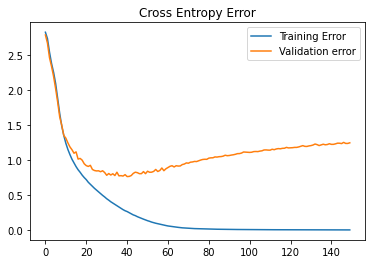

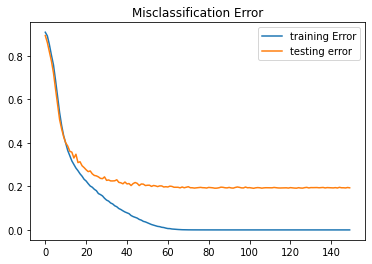

Final_valid_accuracy is 0.19340000000000002
learning rate is 0.01 and momentum 0.5
Epoch 1 		 Training Loss: 2.7746171672821043 		 Validation Loss: 2.629536027361633

Model train MisAccuracy = 0.8988

Model Test MisAccuracy = 0.866
Epoch 2 		 Training Loss: 2.43481152381897 		 Validation Loss: 2.3161714646466978

Model train MisAccuracy = 0.82925

Model Test MisAccuracy = 0.7656000000000001
Epoch 3 		 Training Loss: 2.168023027610779 		 Validation Loss: 2.04528686802858

Model train MisAccuracy = 0.7314

Model Test MisAccuracy = 0.6646000000000001
Epoch 4 		 Training Loss: 1.8143429109573364 		 Validation Loss: 1.6739483805978375

Model train MisAccuracy = 0.5942000000000001

Model Test MisAccuracy = 0.5302
Epoch 5 		 Training Loss: 1.4573617628097535 		 Validation Loss: 1.3495606909132307

Model train MisAccuracy = 0.4698

Model Test MisAccuracy = 0.4226
Epoch 6 		 Training Loss: 1.2317255303382872 		 Validation Loss: 1.2513358190560797

Model train MisAccuracy = 0.3971

Model Test Mi

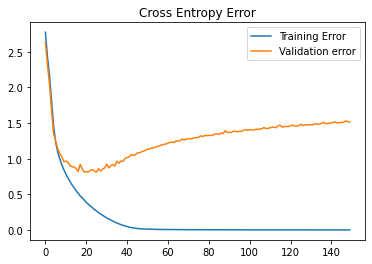

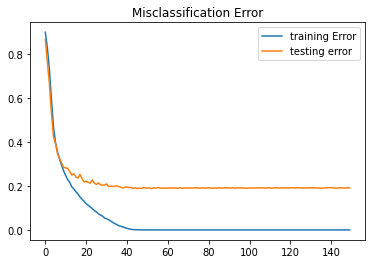

Final_valid_accuracy is 0.1906
learning rate is 0.01 and momentum 0.9
Epoch 1 		 Training Loss: 2.625357643508911 		 Validation Loss: 2.3555699974108655

Model train MisAccuracy = 0.8766

Model Test MisAccuracy = 0.8056
Epoch 2 		 Training Loss: 1.885416632080078 		 Validation Loss: 1.4364120686889454

Model train MisAccuracy = 0.6408

Model Test MisAccuracy = 0.45920000000000005
Epoch 3 		 Training Loss: 1.2289125880241394 		 Validation Loss: 1.085421398946434

Model train MisAccuracy = 0.403

Model Test MisAccuracy = 0.32999999999999996
Epoch 4 		 Training Loss: 0.8514054523944855 		 Validation Loss: 0.8428726294997392

Model train MisAccuracy = 0.27375000000000005

Model Test MisAccuracy = 0.24719999999999998
Epoch 5 		 Training Loss: 0.6245252737760544 		 Validation Loss: 0.6952490759123663

Model train MisAccuracy = 0.19915000000000005

Model Test MisAccuracy = 0.19979999999999998
Epoch 6 		 Training Loss: 0.48116364051103594 		 Validation Loss: 0.6601741255088976

Model train Mis

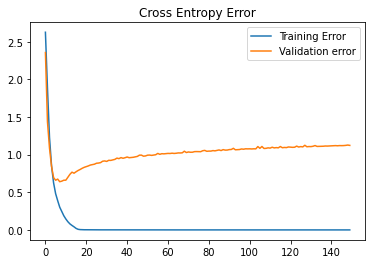

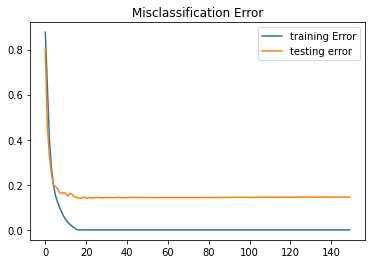

Final_valid_accuracy is 0.14539999999999997


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random
random.seed(66)  #CHANGED


for i in [0,0.5,0.9]:
# Building Our Model
  print("learning rate is 0.01 and momentum {}".format(i)) #CHANGED
  class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(3136, 100)
        self.fc2 = nn.Linear(100, 19)
        self.drop= nn.Dropout()
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        # print("Flat",x.shape)
        x=self.fc1(x)
        # print("FC1",x)
        x=self.relu(x)
        x=self.drop(x)
        x=self.fc2(x)
        return x


        
 
  model = Network()
# if torch.cuda.is_available():
    # model = model.cuda()
# Declaring Criterion and Optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = 0.01,momentum=i)
 
# Training with Validation
  epochs = 150
  min_valid_loss = np.inf
  train_loss_li=[]
  val_loss_li=[]
  misclass_train_li=[]
  misclass_test_li=[]  #changed
 
  for e in range(epochs):

    train_loss = 0.0
    # print(e,"epoch",model.Conv2D.weights)
    total4=0
    correct=0
    accuracy=0
    for data, labels in train_dataloader_image:
        # Transfer Data to GPU if available
        total=0
        # if torch.cuda.is_available():
        #    data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(train_dataloader_image))
    misclass_train_li.append(mis_accuracy)
       

   
    # Validation error
    #CROSS ENTROPY
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in val_dataloader_image:
        # Transfer Data to GPU if available
        #if torch.cuda.is_available():
            # data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(val_dataloader_image))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader_image:
            #print(labels)
            #images, labels = images.cuda(), labels.cuda()
            test_output = model(images)
            #plt.imshow(images)
            
            _,pred_y = torch.max(test_output.data, 1)
            #print("pred_y",pred_y)
            total+=labels.size(0) #shape[0]       #labels.size(0)
            correct += (pred_y ==labels).sum().item()
            #print(pred_y,labels)
    accuracy = (correct/total )      
    

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    test_misclassify=1- accuracy
    #correct_count/all_count
    misclass_test_li.append(test_misclassify)




    if (e+1) % 1 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(train_dataloader_image)} \t\t Validation Loss: {valid_loss / len(val_dataloader_image)}')
      print("\nModel train MisAccuracy =", mis_accuracy)
      print("\nModel Test MisAccuracy =", test_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_actual_part1_lr=0.01_momentum_{}.pth'.format(i))

# Cross validation Plot
  import matplotlib.pyplot as plt
  plt.plot(train_loss_li,label="Training Error")
  plt.plot(val_loss_li,label="Validation error")
  plt.title("Cross Entropy Error")  
  plt.legend()
  plt.show()

#Misaccuracy Plot
  import matplotlib.pyplot as plt
  plt.plot( misclass_train_li,label="training Error")
  plt.plot(misclass_test_li,label="testing error")
  plt.title("Misclassification Error")
  plt.legend()
  plt.show()
  print("Final_valid_accuracy is",test_misclassify)


# LR=0.1

learning rate is 0.1 and momentum 0
Epoch 1 		 Training Loss: 2.588945757865906 		 Validation Loss: 2.260854892669969

Model train MisAccuracy = 0.86425

Model Test MisAccuracy = 0.7524
Epoch 2 		 Training Loss: 1.797284301185608 		 Validation Loss: 1.4862795073515291

Model train MisAccuracy = 0.6053

Model Test MisAccuracy = 0.484
Epoch 3 		 Training Loss: 1.173792545890808 		 Validation Loss: 1.0819241787977278

Model train MisAccuracy = 0.38175000000000003

Model Test MisAccuracy = 0.3286
Epoch 4 		 Training Loss: 0.8252341602325439 		 Validation Loss: 0.8291813533776885

Model train MisAccuracy = 0.26615

Model Test MisAccuracy = 0.24160000000000004
Epoch 5 		 Training Loss: 0.6204666257619857 		 Validation Loss: 0.7397320959598396

Model train MisAccuracy = 0.19674999999999998

Model Test MisAccuracy = 0.2178
Epoch 6 		 Training Loss: 0.48560511494874953 		 Validation Loss: 0.6512802514680631

Model train MisAccuracy = 0.15554999999999997

Model Test MisAccuracy = 0.1907999999999

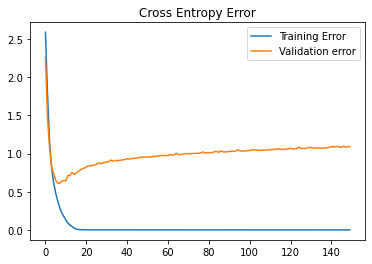

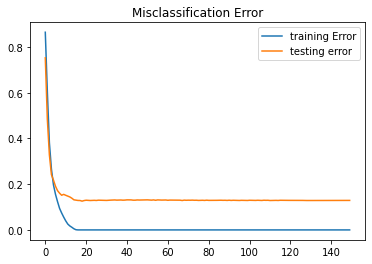

Final_valid_accuracy is 0.129
learning rate is 0.1 and momentum 0.5
Epoch 1 		 Training Loss: 2.477209384536743 		 Validation Loss: 1.9050055894122762

Model train MisAccuracy = 0.83125

Model Test MisAccuracy = 0.5856
Epoch 2 		 Training Loss: 1.203962746810913 		 Validation Loss: 0.8668991558870692

Model train MisAccuracy = 0.39664999999999995

Model Test MisAccuracy = 0.2742
Epoch 3 		 Training Loss: 0.6580343800783157 		 Validation Loss: 0.6656670378651589

Model train MisAccuracy = 0.2098

Model Test MisAccuracy = 0.19140000000000001
Epoch 4 		 Training Loss: 0.450360568356514 		 Validation Loss: 0.691684852075425

Model train MisAccuracy = 0.1442

Model Test MisAccuracy = 0.18579999999999997
Epoch 5 		 Training Loss: 0.31665718213319777 		 Validation Loss: 0.6094054869215959

Model train MisAccuracy = 0.10314999999999996

Model Test MisAccuracy = 0.1684
Epoch 6 		 Training Loss: 0.2227065049096942 		 Validation Loss: 0.6266251288971324

Model train MisAccuracy = 0.07210000000000

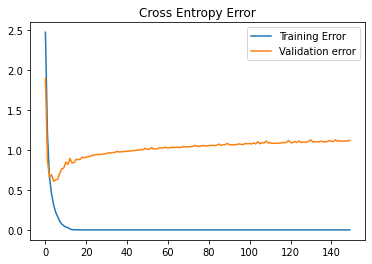

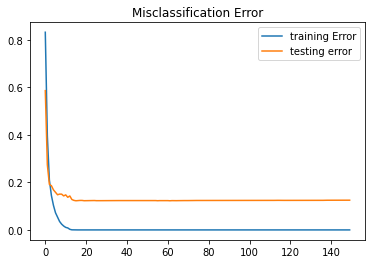

Final_valid_accuracy is 0.125
learning rate is 0.1 and momentum 0.9
Epoch 1 		 Training Loss: 2.5398687450408937 		 Validation Loss: 2.1936718939216275

Model train MisAccuracy = 0.84615

Model Test MisAccuracy = 0.7103999999999999
Epoch 2 		 Training Loss: 1.6540434327125548 		 Validation Loss: 1.485902527335343

Model train MisAccuracy = 0.53925

Model Test MisAccuracy = 0.46840000000000004
Epoch 3 		 Training Loss: 1.4645538467407226 		 Validation Loss: 1.4816569241748494

Model train MisAccuracy = 0.4615

Model Test MisAccuracy = 0.4588
Epoch 4 		 Training Loss: 1.3403140783309937 		 Validation Loss: 1.45942008761084

Model train MisAccuracy = 0.42055

Model Test MisAccuracy = 0.41859999999999997
Epoch 5 		 Training Loss: 1.4246982046127319 		 Validation Loss: 1.4539715708441037

Model train MisAccuracy = 0.43965

Model Test MisAccuracy = 0.40280000000000005
Epoch 6 		 Training Loss: 1.2302963991165161 		 Validation Loss: 1.2807625156299325

Model train MisAccuracy = 0.3832

Model 

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random
random.seed(66)  #CHANGED


for i in [0,0.5,0.9]:
# Building Our Model
  print("learning rate is 0.1 and momentum {}".format(i)) #CHANGED
  class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(3136, 100)
        self.fc2 = nn.Linear(100, 19)
        self.drop= nn.Dropout()
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        # print("Flat",x.shape)
        x=self.fc1(x)
        # print("FC1",x)
        x=self.relu(x)
        x=self.drop(x)
        x=self.fc2(x)
        return x


        
 
  model = Network()
# if torch.cuda.is_available():
    # model = model.cuda()
# Declaring Criterion and Optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = 0.1,momentum=i)
 
# Training with Validation
  epochs = 150
  min_valid_loss = np.inf
  train_loss_li=[]
  val_loss_li=[]
  misclass_train_li=[]
  misclass_test_li=[]  #changed
 
  for e in range(epochs):

    train_loss = 0.0
    # print(e,"epoch",model.Conv2D.weights)
    total4=0
    correct=0
    accuracy=0
    for data, labels in train_dataloader_image:
        # Transfer Data to GPU if available
        total=0
        # if torch.cuda.is_available():
        #    data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(train_dataloader_image))
    misclass_train_li.append(mis_accuracy)
       

   
    # Validation error
    #CROSS ENTROPY
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in val_dataloader_image:
        # Transfer Data to GPU if available
        #if torch.cuda.is_available():
            # data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(val_dataloader_image))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader_image:
            #print(labels)
            #images, labels = images.cuda(), labels.cuda()
            test_output = model(images)
            #plt.imshow(images)
            
            _,pred_y = torch.max(test_output.data, 1)
            #print("pred_y",pred_y)
            total+=labels.size(0) #shape[0]       #labels.size(0)
            correct += (pred_y ==labels).sum().item()
            #print(pred_y,labels)
    accuracy = (correct/total )      
    

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    test_misclassify=1- accuracy
    #correct_count/all_count
    misclass_test_li.append(test_misclassify)




    if (e+1) % 1 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(train_dataloader_image)} \t\t Validation Loss: {valid_loss / len(val_dataloader_image)}')
      print("\nModel train MisAccuracy =", mis_accuracy)
      print("\nModel Test MisAccuracy =", test_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_actual_part1_lr=0.1_momentum_{}.pth'.format(i))

# Cross validation Plot
  import matplotlib.pyplot as plt
  plt.plot(train_loss_li,label="Training Error")
  plt.plot(val_loss_li,label="Validation error")
  plt.title("Cross Entropy Error")  
  plt.legend()
  plt.show()

#Misaccuracy Plot
  import matplotlib.pyplot as plt
  plt.plot( misclass_train_li,label="training Error")
  plt.plot(misclass_test_li,label="testing error")
  plt.title("Misclassification Error")
  plt.legend()
  plt.show()
  print("Final_valid_accuracy is",test_misclassify)


# 0.1 and momentum 0.9

Epoch 1 		 Training Loss: 2.8090484336853025 		 Validation Loss: 2.81269575380216

Model train MisAccuracy = 0.9039

Model Test MisAccuracy = 0.9117999999999999
Epoch 2 		 Training Loss: 2.8045519718170167 		 Validation Loss: 2.809145567523446

Model train MisAccuracy = 0.90365

Model Test MisAccuracy = 0.9097999999999999
Epoch 3 		 Training Loss: 2.80332954788208 		 Validation Loss: 2.8132797168318633

Model train MisAccuracy = 0.90095

Model Test MisAccuracy = 0.893
Epoch 4 		 Training Loss: 2.804931690979004 		 Validation Loss: 2.811296432640902

Model train MisAccuracy = 0.90745

Model Test MisAccuracy = 0.893
Epoch 5 		 Training Loss: 2.8040564601898192 		 Validation Loss: 2.818971712877796

Model train MisAccuracy = 0.9048

Model Test MisAccuracy = 0.9097999999999999
Epoch 6 		 Training Loss: 2.8041437431335448 		 Validation Loss: 2.8090645188738588

Model train MisAccuracy = 0.9027499999999999

Model Test MisAccuracy = 0.9234
Epoch 7 		 Training Loss: 2.8035757732391358 		 Valid

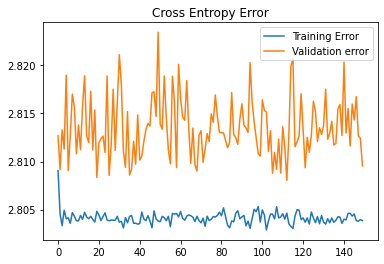

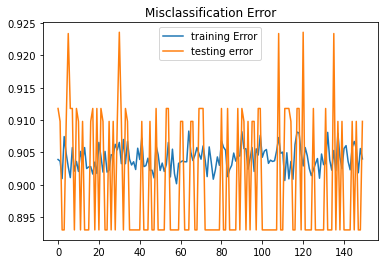

Final_valid_accuracy is 0.9097999999999999


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random
random.seed(66)

# Building Our Model
class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(3136, 100)
        self.fc2 = nn.Linear(100, 19)
        self.drop= nn.Dropout()
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        # print("Flat",x.shape)
        x=self.fc1(x)
        # print("FC1",x)
        x=self.relu(x)
        x=self.drop(x)
        x=self.fc2(x)
        return x


        
 
model = Network()
# if torch.cuda.is_available():
    # model = model.cuda()
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1,momentum=0.9)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_test_li=[]  #changed
 
for e in range(epochs):

    train_loss = 0.0
    # print(e,"epoch",model.Conv2D.weights)
    total4=0
    correct=0
    accuracy=0
    for data, labels in train_dataloader_image:
        # Transfer Data to GPU if available
        total=0
        # if torch.cuda.is_available():
        #    data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(train_dataloader_image))
    misclass_train_li.append(mis_accuracy)
       

   
    # Validation error
    #CROSS ENTROPY
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in val_dataloader_image:
        # Transfer Data to GPU if available
        #if torch.cuda.is_available():
            # data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(val_dataloader_image))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader_image:
            #print(labels)
            #images, labels = images.cuda(), labels.cuda()
            test_output = model(images)
            #plt.imshow(images)
            
            _,pred_y = torch.max(test_output.data, 1)
            #print("pred_y",pred_y)
            total+=labels.size(0) #shape[0]       #labels.size(0)
            correct += (pred_y ==labels).sum().item()
            #print(pred_y,labels)
    accuracy = (correct/total )      
    

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    test_misclassify=1- accuracy
    #correct_count/all_count
    misclass_test_li.append(test_misclassify)




    if (e+1) % 1 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(train_dataloader_image)} \t\t Validation Loss: {valid_loss / len(val_dataloader_image)}')
      print("\nModel train MisAccuracy =", mis_accuracy)
      print("\nModel Test MisAccuracy =", test_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    #torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_actual_part1_rs=66')
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_actual_part1_lr=0.1_momentum_0.9.pth')

# Cross validation Plot
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="Training Error")
plt.plot(val_loss_li,label="Validation error")
plt.title("Cross Entropy Error")
plt.legend()
plt.show()

#Misaccuracy Plot
import matplotlib.pyplot as plt
plt.plot( misclass_train_li,label="training Error")
plt.plot(misclass_test_li,label="testing error")
plt.title("Misclassification Error")
plt.legend()
plt.show()
print("Final_valid_accuracy is",test_misclassify)


# LR=0.2

learning rate is 0.2 and momentum 0
Epoch 1 		 Training Loss: 2.529404828453064 		 Validation Loss: 2.0322939901594905

Model train MisAccuracy = 0.854

Model Test MisAccuracy = 0.6337999999999999
Epoch 2 		 Training Loss: 1.3076711696624757 		 Validation Loss: 0.9336008038490441

Model train MisAccuracy = 0.42474999999999996

Model Test MisAccuracy = 0.2922
Epoch 3 		 Training Loss: 0.7245275785446167 		 Validation Loss: 0.6977658245214231

Model train MisAccuracy = 0.23165000000000002

Model Test MisAccuracy = 0.20240000000000002
Epoch 4 		 Training Loss: 0.5009492224097252 		 Validation Loss: 0.6347517381617978

Model train MisAccuracy = 0.15754999999999997

Model Test MisAccuracy = 0.17379999999999995
Epoch 5 		 Training Loss: 0.3687639235854149 		 Validation Loss: 0.6226965755129316

Model train MisAccuracy = 0.11965000000000003

Model Test MisAccuracy = 0.1764
Epoch 6 		 Training Loss: 0.2690296007692814 		 Validation Loss: 0.63003203348749

Model train MisAccuracy = 0.08765

Mod

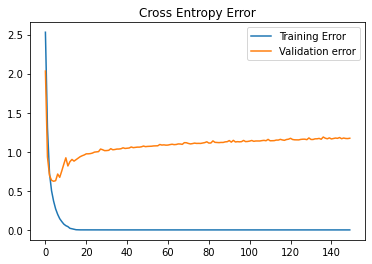

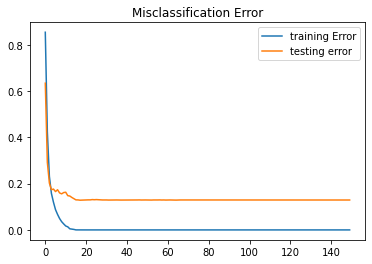

Final_valid_accuracy is 0.12919999999999998
learning rate is 0.2 and momentum 0.5
Epoch 1 		 Training Loss: 2.451228291130066 		 Validation Loss: 1.9034645845935603

Model train MisAccuracy = 0.83185

Model Test MisAccuracy = 0.602
Epoch 2 		 Training Loss: 1.126048292016983 		 Validation Loss: 0.8619727420199449

Model train MisAccuracy = 0.37015

Model Test MisAccuracy = 0.2724
Epoch 3 		 Training Loss: 0.6597212411284447 		 Validation Loss: 0.7809632769815481

Model train MisAccuracy = 0.21240000000000003

Model Test MisAccuracy = 0.23140000000000005
Epoch 4 		 Training Loss: 0.4891758248448372 		 Validation Loss: 0.7015133790529458

Model train MisAccuracy = 0.15705000000000002

Model Test MisAccuracy = 0.1886
Epoch 5 		 Training Loss: 0.3733879347383976 		 Validation Loss: 0.7056654523702184

Model train MisAccuracy = 0.11965000000000003

Model Test MisAccuracy = 0.18899999999999995
Epoch 6 		 Training Loss: 0.3005378669798374 		 Validation Loss: 0.7682616093973066

Model train Mi

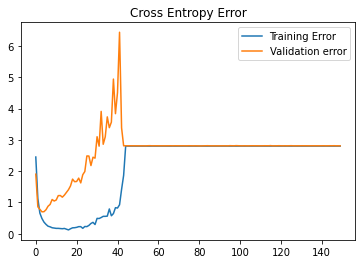

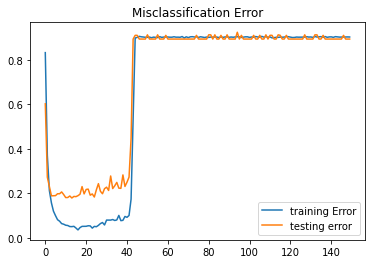

Final_valid_accuracy is 0.8928
learning rate is 0.2 and momentum 0.9
Epoch 1 		 Training Loss: 2.815137887954712 		 Validation Loss: 2.8177313971671327

Model train MisAccuracy = 0.90555

Model Test MisAccuracy = 0.893
Epoch 2 		 Training Loss: 2.810827137374878 		 Validation Loss: 2.841997644703859

Model train MisAccuracy = 0.9064

Model Test MisAccuracy = 0.9117999999999999
Epoch 3 		 Training Loss: 2.8108913509368896 		 Validation Loss: 2.823243321886488

Model train MisAccuracy = 0.9059

Model Test MisAccuracy = 0.9117999999999999
Epoch 4 		 Training Loss: 2.812337540054321 		 Validation Loss: 2.812644071639723

Model train MisAccuracy = 0.9062

Model Test MisAccuracy = 0.893
Epoch 5 		 Training Loss: 2.810742615890503 		 Validation Loss: 2.809963540666422

Model train MisAccuracy = 0.9082

Model Test MisAccuracy = 0.893
Epoch 6 		 Training Loss: 2.8094427452087403 		 Validation Loss: 2.8144739342343277

Model train MisAccuracy = 0.9028

Model Test MisAccuracy = 0.9097999999999999

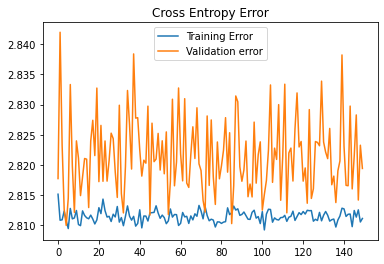

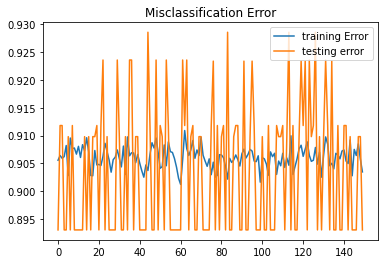

Final_valid_accuracy is 0.893


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random
random.seed(66)  #CHANGED


for i in [0,0.5,0.9]:
# Building Our Model
  print("learning rate is 0.2 and momentum {}".format(i)) #CHANGED
  class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(3136, 100)
        self.fc2 = nn.Linear(100, 19)
        self.drop= nn.Dropout()
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        # print("Flat",x.shape)
        x=self.fc1(x)
        # print("FC1",x)
        x=self.relu(x)
        x=self.drop(x)
        x=self.fc2(x)
        return x


        
 
  model = Network()
# if torch.cuda.is_available():
    # model = model.cuda()
# Declaring Criterion and Optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = 0.2,momentum=i)
 
# Training with Validation
  epochs = 150
  min_valid_loss = np.inf
  train_loss_li=[]
  val_loss_li=[]
  misclass_train_li=[]
  misclass_test_li=[]  #changed
 
  for e in range(epochs):

    train_loss = 0.0
    # print(e,"epoch",model.Conv2D.weights)
    total4=0
    correct=0
    accuracy=0
    for data, labels in train_dataloader_image:
        # Transfer Data to GPU if available
        total=0
        # if torch.cuda.is_available():
        #    data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(train_dataloader_image))
    misclass_train_li.append(mis_accuracy)
       

   
    # Validation error
    #CROSS ENTROPY
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in val_dataloader_image:
        # Transfer Data to GPU if available
        #if torch.cuda.is_available():
            # data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(val_dataloader_image))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader_image:
            #print(labels)
            #images, labels = images.cuda(), labels.cuda()
            test_output = model(images)
            #plt.imshow(images)
            
            _,pred_y = torch.max(test_output.data, 1)
            #print("pred_y",pred_y)
            total+=labels.size(0) #shape[0]       #labels.size(0)
            correct += (pred_y ==labels).sum().item()
            #print(pred_y,labels)
    accuracy = (correct/total )      
    

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    test_misclassify=1- accuracy
    #correct_count/all_count
    misclass_test_li.append(test_misclassify)




    if (e+1) % 1 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(train_dataloader_image)} \t\t Validation Loss: {valid_loss / len(val_dataloader_image)}')
      print("\nModel train MisAccuracy =", mis_accuracy)
      print("\nModel Test MisAccuracy =", test_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_actual_part1_lr=0.2_momentum_{}.pth'.format(i))

# Cross validation Plot
  import matplotlib.pyplot as plt
  plt.plot(train_loss_li,label="Training Error")
  plt.plot(val_loss_li,label="Validation error")
  plt.title("Cross Entropy Error")  
  plt.legend()
  plt.show()

#Misaccuracy Plot
  import matplotlib.pyplot as plt
  plt.plot( misclass_train_li,label="training Error")
  plt.plot(misclass_test_li,label="testing error")
  plt.title("Misclassification Error")
  plt.legend()
  plt.show()
  print("Final_valid_accuracy is",test_misclassify)


# LR 0.5

learning rate is 0.5 and momentum 0
Epoch 1 		 Training Loss: 2.427952142524719 		 Validation Loss: 1.7649656192512269

Model train MisAccuracy = 0.8187

Model Test MisAccuracy = 0.5576
Epoch 2 		 Training Loss: 1.1480425754547119 		 Validation Loss: 0.9911239745130964

Model train MisAccuracy = 0.3791

Model Test MisAccuracy = 0.31000000000000005
Epoch 3 		 Training Loss: 0.7007435029506683 		 Validation Loss: 0.8512038387310733

Model train MisAccuracy = 0.22050000000000003

Model Test MisAccuracy = 0.24119999999999997
Epoch 4 		 Training Loss: 0.5163819740653038 		 Validation Loss: 0.8565575503239966

Model train MisAccuracy = 0.16535

Model Test MisAccuracy = 0.23760000000000003
Epoch 5 		 Training Loss: 0.4060940387368202 		 Validation Loss: 0.7975033455213923

Model train MisAccuracy = 0.13034999999999997

Model Test MisAccuracy = 0.1936
Epoch 6 		 Training Loss: 0.3093393366098404 		 Validation Loss: 0.9141285416616756

Model train MisAccuracy = 0.09950000000000003

Model Test M

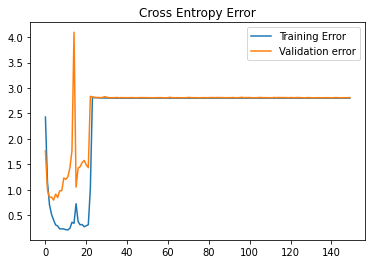

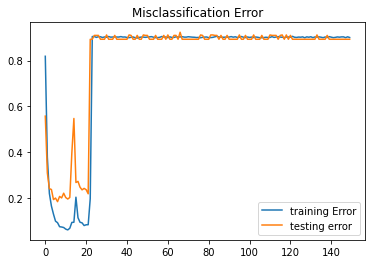

Final_valid_accuracy is 0.893
learning rate is 0.5 and momentum 0.5
Epoch 1 		 Training Loss: 2.588096135520935 		 Validation Loss: 2.1513454367400735

Model train MisAccuracy = 0.8694999999999999

Model Test MisAccuracy = 0.7236
Epoch 2 		 Training Loss: 1.8931405513763429 		 Validation Loss: 2.8807716810019914

Model train MisAccuracy = 0.63125

Model Test MisAccuracy = 0.9276
Epoch 3 		 Training Loss: 2.8153252307891847 		 Validation Loss: 2.813169878759202

Model train MisAccuracy = 0.9027000000000001

Model Test MisAccuracy = 0.9097999999999999
Epoch 4 		 Training Loss: 2.8043666515350343 		 Validation Loss: 2.814259359031726

Model train MisAccuracy = 0.90205

Model Test MisAccuracy = 0.9097999999999999
Epoch 5 		 Training Loss: 2.8044416778564454 		 Validation Loss: 2.8143941262725054

Model train MisAccuracy = 0.9049

Model Test MisAccuracy = 0.9234
Epoch 6 		 Training Loss: 2.803751681137085 		 Validation Loss: 2.8126998995519745

Model train MisAccuracy = 0.9066

Model Test M

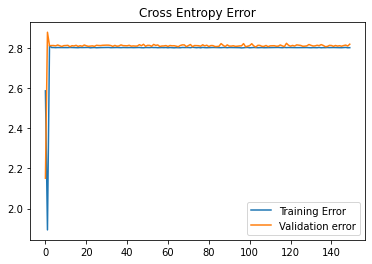

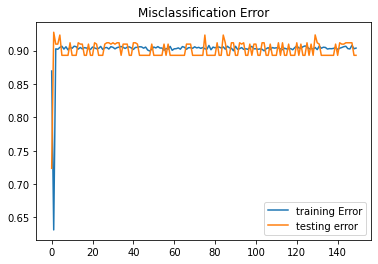

Final_valid_accuracy is 0.893
learning rate is 0.5 and momentum 0.9
Epoch 1 		 Training Loss: 2.837947636413574 		 Validation Loss: 2.856525861533584

Model train MisAccuracy = 0.9102

Model Test MisAccuracy = 0.9097999999999999
Epoch 2 		 Training Loss: 2.8351956771850584 		 Validation Loss: 2.8473061421874224

Model train MisAccuracy = 0.9102

Model Test MisAccuracy = 0.9276
Epoch 3 		 Training Loss: 2.8349972373962404 		 Validation Loss: 2.8246099295889495

Model train MisAccuracy = 0.91085

Model Test MisAccuracy = 0.893
Epoch 4 		 Training Loss: 2.830556504058838 		 Validation Loss: 2.8281013707446445

Model train MisAccuracy = 0.9087

Model Test MisAccuracy = 0.9236
Epoch 5 		 Training Loss: 2.8331296138763427 		 Validation Loss: 2.8342708296077266

Model train MisAccuracy = 0.9097500000000001

Model Test MisAccuracy = 0.9468
Epoch 6 		 Training Loss: 2.834002404022217 		 Validation Loss: 2.8631805963576977

Model train MisAccuracy = 0.907

Model Test MisAccuracy = 0.9236
Epoch 7

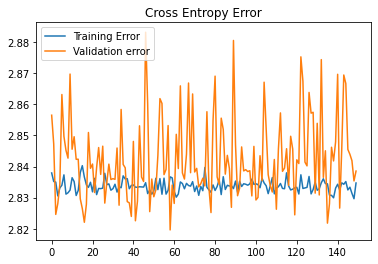

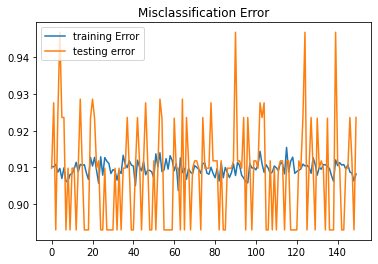

Final_valid_accuracy is 0.9236


In [13]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random
random.seed(66)  #CHANGED


for i in [0,0.5,0.9]:
# Building Our Model
  print("learning rate is 0.5 and momentum {}".format(i)) #CHANGED
  class Network(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1)
        self.maxpool=nn.MaxPool2d(2, 2) # brackets taken out
        self.flat=nn.Flatten()
        self.fc1 = nn.Linear(3136, 100)
        self.fc2 = nn.Linear(100, 19)
        self.drop= nn.Dropout()
        self.relu=nn.ReLU()
        
    # Forward Pass
    def forward(self, x):

        x= self.relu(self.conv1(x))
        x=self.maxpool(x)
        x=self.flat(x)
        # print("Flat",x.shape)
        x=self.fc1(x)
        # print("FC1",x)
        x=self.relu(x)
        x=self.drop(x)

        x=self.fc2(x)
        return x


        
 
  model = Network()
# if torch.cuda.is_available():
    # model = model.cuda()
# Declaring Criterion and Optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = 0.5,momentum=i)
 
# Training with Validation
  epochs = 150
  min_valid_loss = np.inf
  train_loss_li=[]
  val_loss_li=[]
  misclass_train_li=[]
  misclass_test_li=[]  #changed
 
  for e in range(epochs):

    train_loss = 0.0
    # print(e,"epoch",model.Conv2D.weights)
    total4=0
    correct=0
    accuracy=0
    for data, labels in train_dataloader_image:
        # Transfer Data to GPU if available
        total=0
        # if torch.cuda.is_available():
        #    data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(train_dataloader_image))
    misclass_train_li.append(mis_accuracy)
       

   
    # Validation error
    #CROSS ENTROPY
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in val_dataloader_image:
        # Transfer Data to GPU if available
        #if torch.cuda.is_available():
            # data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(val_dataloader_image))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader_image:
            #print(labels)
            #images, labels = images.cuda(), labels.cuda()
            test_output = model(images)
            #plt.imshow(images)
            
            _,pred_y = torch.max(test_output.data, 1)
            #print("pred_y",pred_y)
            total+=labels.size(0) #shape[0]       #labels.size(0)
            correct += (pred_y ==labels).sum().item()
            #print(pred_y,labels)
    accuracy = (correct/total )      
    

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    test_misclassify=1- accuracy
    #correct_count/all_count
    misclass_test_li.append(test_misclassify)




    if (e+1) % 1 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(train_dataloader_image)} \t\t Validation Loss: {valid_loss / len(val_dataloader_image)}')
      print("\nModel train MisAccuracy =", mis_accuracy)
      print("\nModel Test MisAccuracy =", test_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model_actual_part1_lr=0.5_momentum_{}.pth'.format(i))

# Cross validation Plot
  import matplotlib.pyplot as plt
  plt.plot(train_loss_li,label="Training Error")
  plt.plot(val_loss_li,label="Validation error")
  plt.title("Cross Entropy Error")  
  plt.legend()
  plt.show()

#Misaccuracy Plot
  import matplotlib.pyplot as plt
  plt.plot( misclass_train_li,label="training Error")
  plt.plot(misclass_test_li,label="testing error")
  plt.title("Misclassification Error")
  plt.legend()
  plt.show()
  print("Final_valid_accuracy is",test_misclassify)


BEST MODEL ACCORDING TO VALIDATION ERROR IS LR=0.1 and Momentum 0.5. This is as it gave the lowest validation and misclassification test error. Misclassification error in this case is 0.125 and validation loss is 1.1232103755472191. Hence there is 87.5% accuracy in this model

In [ ]:
#type(datasets.MNIST('', train = True, transform=transform,download = True))

NameError: ignored

In [ ]:
model3 = torch.load('/content/drive/MyDrive/saved_model_lr_full=0.1_seed_88.pth')


In [ ]:
model3.fc1.weight

AttributeError: ignored

In [ ]:
for j in [0,0.5,0.9]:
  print(j)

0
0.5
0.9
